In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
articles = pd.read_csv("../zalando_files/articles.csv", encoding='utf-16')

In [3]:
orders = pd.read_csv("../zalando_files/orders.csv", encoding='utf-16')

In [4]:
customers = pd.read_csv("../zalando_files/customers.csv", encoding='utf-16')

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_39073/2876716713.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv("../zalando_files/customers.csv", encoding='utf-16')


In [5]:
returns = pd.read_csv("../zalando_files/returns.csv", encoding='utf-16')

In [6]:
articles.head()

simple_sku      config_sku article_size product_category  \
0  BNE211S048-A110012000  BNE211S048-A11           40         Sneakers   
1  XAN621CAJM-Q110036000  XAN621CAJM-Q11           36          Dresses   
2  APU111S06U-Q110007000  APU111S06U-Q11         40.5         Sneakers   
3  APU111S06U-Q110065000  APU111S06U-Q11           40         Sneakers   
4  APU115B04J-C110045000  APU115B04J-C11         37.5         Sneakers   

    brand_name  
0         Puma  
1        MANGO  
2  NEW Balance  
3  NEW Balance  
4  NEW Balance

In [7]:
orders.head()

order_number  order_item_position      config_sku size_sku  customer_id  \
0     330812595            930364825  BNE211S048-A11  0012000     36751175   
1     330817221            930336225  XAN621CAJM-Q11  0036000    211454424   
2     330818553            930351730  APU111S06U-Q11  0007000    317213832   
3     330818553            930351731  APU111S06U-Q11  0065000    317213832   
4     330818585            930353320  APU115B04J-C11  0045000    418394519   

   order_date  gmv_before_return  discount_before_return  
0  2022-01-01              79.95                   20.00  
1  2022-01-01              28.00                   11.95  
2  2022-01-01              59.95                   40.00  
3  2022-01-01              59.95                   40.00  
4  2022-01-01              65.99                   44.00

In [8]:
customers.head()

customer_id customer_gender  country customer_quality
0     36751175           Women   France                2
1    211454424           Women  Germany                1
2    317213832           Women   France                3
3    418394519           Women   Sweden                2
4    269428195           Women   Sweden                4

In [9]:
returns.head()

order_number  order_item_position             simple_sku  return_date_sku  \
0     330818553            930351731  APU111S06U-Q110065000       20220115.0   
1     330818553            930351730  APU111S06U-Q110007000       20220115.0   
2     330820206            930386843  XAN621CAIB-Q110044000       20220110.0   
3     330820400            930366860  BNE211S05A-C110013000       20220117.0   
4     330820561            930366974  APU111S06F-D110075000       20220115.0   

  return_reason  
0        Unkown  
1        Unkown  
2        Unkown  
3         Other  
4        Unkown

In [10]:
articles.head()

simple_sku      config_sku article_size product_category  \
0  BNE211S048-A110012000  BNE211S048-A11           40         Sneakers   
1  XAN621CAJM-Q110036000  XAN621CAJM-Q11           36          Dresses   
2  APU111S06U-Q110007000  APU111S06U-Q11         40.5         Sneakers   
3  APU111S06U-Q110065000  APU111S06U-Q11           40         Sneakers   
4  APU115B04J-C110045000  APU115B04J-C11         37.5         Sneakers   

    brand_name  
0         Puma  
1        MANGO  
2  NEW Balance  
3  NEW Balance  
4  NEW Balance

In [11]:
customers.isna().sum()

customer_id         0
customer_gender     0
country             0
customer_quality    0
dtype: int64

In [12]:
orders.isna().sum()

order_number              0
order_item_position       0
config_sku                0
size_sku                  0
customer_id               0
order_date                0
gmv_before_return         0
discount_before_return    0
dtype: int64

In [13]:
returns.isna().sum()

order_number           0
order_item_position    0
simple_sku             0
return_date_sku        0
return_reason          0
dtype: int64

In [14]:
conn = sqlite3.connect('zalando.db')

In [15]:
articles.to_sql('articles', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
customers.to_sql('customers', conn, index=False, if_exists='replace')
returns.to_sql('returns', conn, index=False, if_exists='replace')

3462923

In [16]:
query = """
SELECT 
    o.*,

    r.simple_sku,
    r.return_date_sku,
    r.return_reason,

    c.customer_gender,
    c.country,
    c.customer_quality,

    a.article_size,
    a.product_category,
    a.brand_name

FROM orders o
JOIN customers c 
    ON c.customer_id = o.customer_id
LEFT JOIN returns r 
    ON o.order_number = r.order_number
    AND o.order_item_position = r.order_item_position
LEFT JOIN articles a 
    ON r.simple_sku = a.simple_sku
"""

df = pd.read_sql_query(query, conn)
print(df.head())

   order_number  order_item_position      config_sku size_sku  customer_id  \
0     330812595            930364825  BNE211S048-A11  0012000     36751175   
1     330817221            930336225  XAN621CAJM-Q11  0036000    211454424   
2     330818553            930351730  APU111S06U-Q11  0007000    317213832   
3     330818553            930351731  APU111S06U-Q11  0065000    317213832   
4     330818585            930353320  APU115B04J-C11  0045000    418394519   

   order_date  gmv_before_return  discount_before_return  \
0  2022-01-01              79.95                   20.00   
1  2022-01-01              28.00                   11.95   
2  2022-01-01              59.95                   40.00   
3  2022-01-01              59.95                   40.00   
4  2022-01-01              65.99                   44.00   

              simple_sku  return_date_sku return_reason customer_gender  \
0                   None              NaN          None           Women   
1                   

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df['return_reason'] = df['return_reason'].replace({'Unkown': 'Unknown'})

In [19]:
df['brand_name'] = df['brand_name'].replace({'Jack and Jones': 'Jack & Jones'})

In [20]:
df['is_returned'] = df['return_reason'].notnull().astype(int)

In [21]:
df['article_size'] = pd.to_numeric(df['article_size'], errors='coerce')

In [22]:
print(df['gmv_before_return'].max())

280.0


In [23]:
df['customer_quality'] = pd.to_numeric(df['customer_quality'], errors='coerce')

In [24]:
def sneaker_size(row):
    if row['product_category'] != 'Sneakers':
        return None

    size = row['article_size']

    if pd.isna(size):
        return None
    elif size <= 38:
        return 'Small (<=38)'
    elif 39 <= size <= 41:
        return 'Medium (39–41)'
    elif size >= 42:
        return 'Large (>=42)'
    

In [25]:
def dress_size(row):
    
    if row['product_category'] != 'Dresses':
        return None

    size = row['article_size']

    if pd.isna(size):
        return None
    if size <= 34:
        return 'XS'
    elif 35 <= size <= 36:
        return 'S'
    elif 37 <= size <= 38:
        return 'M'
    elif 39 <= size <= 42:
        return 'L'
    elif size > 42:
        return 'XL'
    else:
        return None
    

In [26]:
def jean_size(row):

    if row['product_category'] != 'Jeans':
        return None

    size = row['article_size']

    if pd.isna(size):
        return None
    
    if size <= 27:
        return 'XS'
    elif 28 <= size <= 30:
        return 'S'
    elif 31 <= size <= 33:
        return 'M'
    elif 34 <= size <= 36:
        return 'L'
    elif size > 36:
        return 'XL'
    else:
        return None
    

In [27]:
def tier_list(row):

    price = row['gmv_before_return']

    if pd.isna(price):
        return None
    elif price <= 25:
        return 'Tier 1: 0–25'
    elif 25 < price <= 50:
        return 'Tier 2: 25–50'
    elif 50 < price <= 100:
        return 'Tier 3: 50–100'
    elif 100 < price <= 150:
        return 'Tier 4: 100–150'
    elif price > 150:
        return 'Tier 5: 150+'
    else:
        return None

In [28]:
def discount_tier(discount):
    if pd.isna(discount):
        return None
    elif discount == 0:
        return 'No Discount'
    elif 1 <= discount <= 25:
        return 'Low Discount'
    elif 26 <= discount <= 75:
        return 'Medium Discount'
    elif 76 <= discount <= 150:
        return 'High Discount'
    else:
        return 'Very High Discount'

df['discount_tier'] = df['discount_before_return'].apply(discount_tier)

In [29]:
df['sneaker_sizes'] = df.apply(sneaker_size, axis=1)

In [30]:
df['dress_sizes'] = df.apply(dress_size, axis=1)

In [31]:
df['jean_sizes'] = df.apply(jean_size, axis=1)

In [32]:
df['tier_category'] = df.apply(tier_list, axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010136 entries, 0 to 6010135
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_number            int64  
 1   order_item_position     int64  
 2   config_sku              object 
 3   size_sku                object 
 4   customer_id             int64  
 5   order_date              object 
 6   gmv_before_return       float64
 7   discount_before_return  float64
 8   simple_sku              object 
 9   return_date_sku         float64
 10  return_reason           object 
 11  customer_gender         object 
 12  country                 object 
 13  customer_quality        float64
 14  article_size            float64
 15  product_category        object 
 16  brand_name              object 
 17  is_returned             int64  
 18  discount_tier           object 
 19  sneaker_sizes           object 
 20  dress_sizes             object 
 21  jean_sizes              object 

In [34]:
df['discount_before_return'].max()

np.float64(172.0)

In [35]:
df['is_returned'].value_counts()

is_returned
1    3462923
0    2547213
Name: count, dtype: int64

In [36]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [37]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

In [38]:
df.head(50)

order_number  order_item_position      config_sku size_sku  customer_id  \
0      330812595            930364825  BNE211S048-A11  0012000     36751175   
1      330817221            930336225  XAN621CAJM-Q11  0036000    211454424   
2      330818553            930351730  APU111S06U-Q11  0007000    317213832   
3      330818553            930351731  APU111S06U-Q11  0065000    317213832   
4      330818585            930353320  APU115B04J-C11  0045000    418394519   
5      330818587            930364855  XAN621CALS-G11  0042000    269428195   
6      330820148            930385967  APU111S07A-Q11  0075000     35628035   
7      330820206            930386843  XAN621CAIB-Q11  0044000     43591638   
8      330820221            930406924  APU111S06R-Q11  0004000    555344742   
9      330820244            930402837  BNE215A032-502  0014000    539243430   
10     330820390            930397962  BNE215A032-502  0015000    102232137   
11     330820400            930367083  BNE211S05J-N11  0013000     15351539   
12     330820400            930366860  BNE211S05A-C11  0013000     15351539   
13     330820412            930374376  BNE211S04D-K11  0009000    104646394   
14     330820443            930409291  APU111S07G-A11  0045000    523995394   
15     330820561            930366974  APU111S06F-D11  0075000     34114679   
16     330820725            930379423  BNE215A032-502  0011000     15381421   
17     330820887            930374801  APU111S06T-J11  0004000     16393850   
18     330820934            930368916  BNE215A032-502  0010000     33959635   
19     330820934            930369118  BNE215B051-K11  0010000     33959635   
20     330820934            930368791  BNE212A008-102  0085000     33959635   
21     330820934            930368793  BNE215B051-C12  0010000     33959635   
22     330821018            930394167  APU111S06T-J11  0035000     15822390   
23     330821642            930410972  BNE211S04E-C11  0010000     45327174   
24     330821642            930410974  BNE211S04E-C11  0011000     45327174   
25     330821822            930384914  XAN621CADT-Q11  0036000     16131036   
26     330821945            930383402  BNE215B05O-K11  0010000    603227602   
27     330822172            930398502  EC1822G03B-K11  0036034     36107805   
28     330822224            930369786  EC1821C01W-C11  000S000    104655785   
29     330822224            930369145  EC1821C01N-Q11  000S000    104655785   
30     330822334            930409226  XAN651GA3K-B11  0ONE000     45308971   
31     330822334            930409232  XAN651GA3K-J11  0ONE000     45308971   
32     330822340            930372801  BNE215A032-502  0005000    549668442   
33     330822340            930372674  BNE215A032-502  0004000    549668442   
34     330822555            930388784  2M9121C1ZO-K11  000L000     36618772   
35     330822555            930388785  2M9121C24Y-Q11  000L000     36618772   
36     330822572            930387568  APU111S07A-Q11  0075000     62189362   
37     330822611            930402102  XAN621CAKW-P11  0038000     59461911   
38     330822611            930402103  XAN621CAKW-P11  0040000     59461911   
39     330822611            930402100  XAN621CA7V-Q11  0038000     59461911   
40     330822611            930402099  XAN621CAKW-Q11  0040000     59461911   
41     330822611            930402101  XAN621CAKW-Q11  0038000     59461911   
42     330822611            930402098  XAN621CA7V-G12  0038000     59461911   
43     330822611            930402104  XAN621CA7V-G12  0040000     59461911   
44     330822899            930415457  APU111S06B-J11  0006000    594562481   
45     330822899            930415336  BNE211S04K-A11  0011000    594562481   
46     330822941            930389518  BNE215B051-C12  0750000     42607171   
47     330823086            930390318  XAN611SA19-Q11  0041000    105076307   
48     330823440            930393996  BNE215A032-802  0011000     60199737   
49     330823440            930393997  BNE215B051-C12 

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'NEW Balance'),
  Text(1, 0, 'MANGO'),
  Text(2, 0, 'Puma'),
  Text(3, 0, 'GUESS'),
  Text(4, 0, 'anna field'),
  Text(5, 0, 'Calvin Klein'),
  Text(6, 0, 'Jack & Jones')])

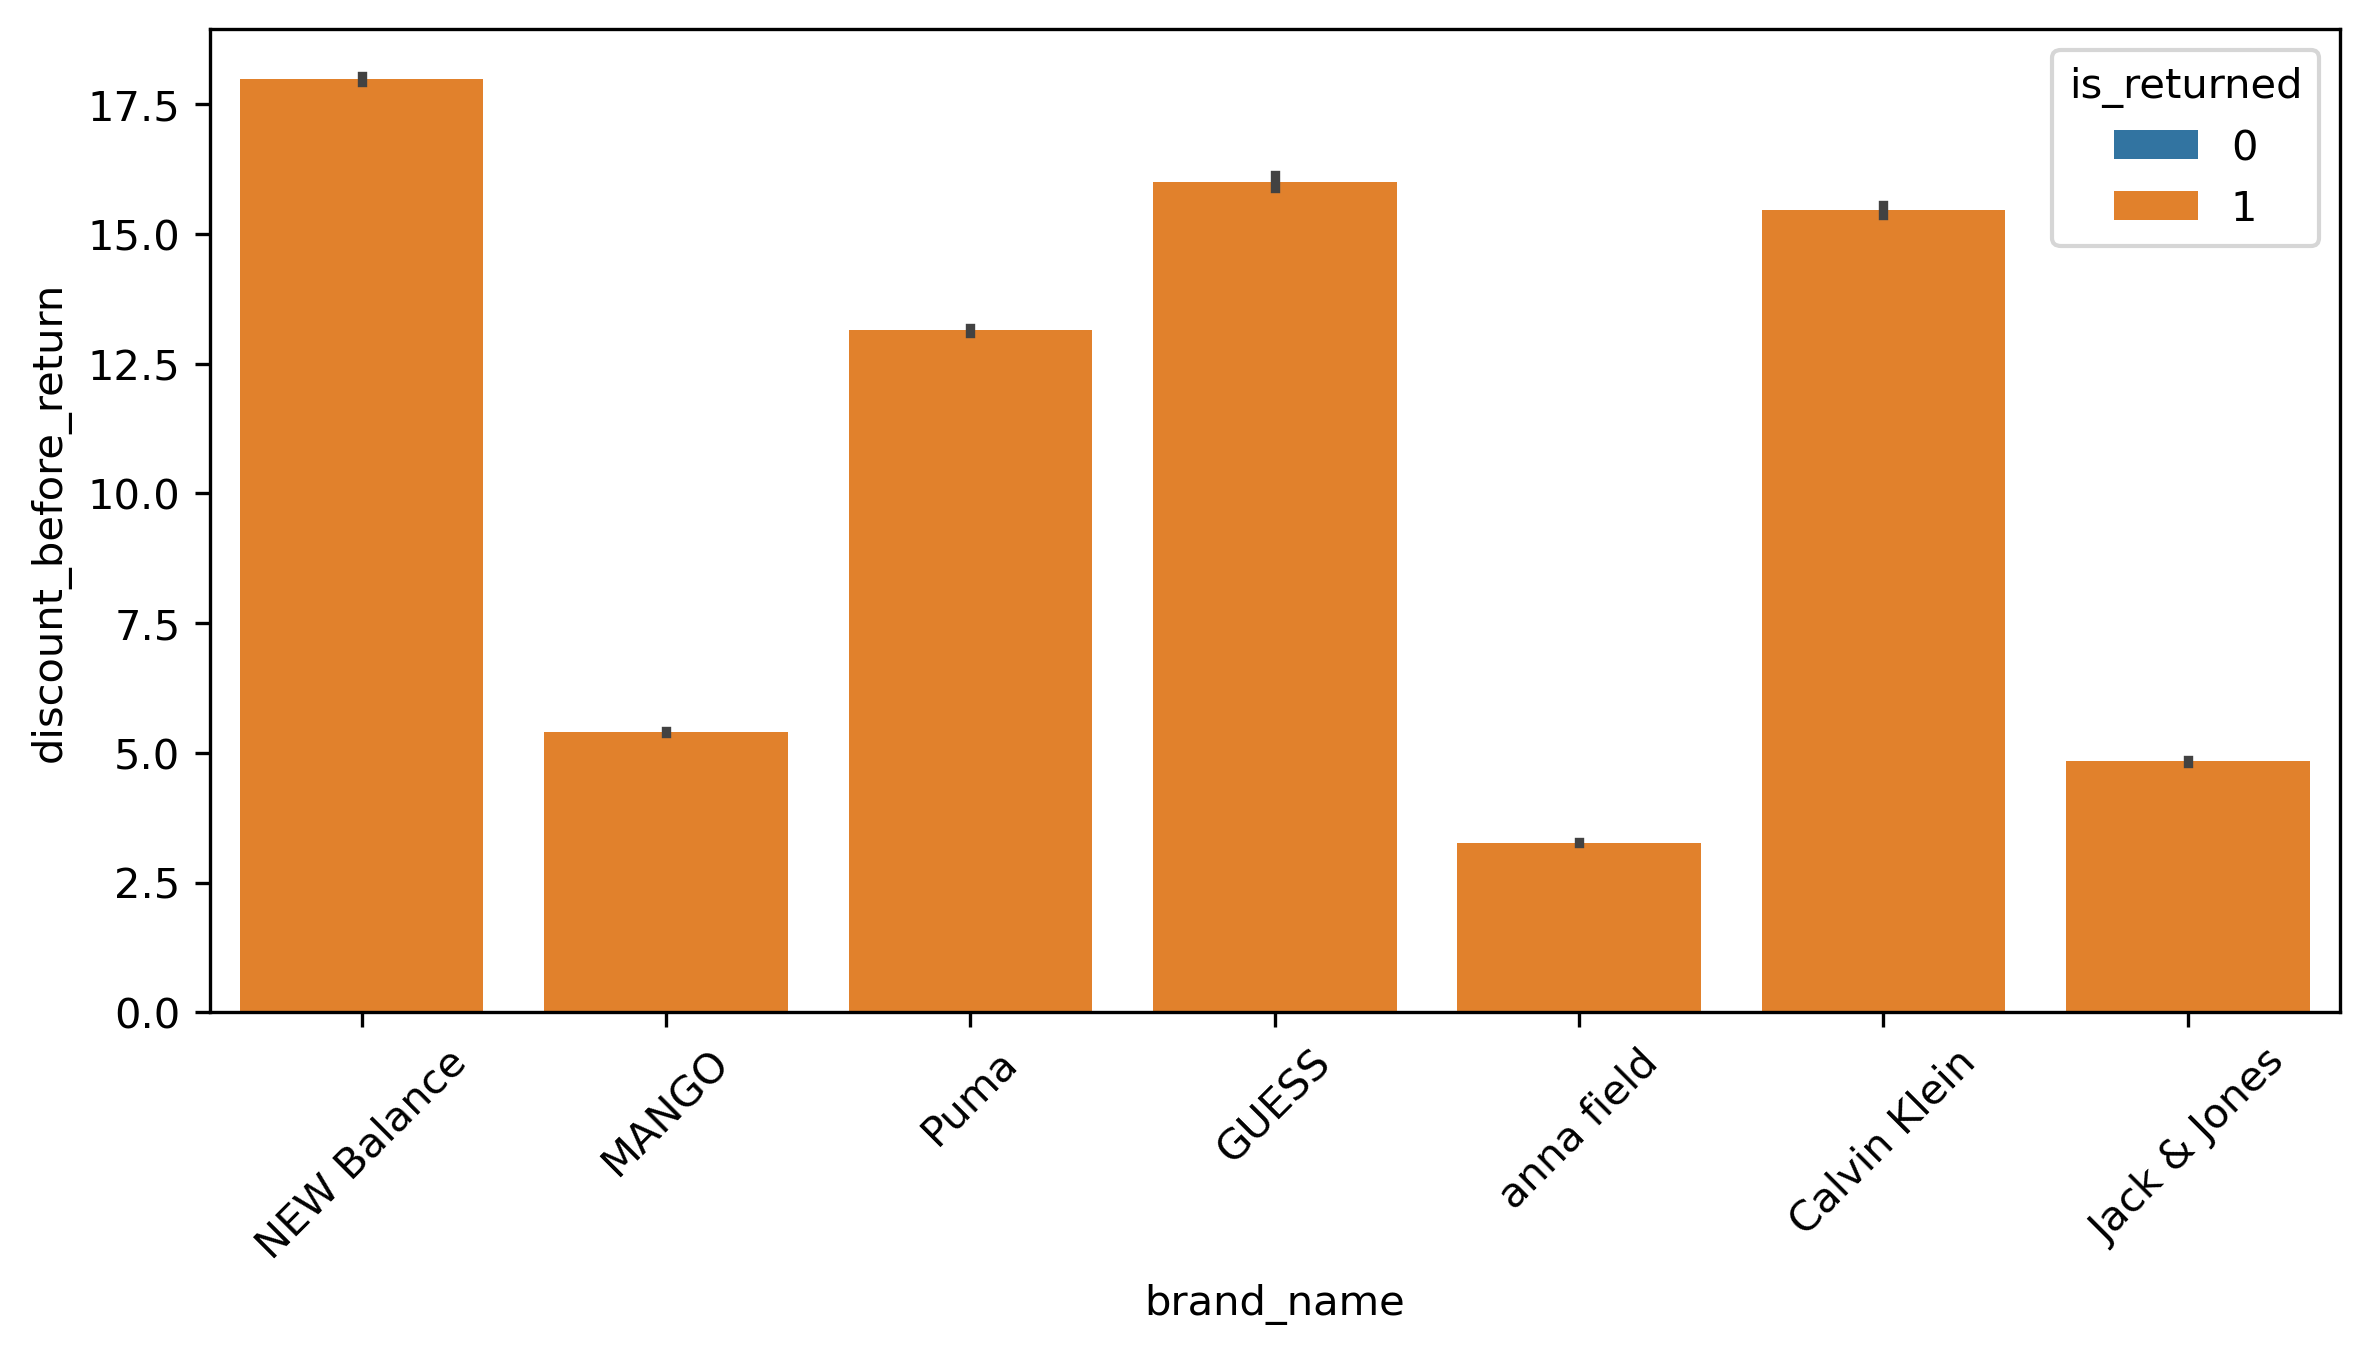

In [40]:
plt.figure(figsize=(8,4),dpi=300)
sns.barplot(data=df, x='brand_name', y='discount_before_return', hue='is_returned')
plt.tight_layout()
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Sizing'),
  Text(3, 0, 'Dislike')])

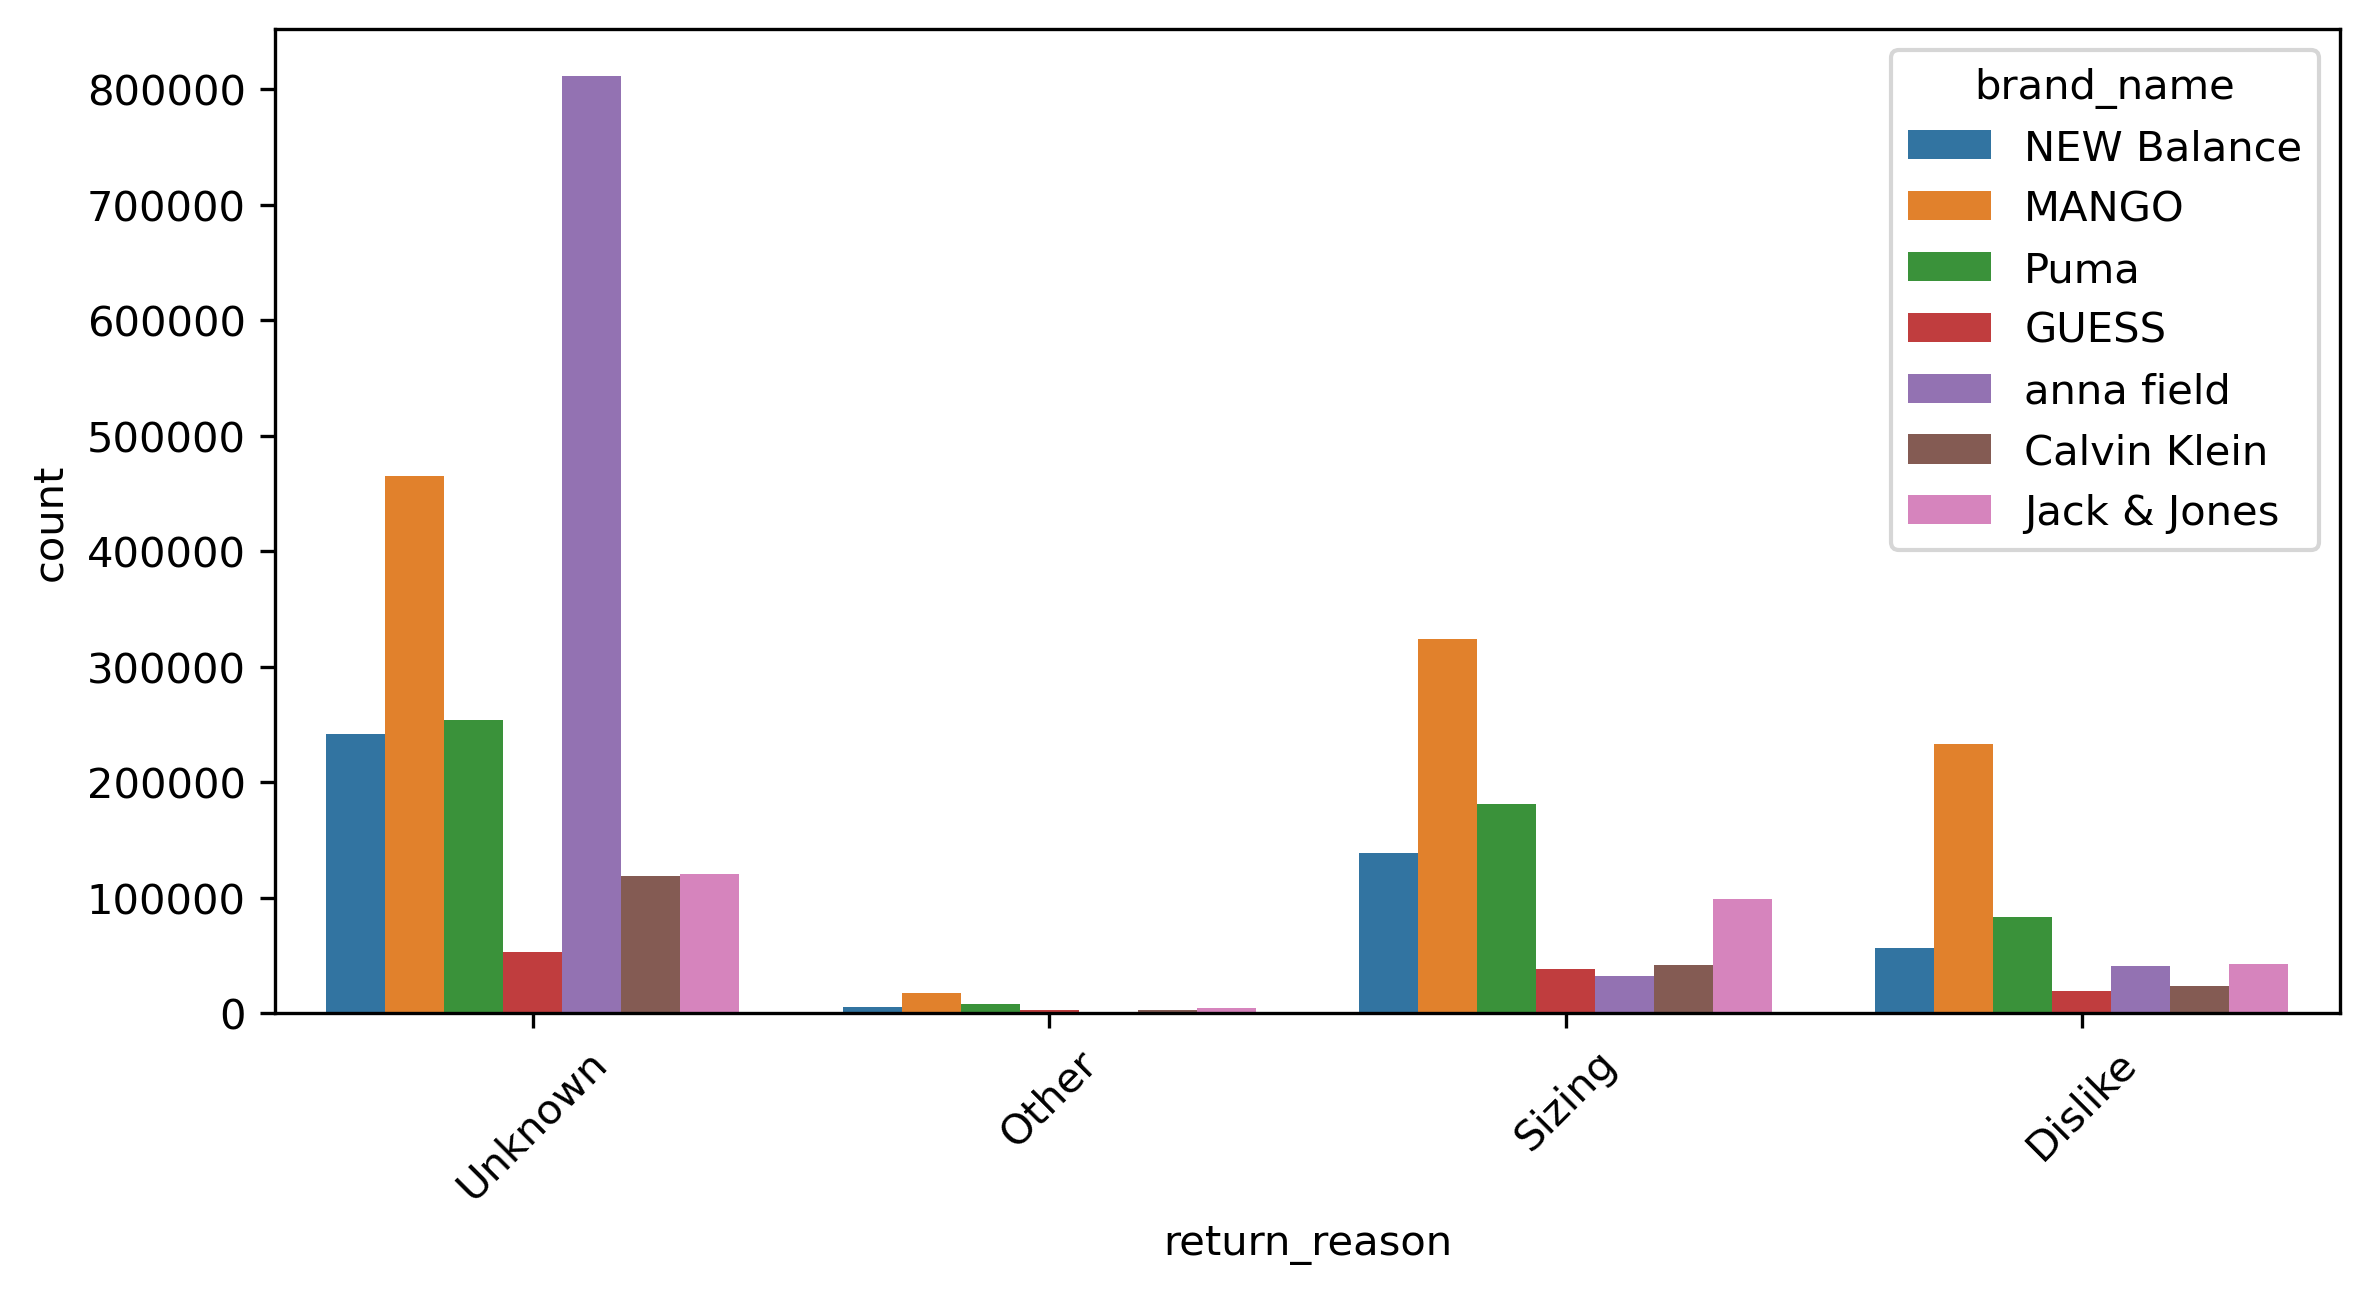

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='return_reason', hue='brand_name')
plt.tight_layout()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'NEW Balance'),
  Text(1, 0, 'MANGO'),
  Text(2, 0, 'Puma'),
  Text(3, 0, 'GUESS'),
  Text(4, 0, 'anna field'),
  Text(5, 0, 'Calvin Klein'),
  Text(6, 0, 'Jack & Jones')])

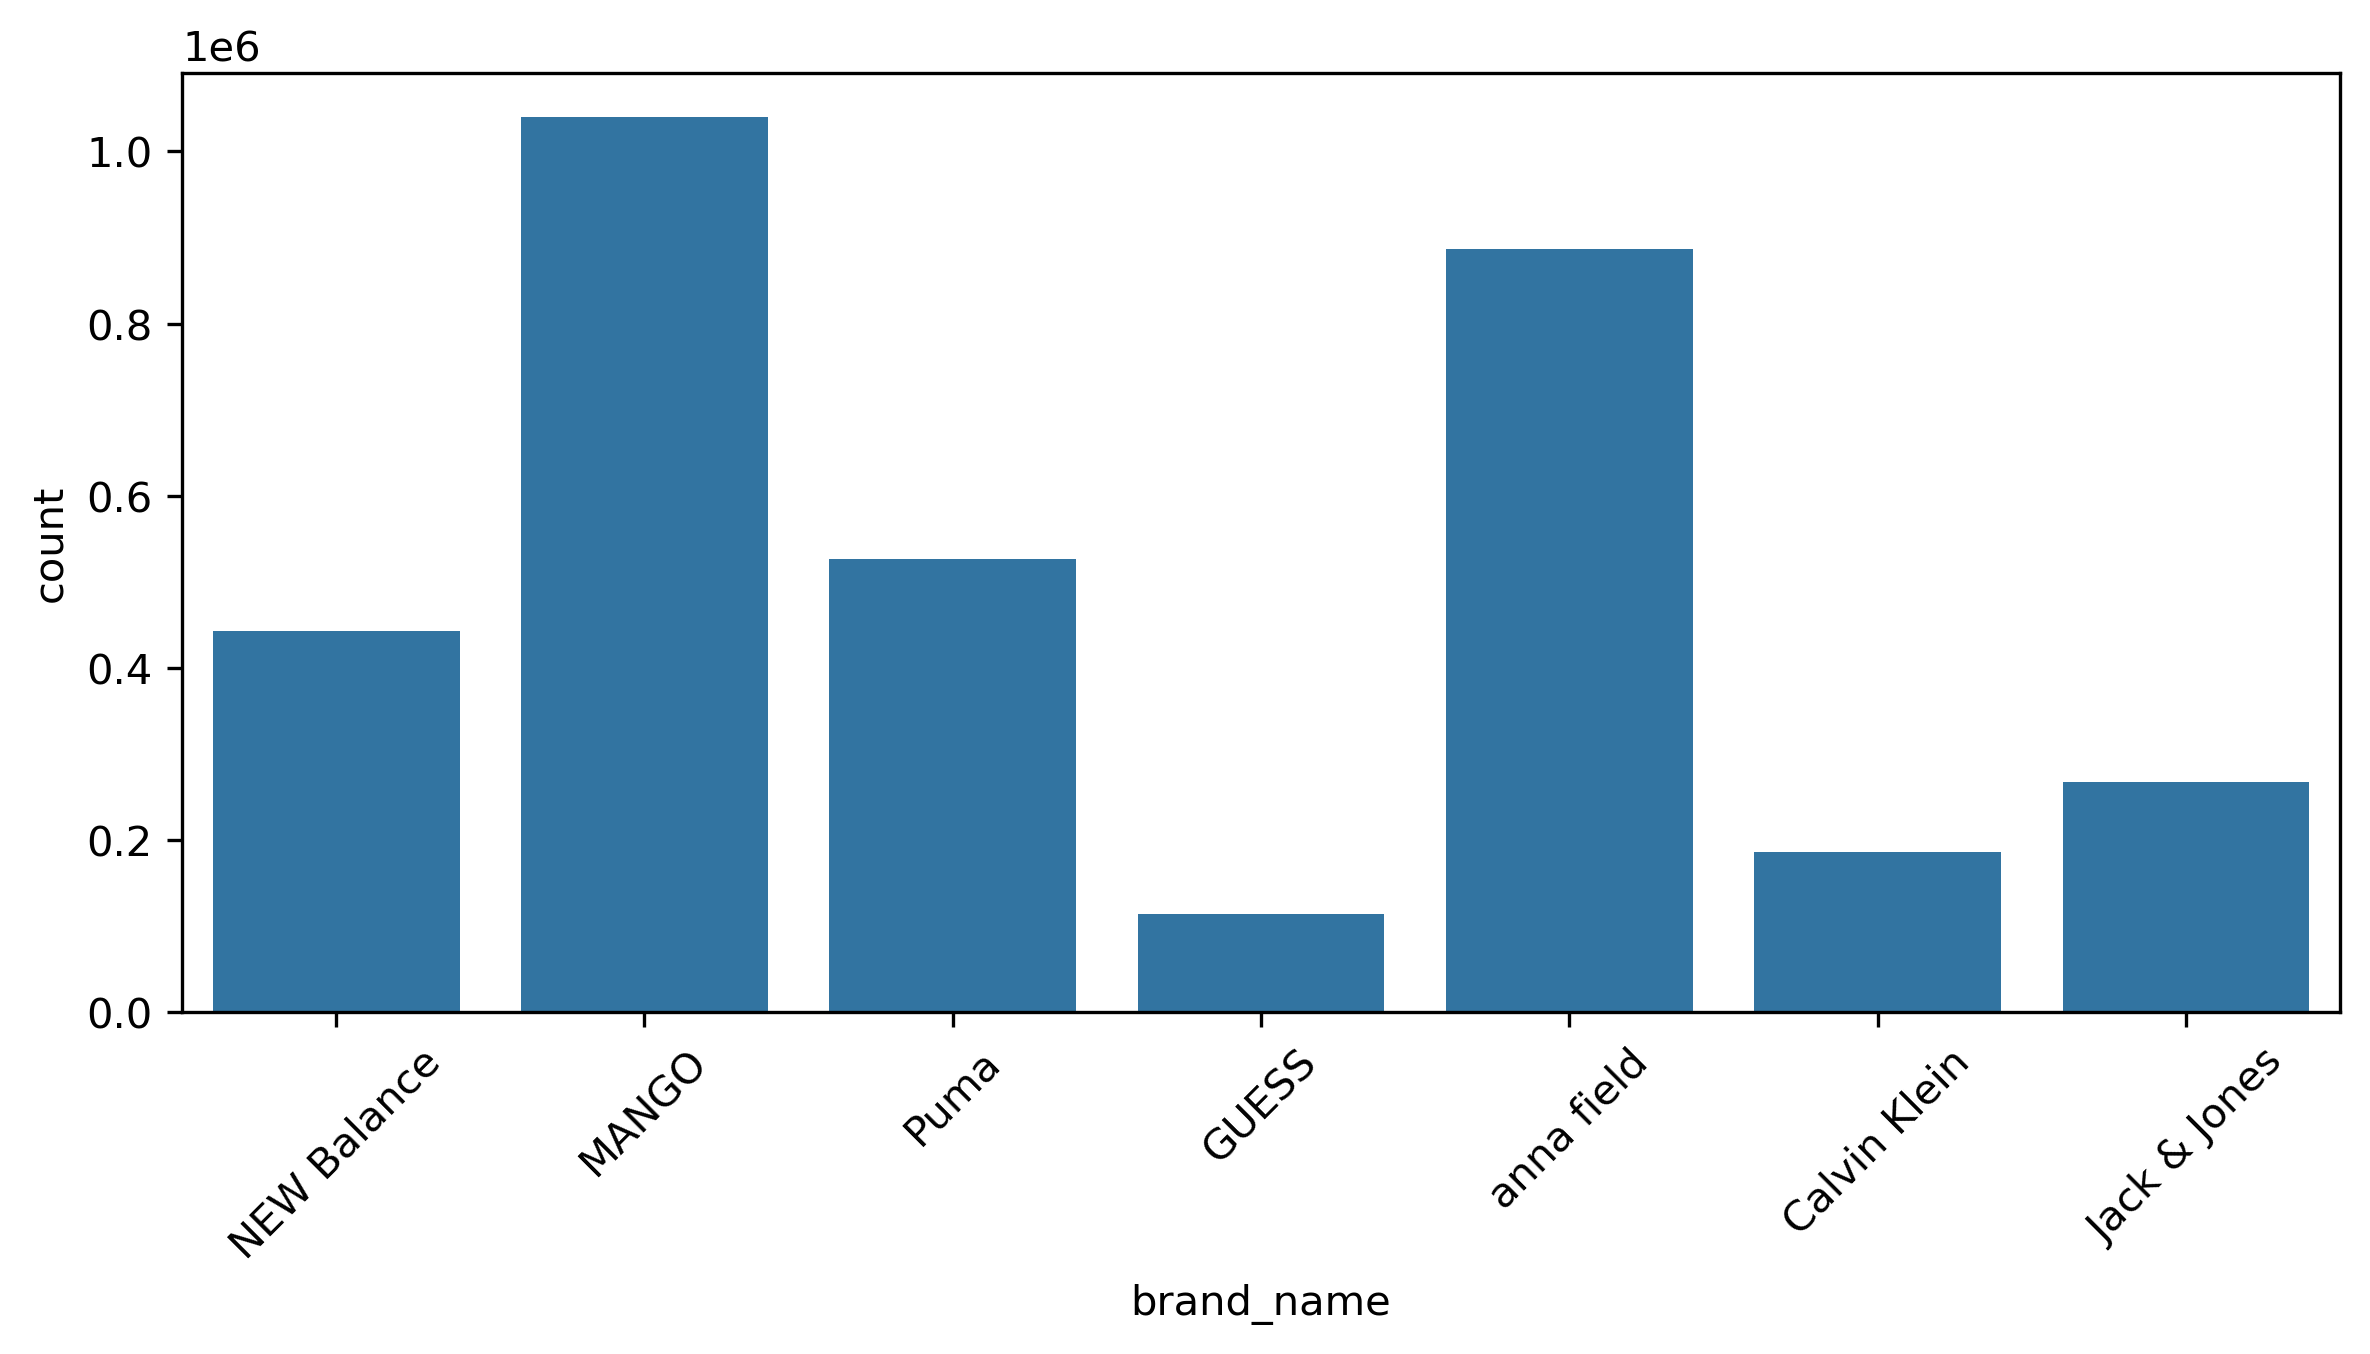

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='brand_name')
plt.tight_layout()
plt.xticks(rotation=45)

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
corr_matrix = numeric_cols.corr()

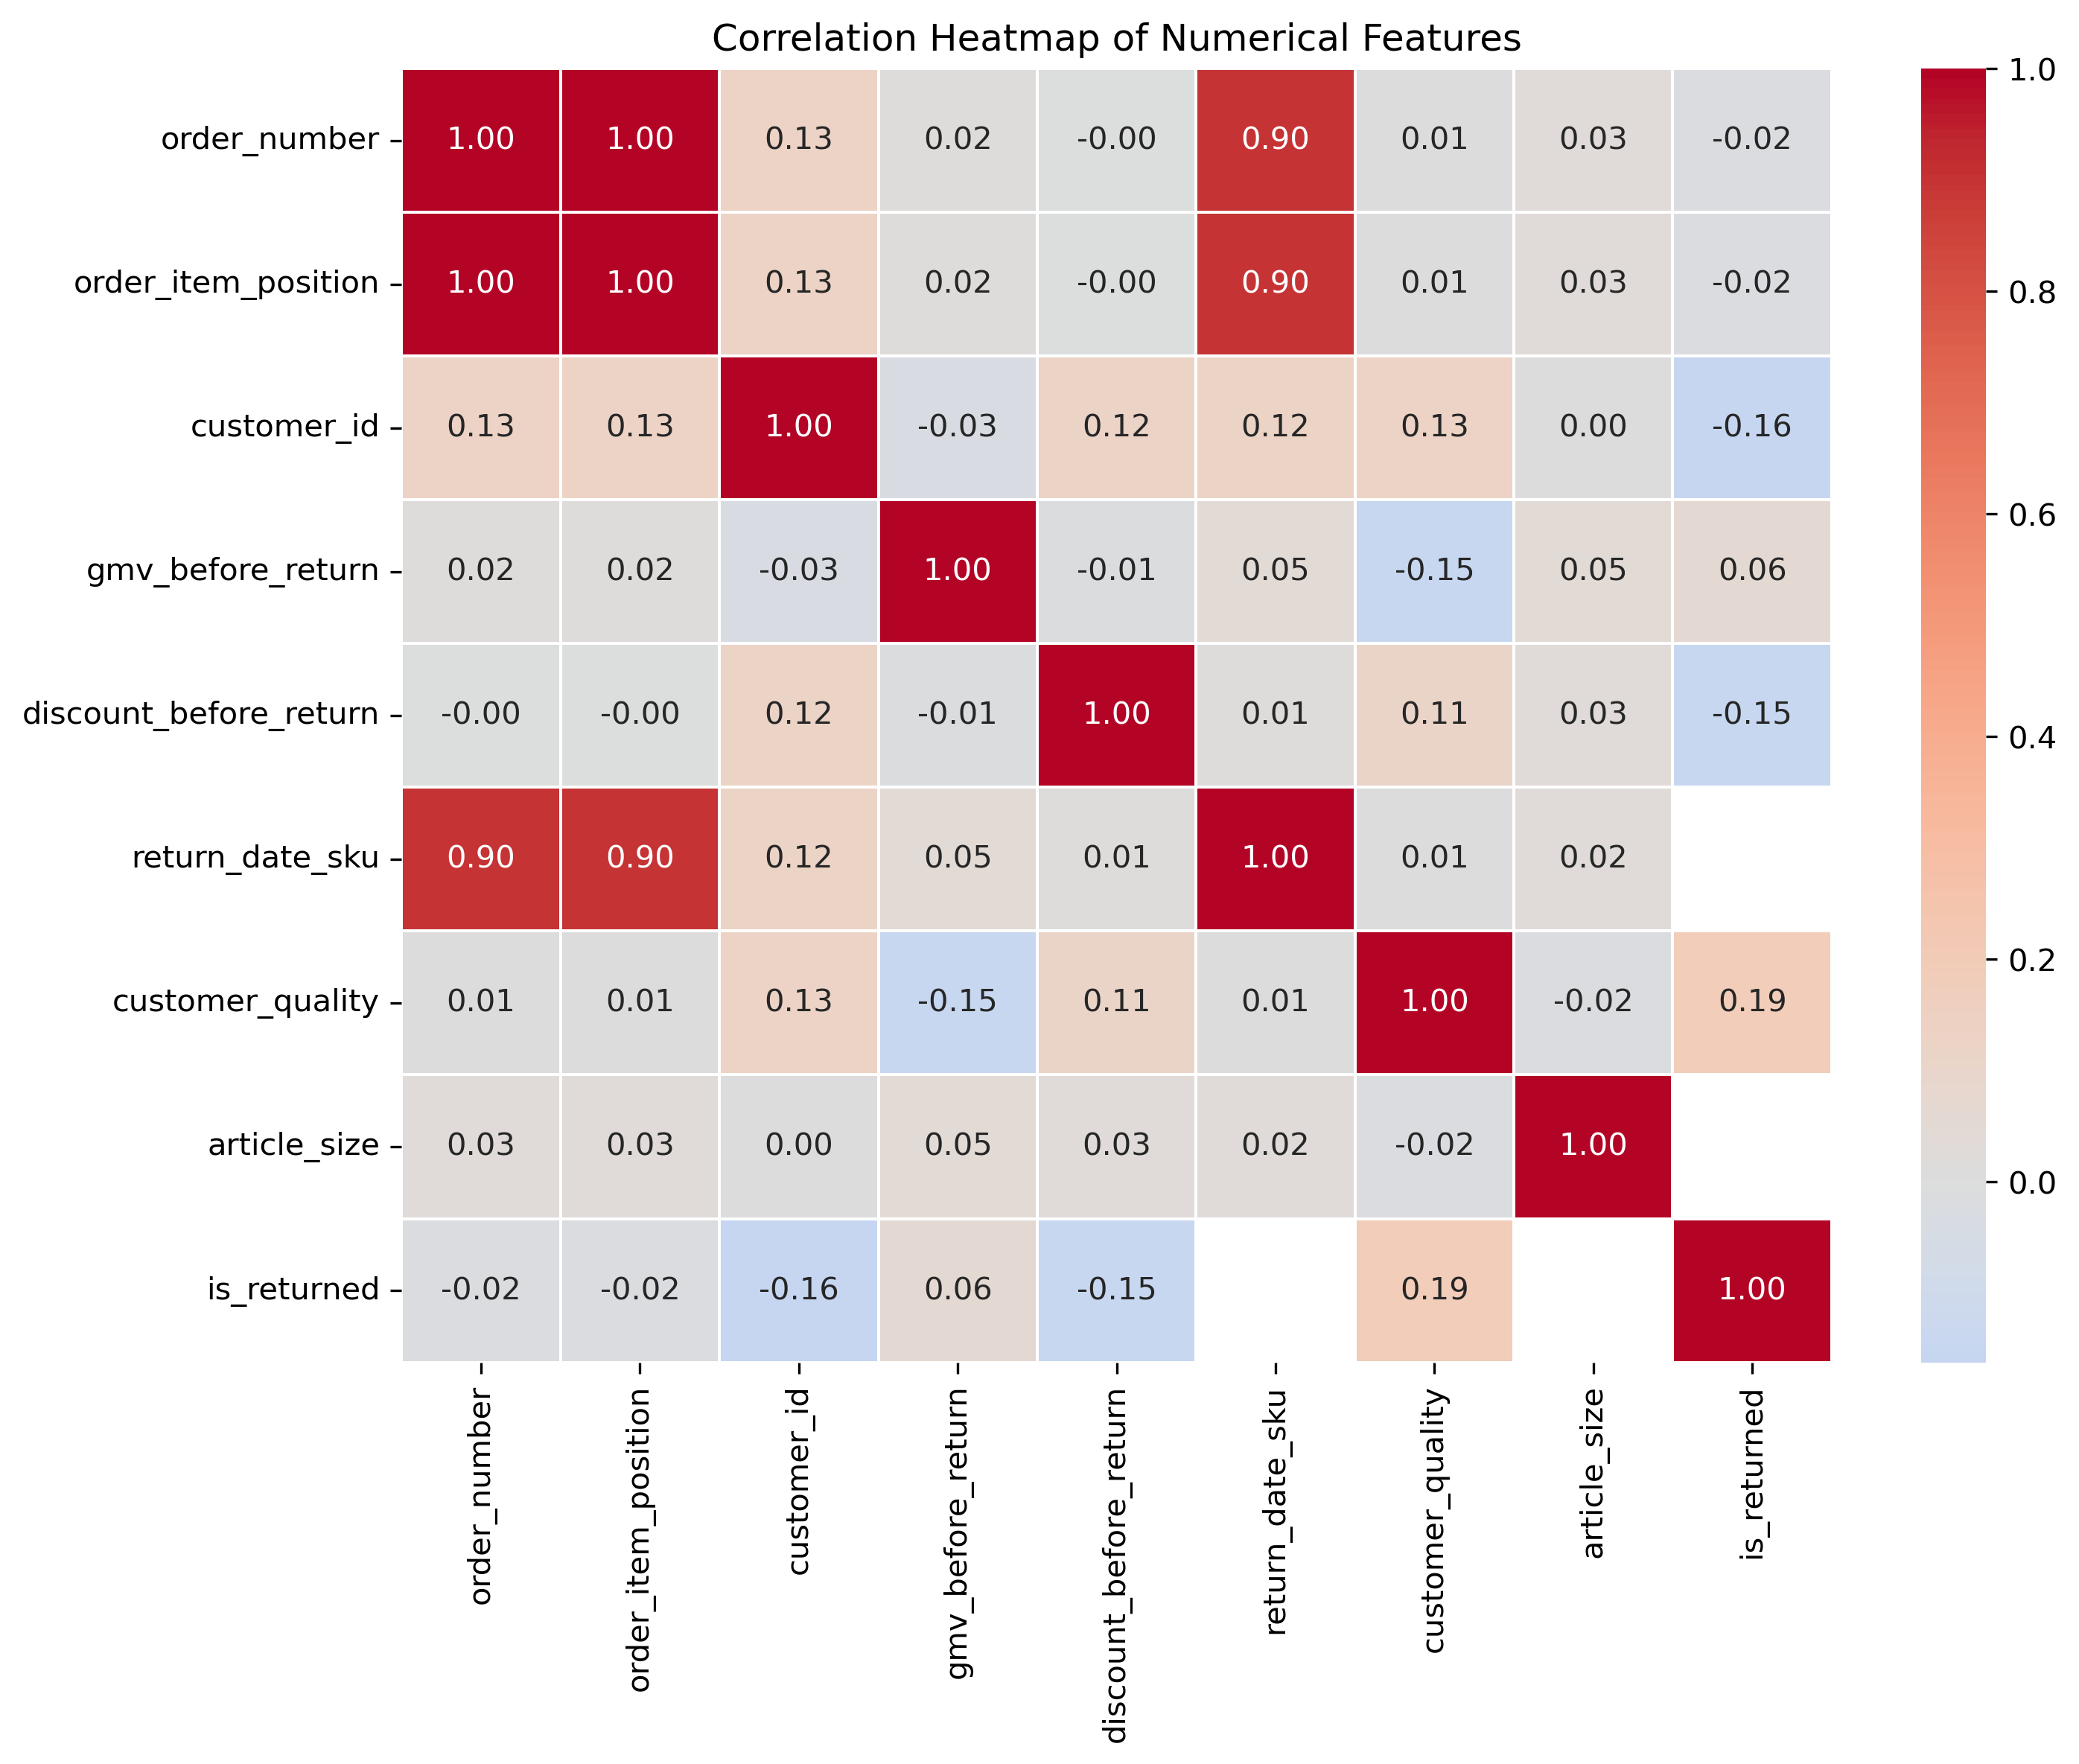

In [ ]:
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

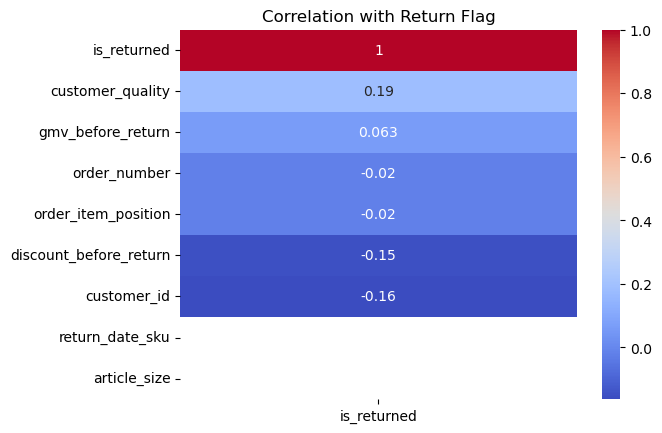

In [ ]:
target_corr = corr_matrix[['is_returned']].sort_values(by='is_returned', ascending=False)
sns.heatmap(target_corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Return Flag")
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Sweden'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Switzerland')])

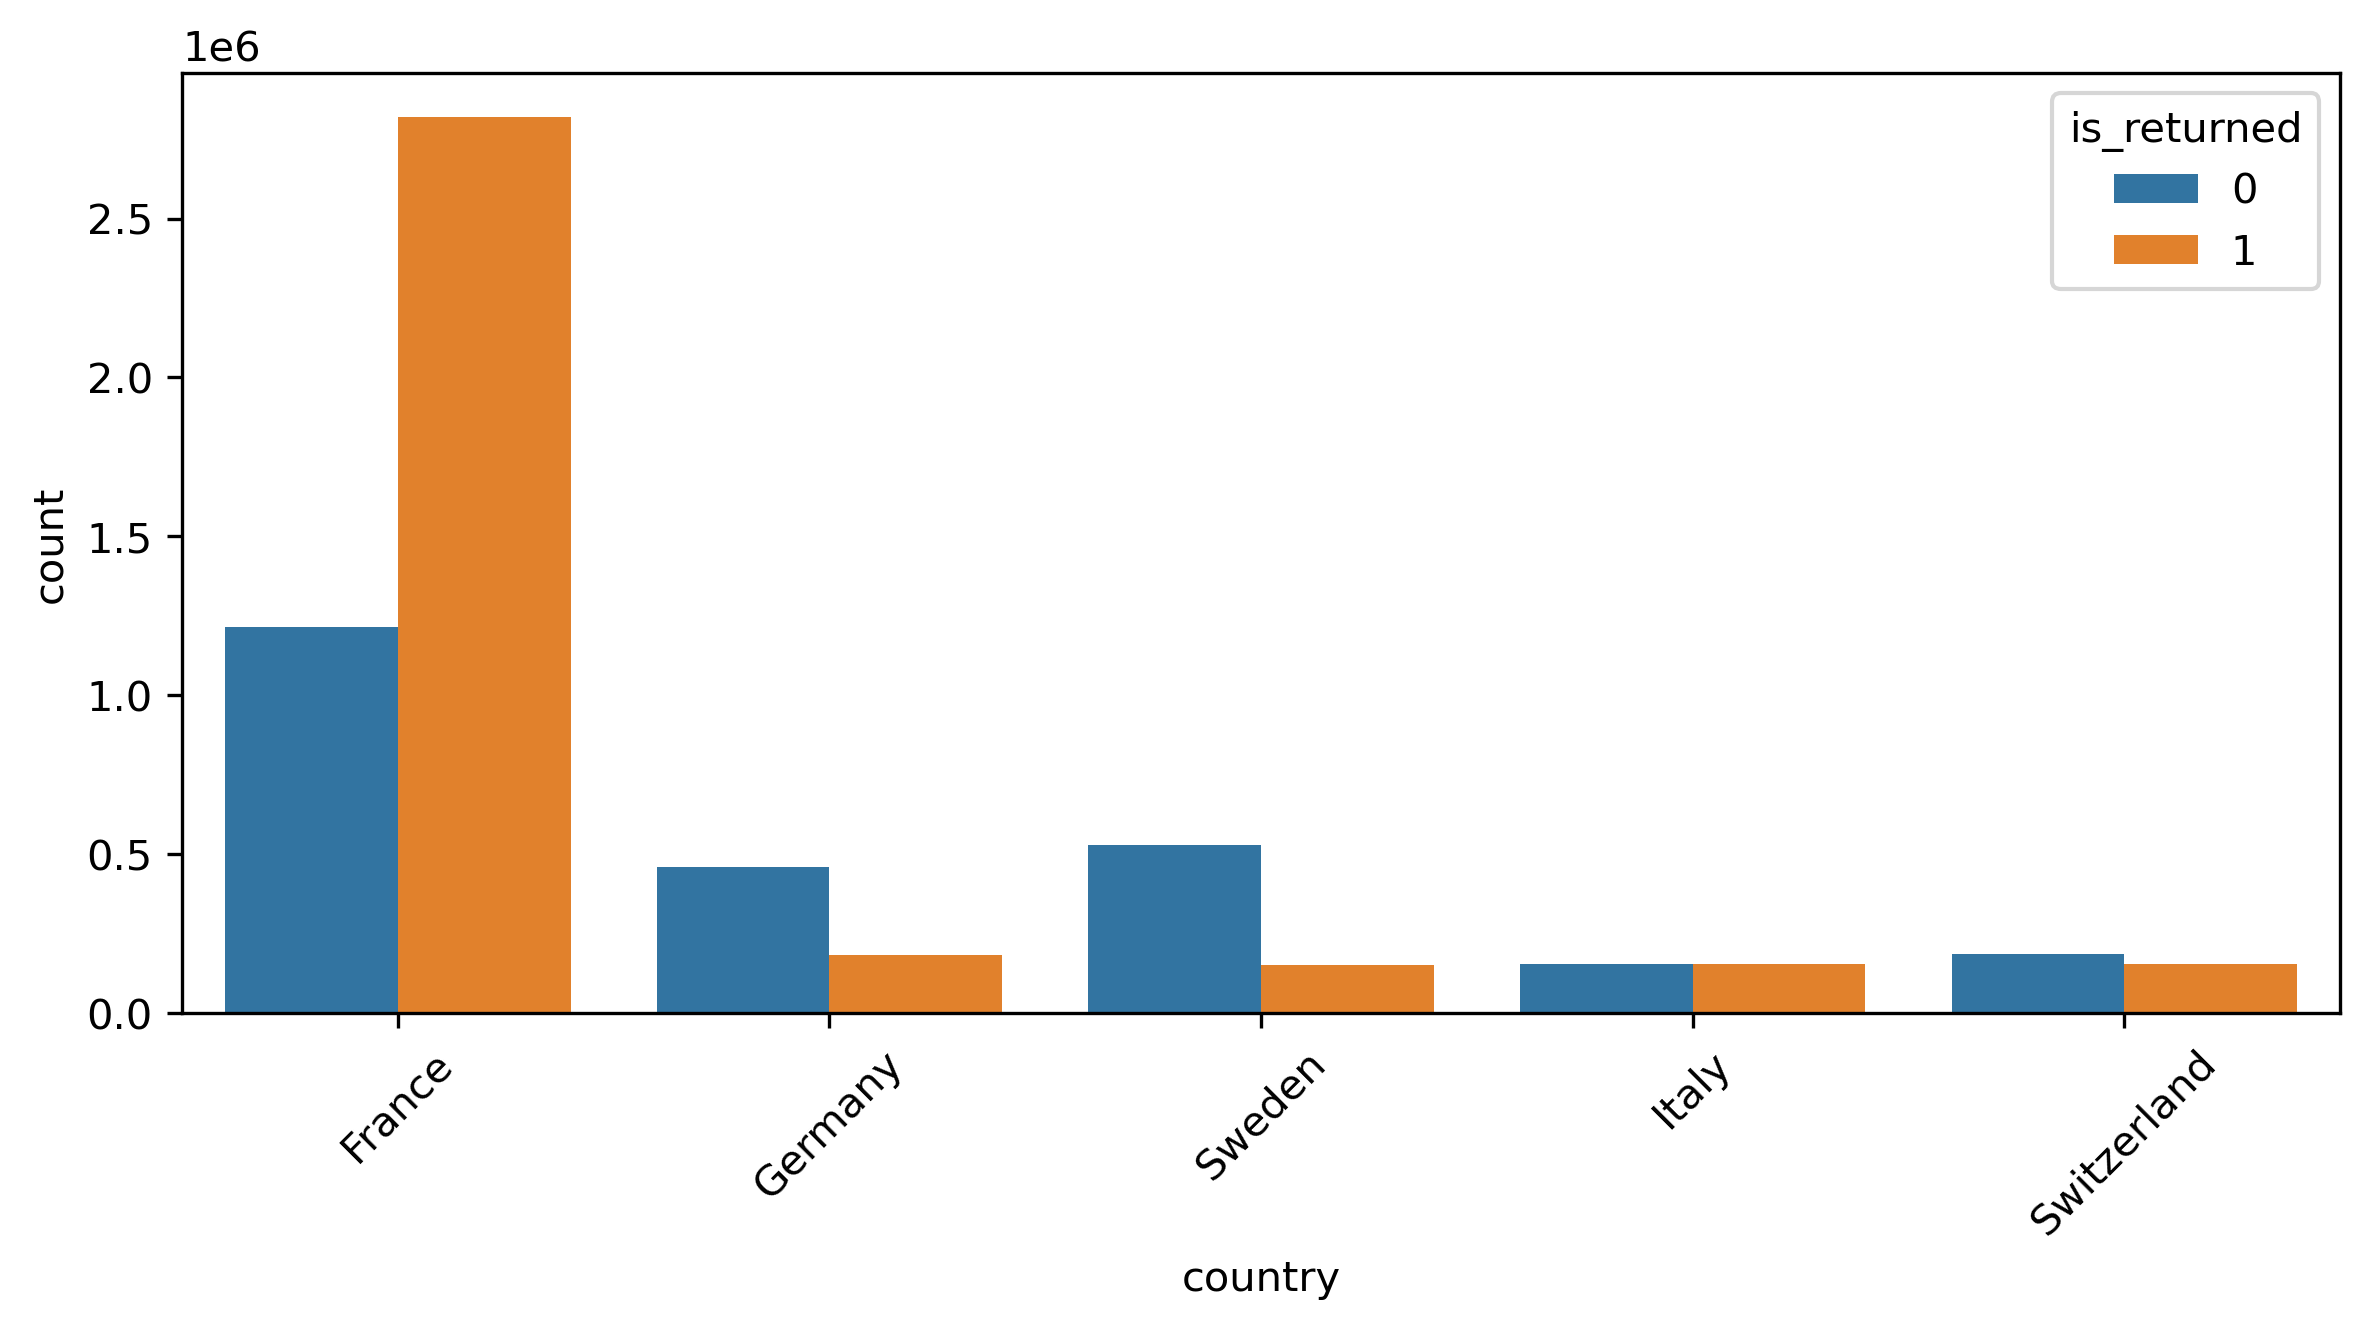

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='country', hue='is_returned')
plt.tight_layout()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Sweden'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Switzerland')])

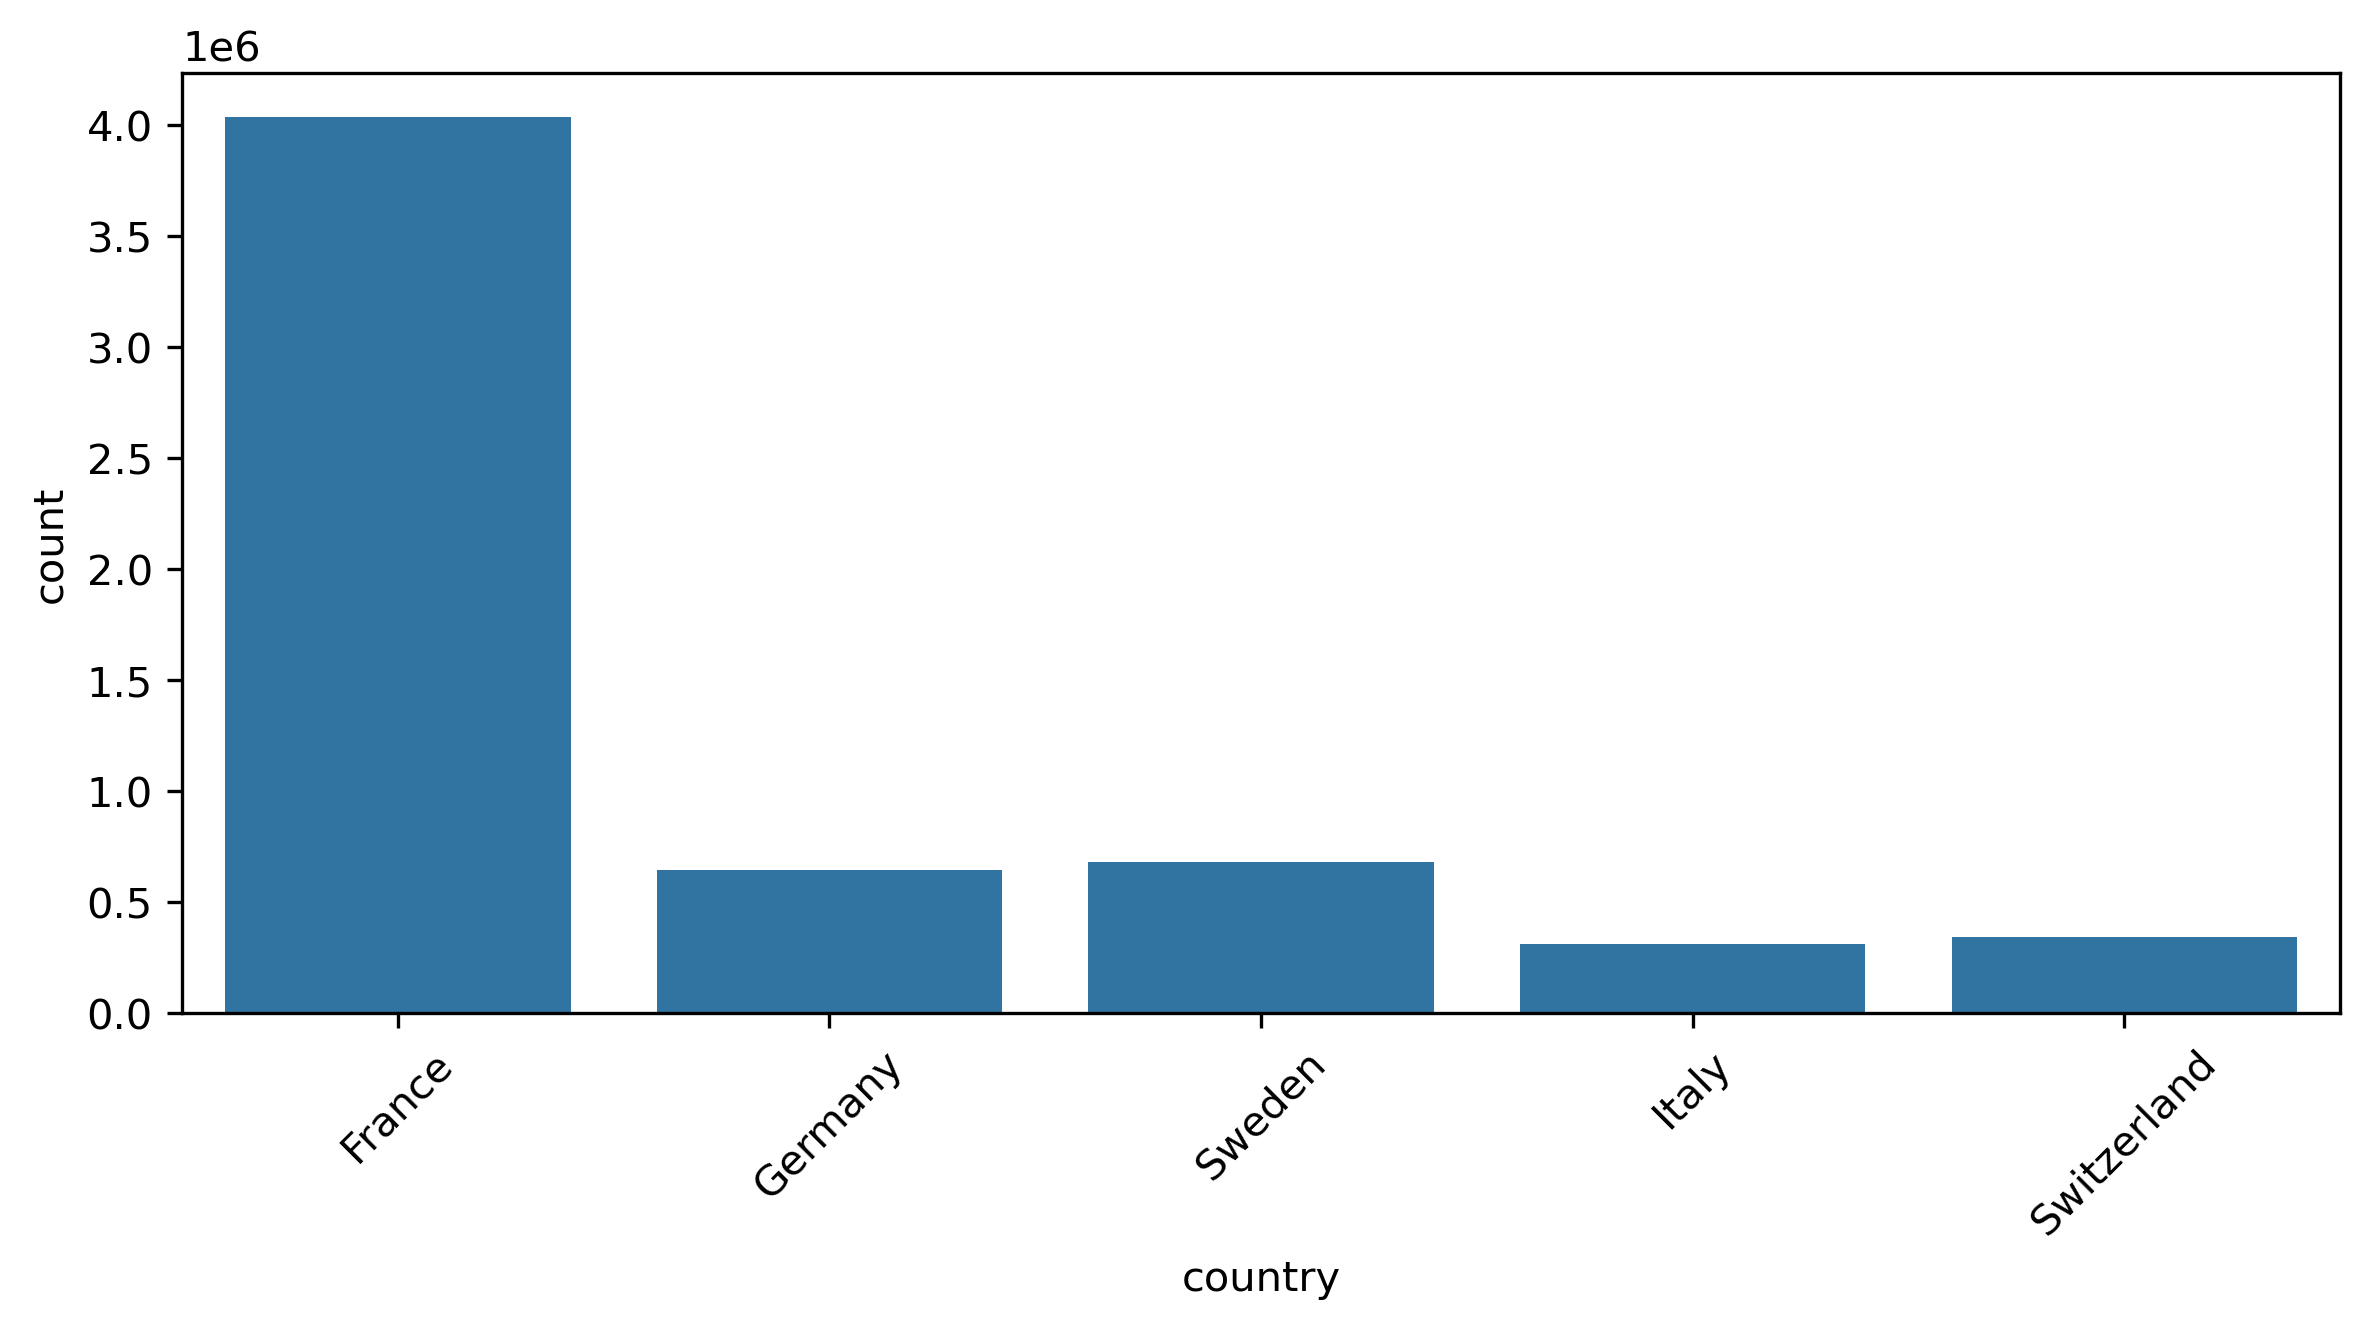

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='country')
plt.tight_layout()
plt.xticks(rotation=45)

In [ ]:
reason_brand_counts = (
    df.groupby(['return_reason', 'brand_name'])
      .size()
      .reset_index(name='count')
)
top3_per_reason = (
    reason_brand_counts
    .sort_values(['return_reason', 'count'], ascending=[True, False])
    .groupby('return_reason')
    .head(3)
)

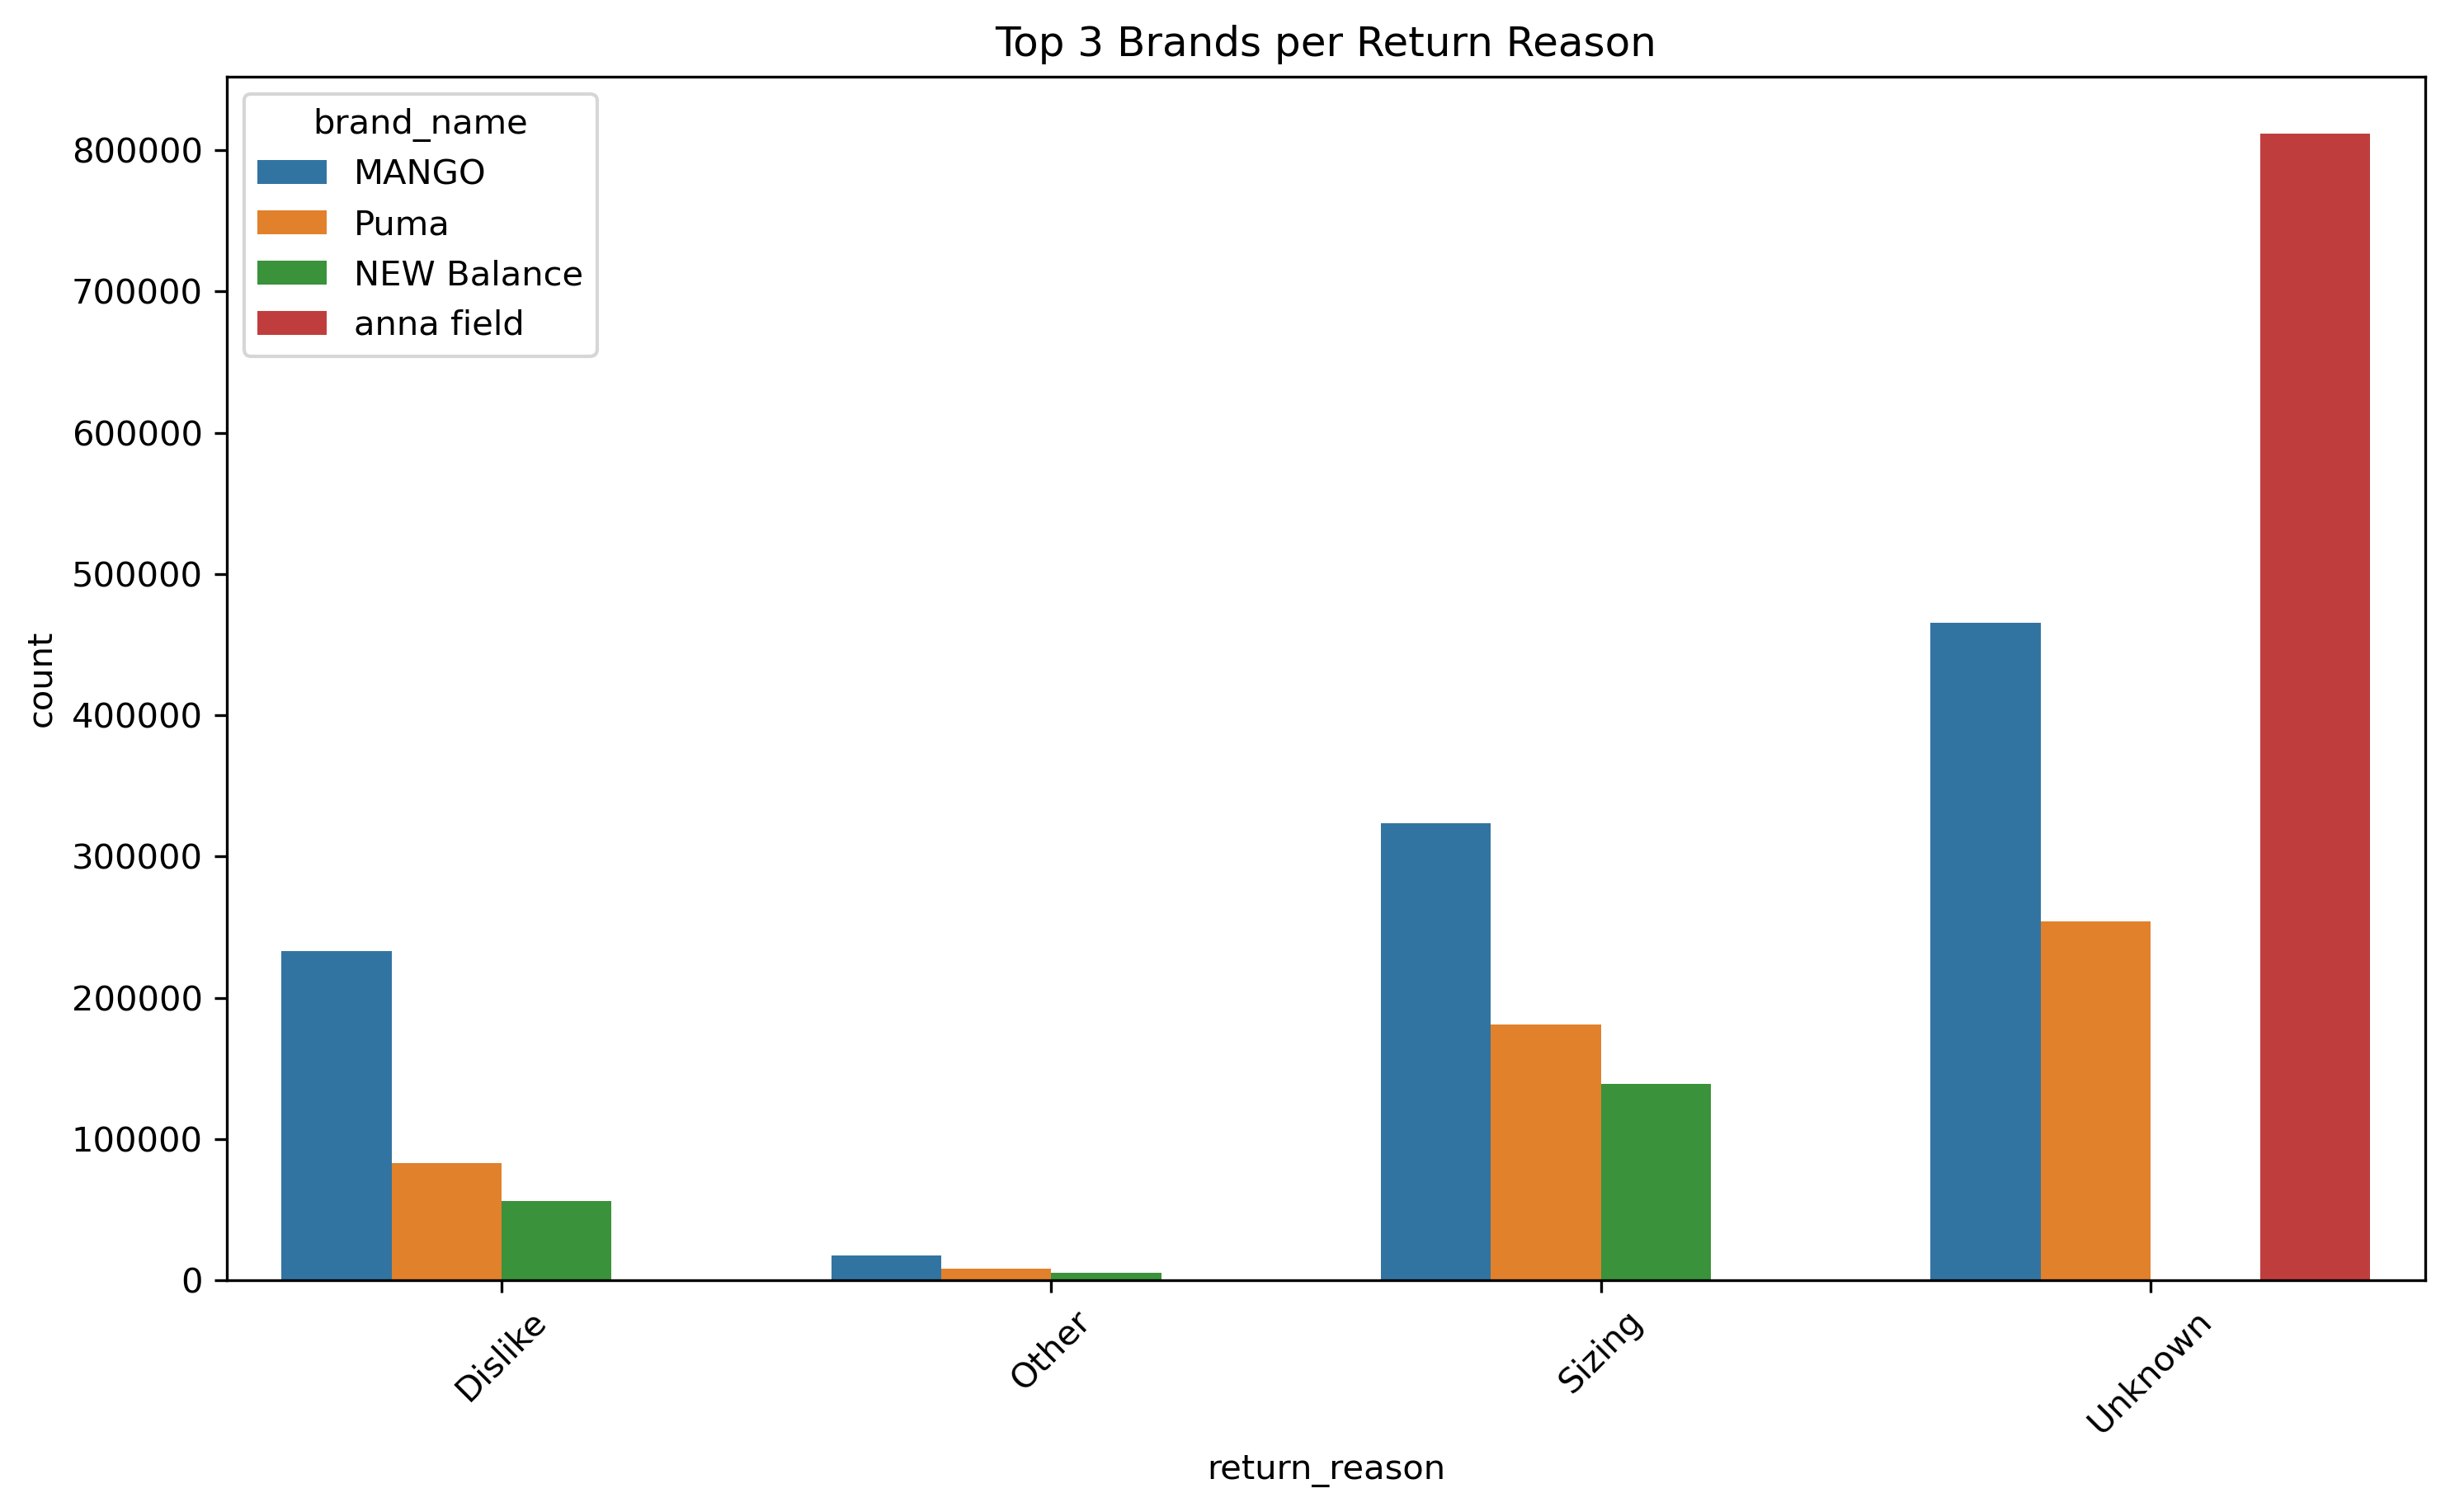

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(
    data=top3_per_reason,
    x='return_reason',
    y='count',
    hue='brand_name'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Top 3 Brands per Return Reason")
plt.show()

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

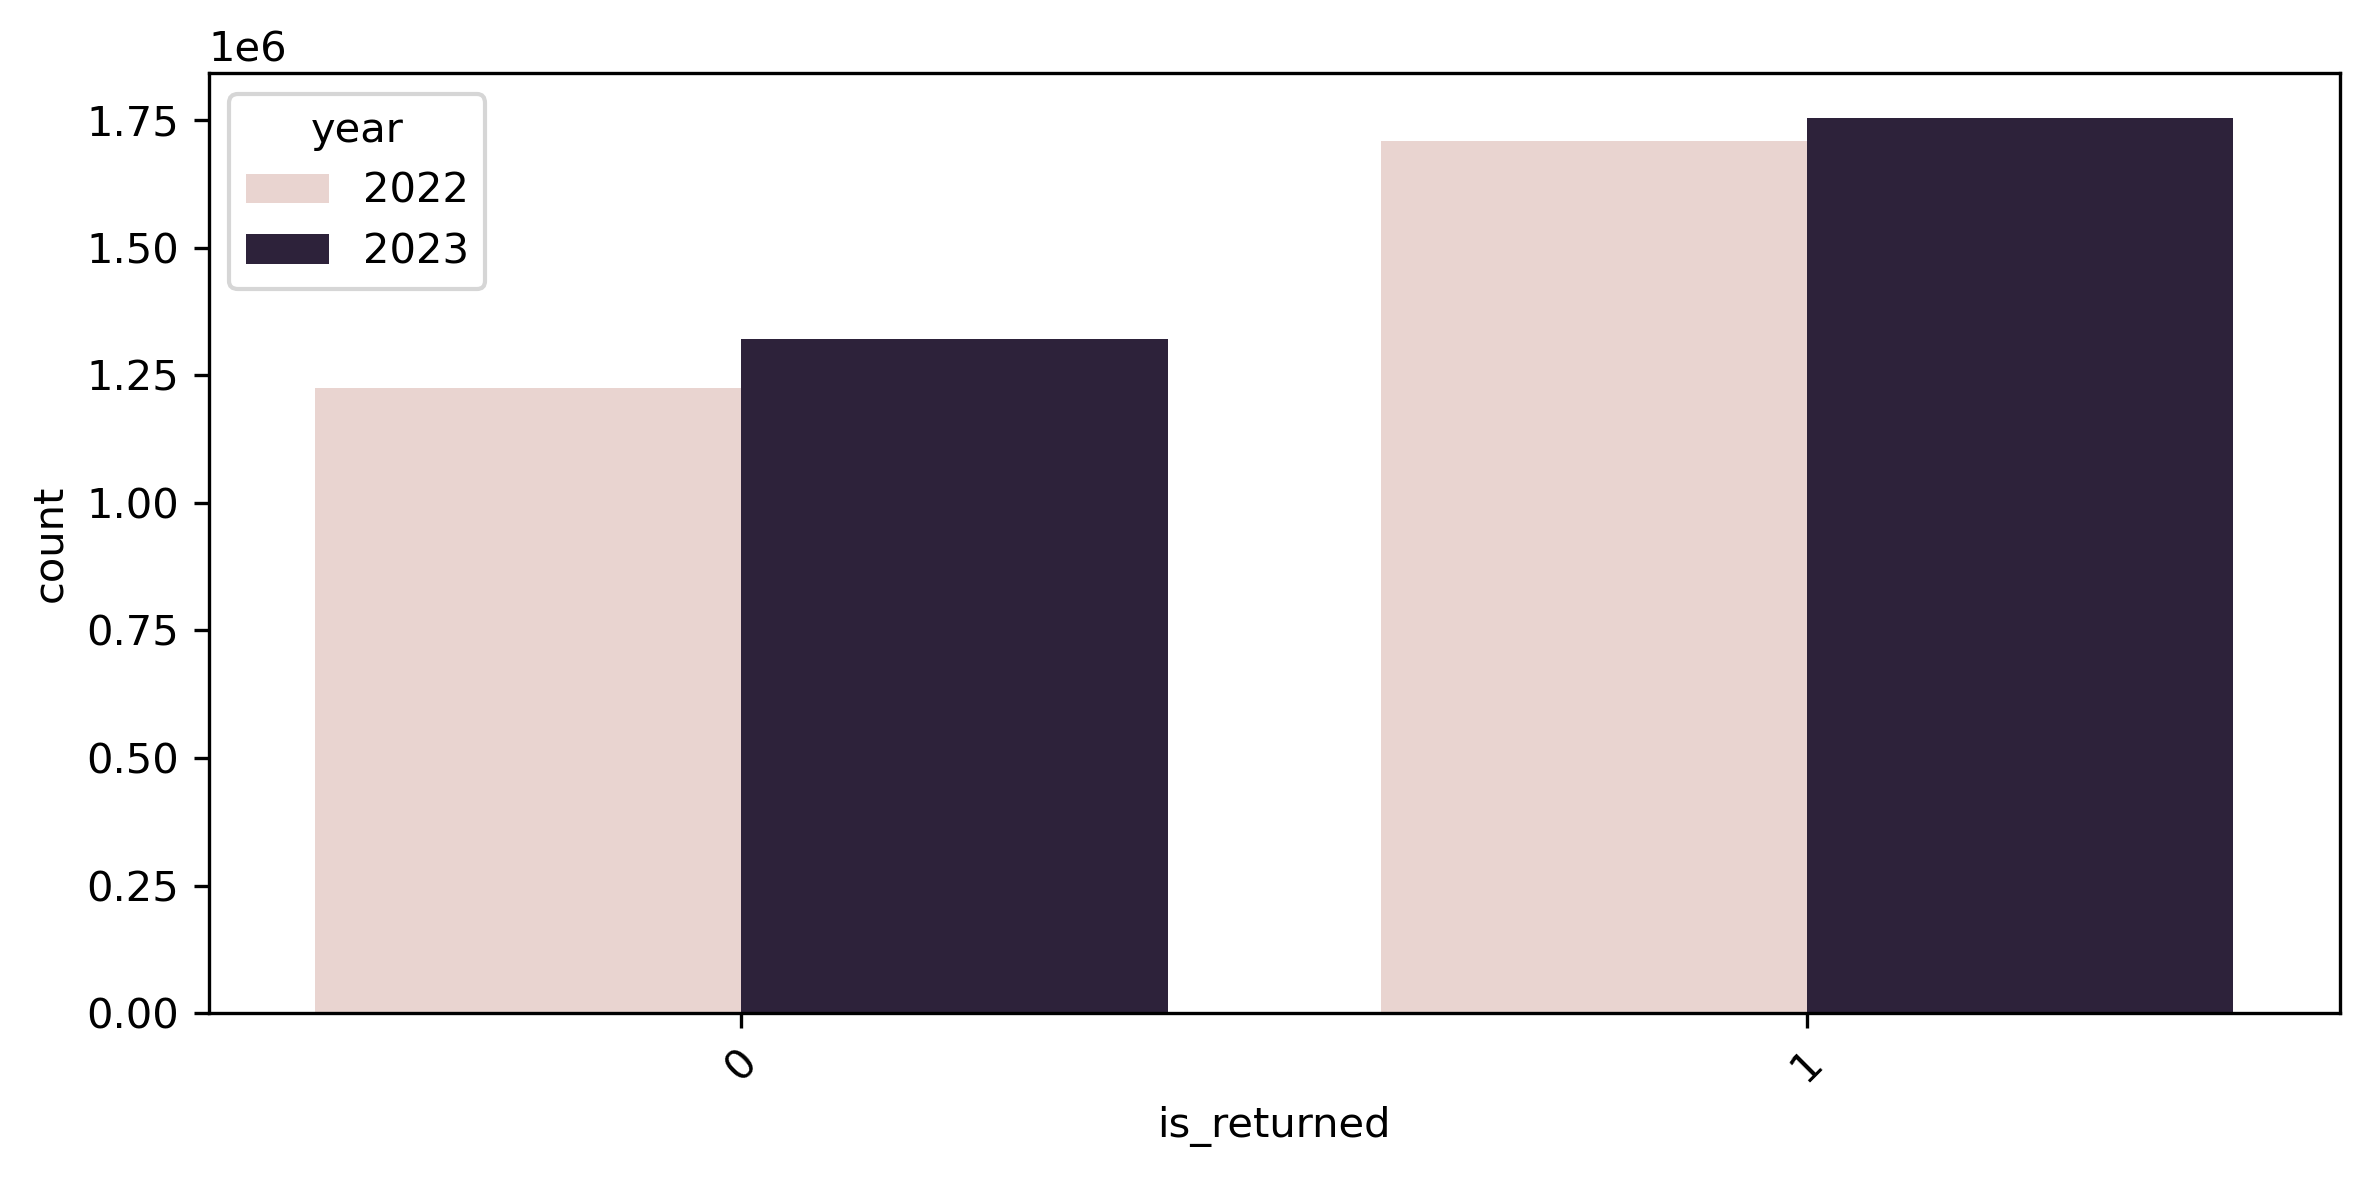

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='is_returned', hue='year')
plt.tight_layout()
plt.xticks(rotation=45)

In [ ]:
returned_df = df[df['is_returned'] == 1]

In [ ]:
year_returns = df.groupby('year')['is_returned'].agg(['mean', 'count']).reset_index()
year_returns.rename(columns={'mean': 'return_rate'}, inplace=True)

month_returns = (
    df.groupby(['year', 'month'])['is_returned']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'return_rate'})
)

weekday_returns = (
    df.groupby(['year', 'day_of_week'])['is_returned']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'return_rate'})
)



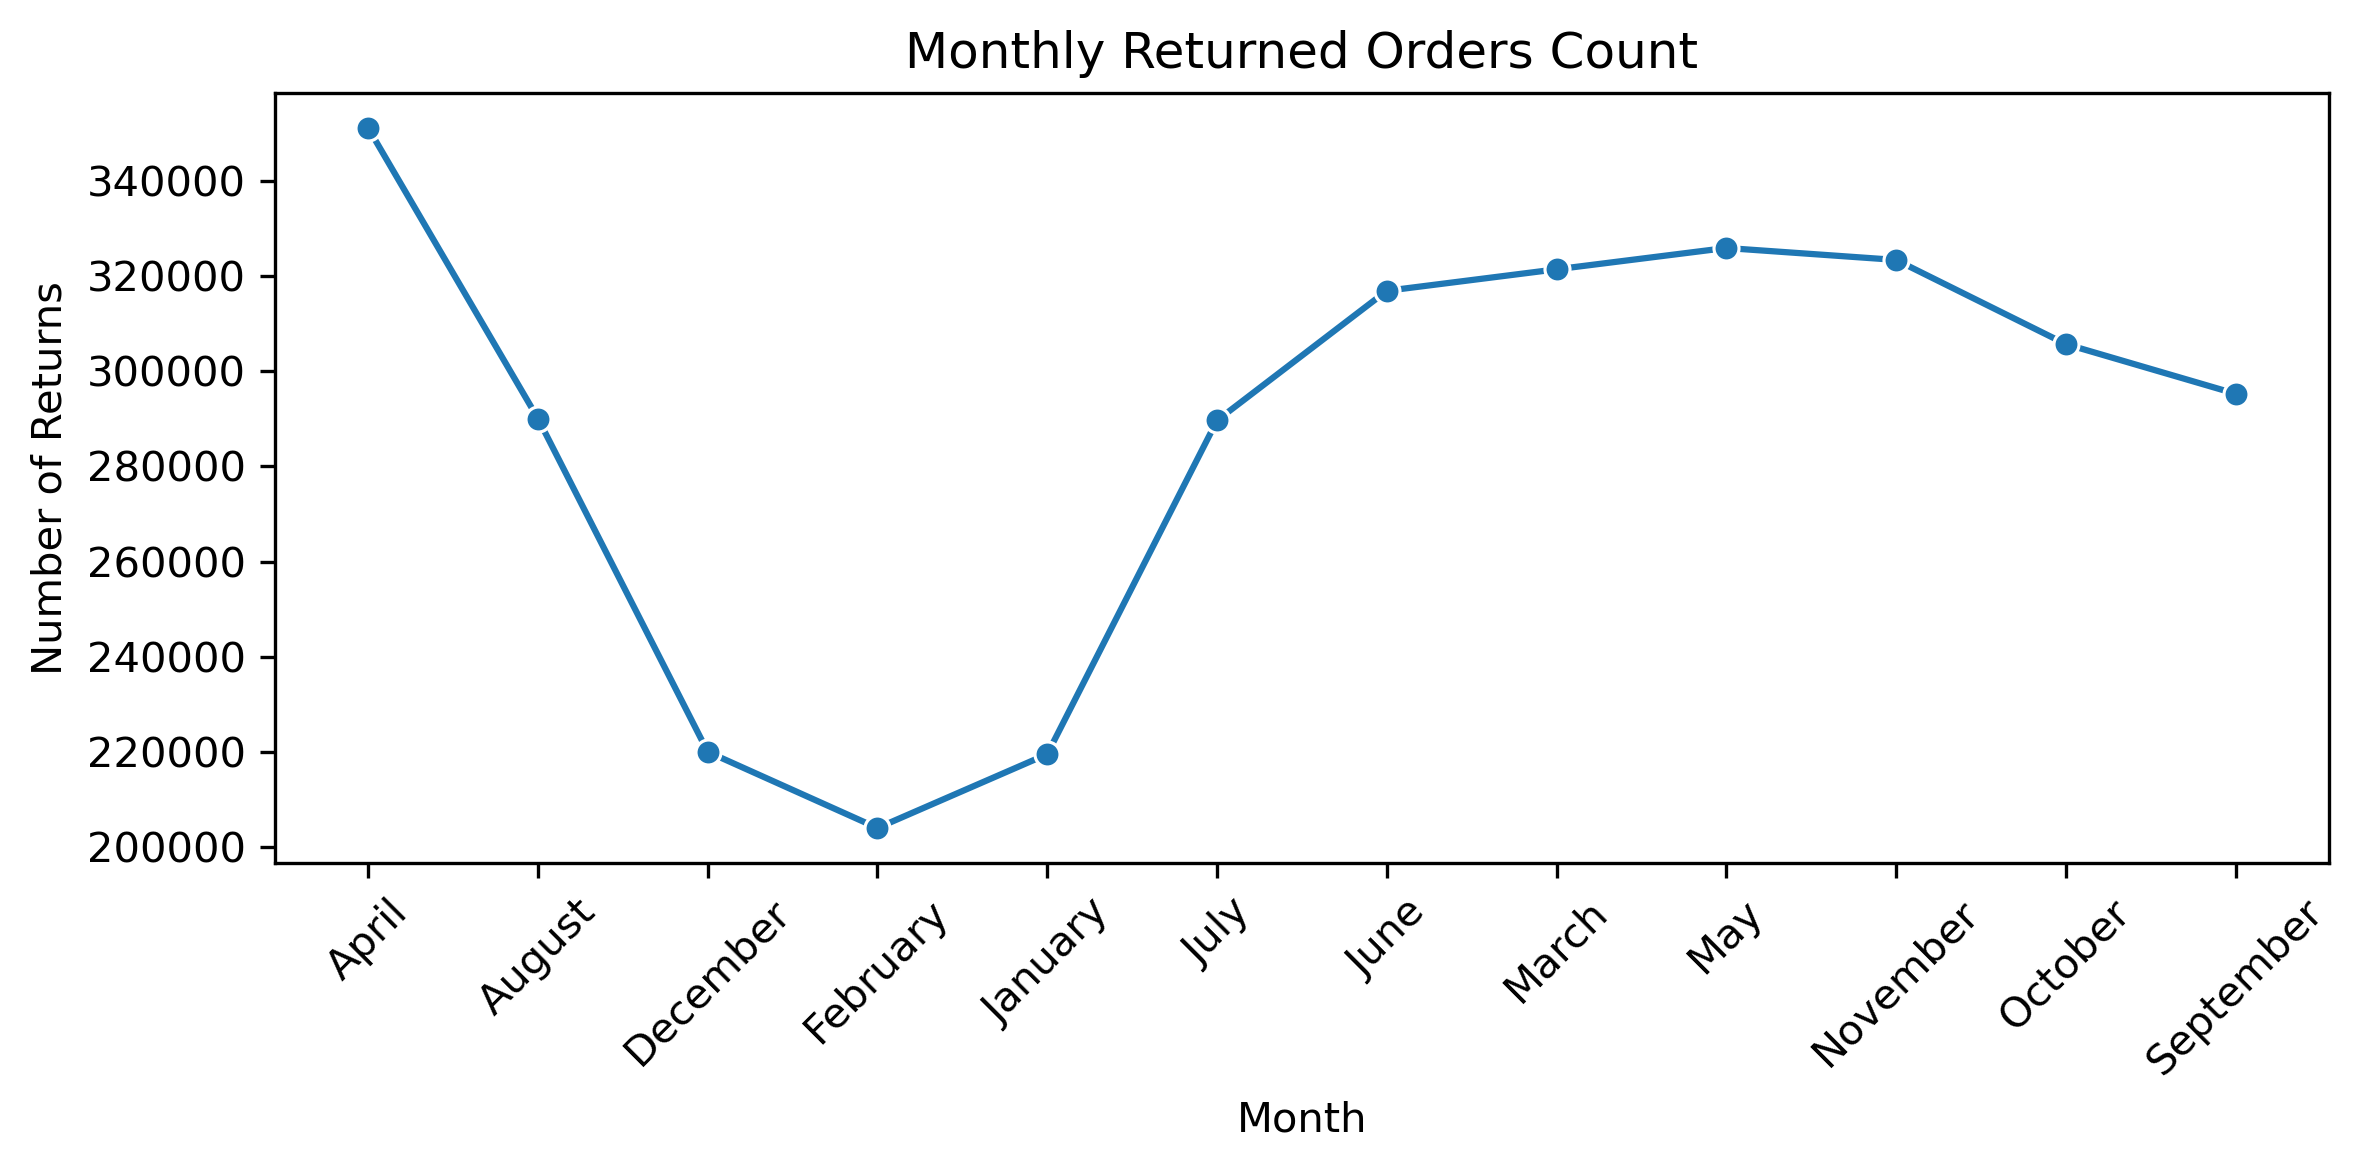

In [ ]:


grouped_month = returned_df.groupby('month').size().reset_index(name='count')

plt.figure(figsize=(8,4), dpi=300)
sns.lineplot(data=grouped_month, x='month', y='count', marker='o')
plt.title('Monthly Returned Orders Count')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df.head(10)

order_number  order_item_position      config_sku size_sku  customer_id  \
0     330812595            930364825  BNE211S048-A11  0012000     36751175   
1     330817221            930336225  XAN621CAJM-Q11  0036000    211454424   
2     330818553            930351730  APU111S06U-Q11  0007000    317213832   
3     330818553            930351731  APU111S06U-Q11  0065000    317213832   
4     330818585            930353320  APU115B04J-C11  0045000    418394519   
5     330818587            930364855  XAN621CALS-G11  0042000    269428195   
6     330820148            930385967  APU111S07A-Q11  0075000     35628035   
7     330820206            930386843  XAN621CAIB-Q11  0044000     43591638   
8     330820221            930406924  APU111S06R-Q11  0004000    555344742   
9     330820244            930402837  BNE215A032-502  0014000    539243430   

  order_date  gmv_before_return  discount_before_return  \
0 2022-01-01              79.95                   20.00   
1 2022-01-01              28.00                   11.95   
2 2022-01-01              59.95                   40.00   
3 2022-01-01              59.95                   40.00   
4 2022-01-01              65.99                   44.00   
5 2022-01-01              39.99                    0.00   
6 2022-01-01              51.95                   13.00   
7 2022-01-01              24.95                   25.00   
8 2022-01-01              54.95                   55.00   
9 2022-01-01              49.95                   50.00   

              simple_sku  return_date_sku return_reason customer_gender  \
0                   None              NaN          None           Women   
1                   None              NaN          None           Women   
2  APU111S06U-Q110007000       20220115.0       Unknown           Women   
3  APU111S06U-Q110065000       20220115.0       Unknown           Women   
4                   None              NaN          None           Women   
5                   None              NaN          None           Women   
6                   None              NaN          None           Women   
7  XAN621CAIB-Q110044000       20220110.0       Unknown           Women   
8                   None              NaN          None           Women   
9                   None              NaN          None             Men   

   country  customer_quality  article_size product_category   brand_name  \
0   France               2.0           NaN             None         None   
1  Germany               1.0           NaN             None         None   
2   France               3.0          40.5         Sneakers  NEW Balance   
3   France               3.0          40.0         Sneakers  NEW Balance   
4   Sweden               2.0           NaN             None         None   
5   Sweden               4.0           NaN             None         None   
6   France               4.0           NaN             None         None   
7   France               4.0          44.0          Dresses        MANGO   
8   France               1.0           NaN             None         None   
9   France               2.0           NaN             None         None   

   is_returned    discount_tier   sneaker_sizes dress_sizes jean_sizes  \
0            0     Low Discount            None        None       None   
1            0     Low Discount            None        None       None   
2            1  Medium Discount  Medium (39–41)        None       None   
3            1  Medium Discount  Medium (39–41)        None       None   
4            0  Medium Discount            None        None       None   
5            0      No Discount            None        None       None   
6            0     Low Discount            None        None       None   
7            1     Low Discount            None          XL       None   
8            0  Medium Discount            None        None       None   
9            0  Medium Discount            None        None       None   

    tier_categor

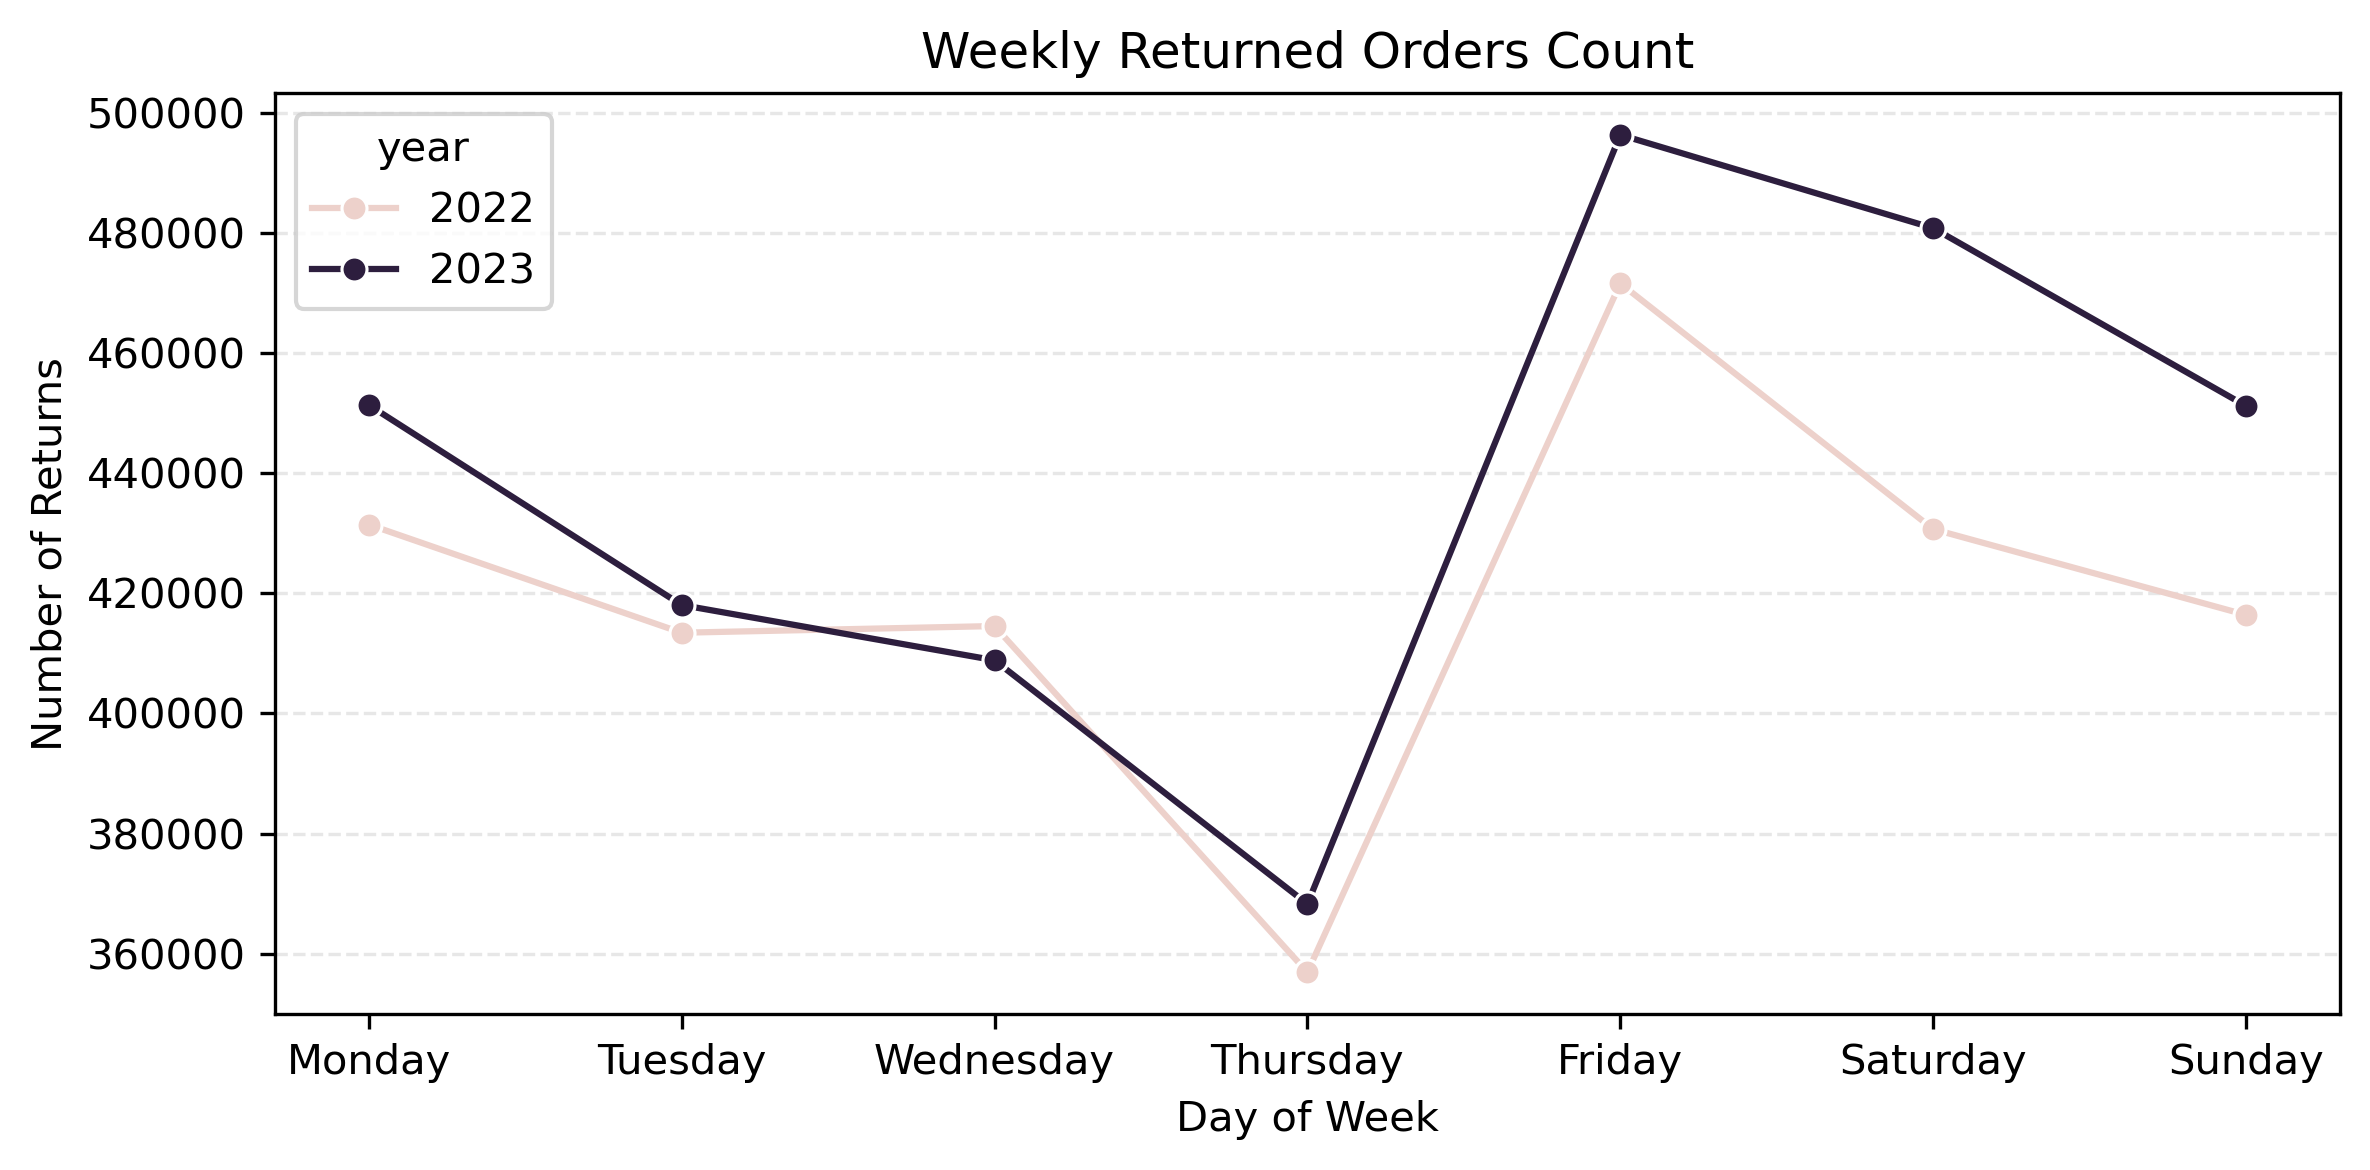

In [ ]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_returns['day_of_week'] = pd.Categorical(weekday_returns['day_of_week'], categories=order, ordered=True)
weekday_returns = weekday_returns.sort_values(['day_of_week', 'year'])

plt.figure(figsize=(8, 4), dpi=300)
sns.lineplot(data=weekday_returns, x='day_of_week', y='count', hue='year', marker='o')
plt.title('Weekly Returned Orders Count')
plt.xlabel('Day of Week')
plt.ylabel('Number of Returns')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

([0, 1, 2], [Text(0, 0, 'Women'), Text(1, 0, 'Men'), Text(2, 0, 'Unknown')])

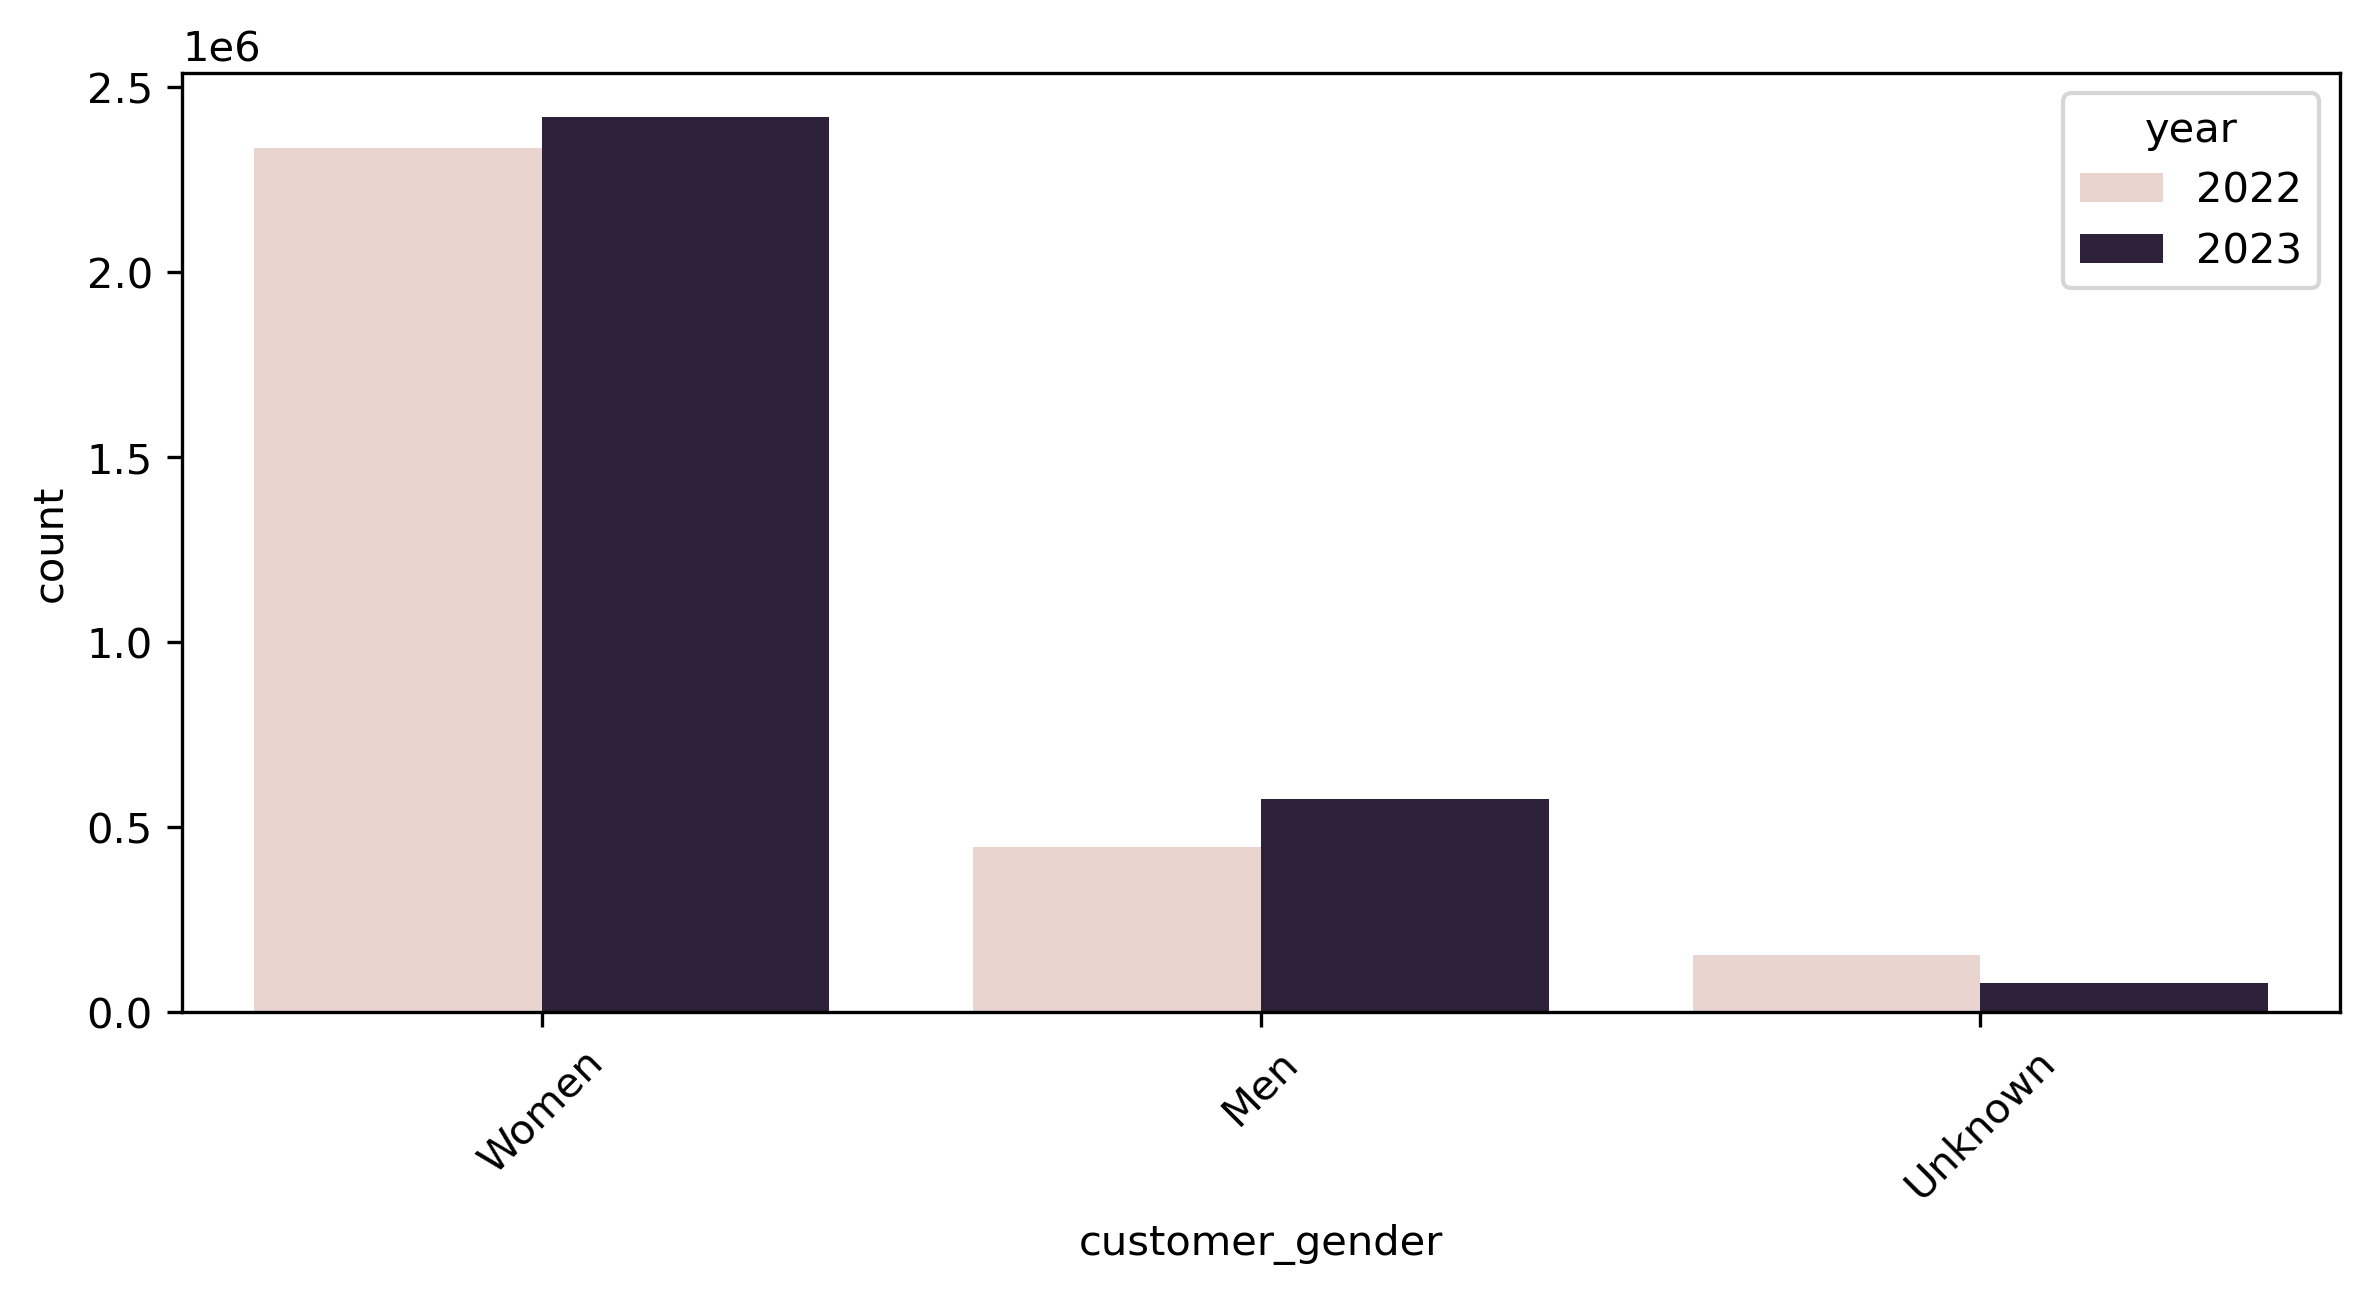

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='customer_gender', hue='year')
plt.tight_layout()
plt.xticks(rotation=45)

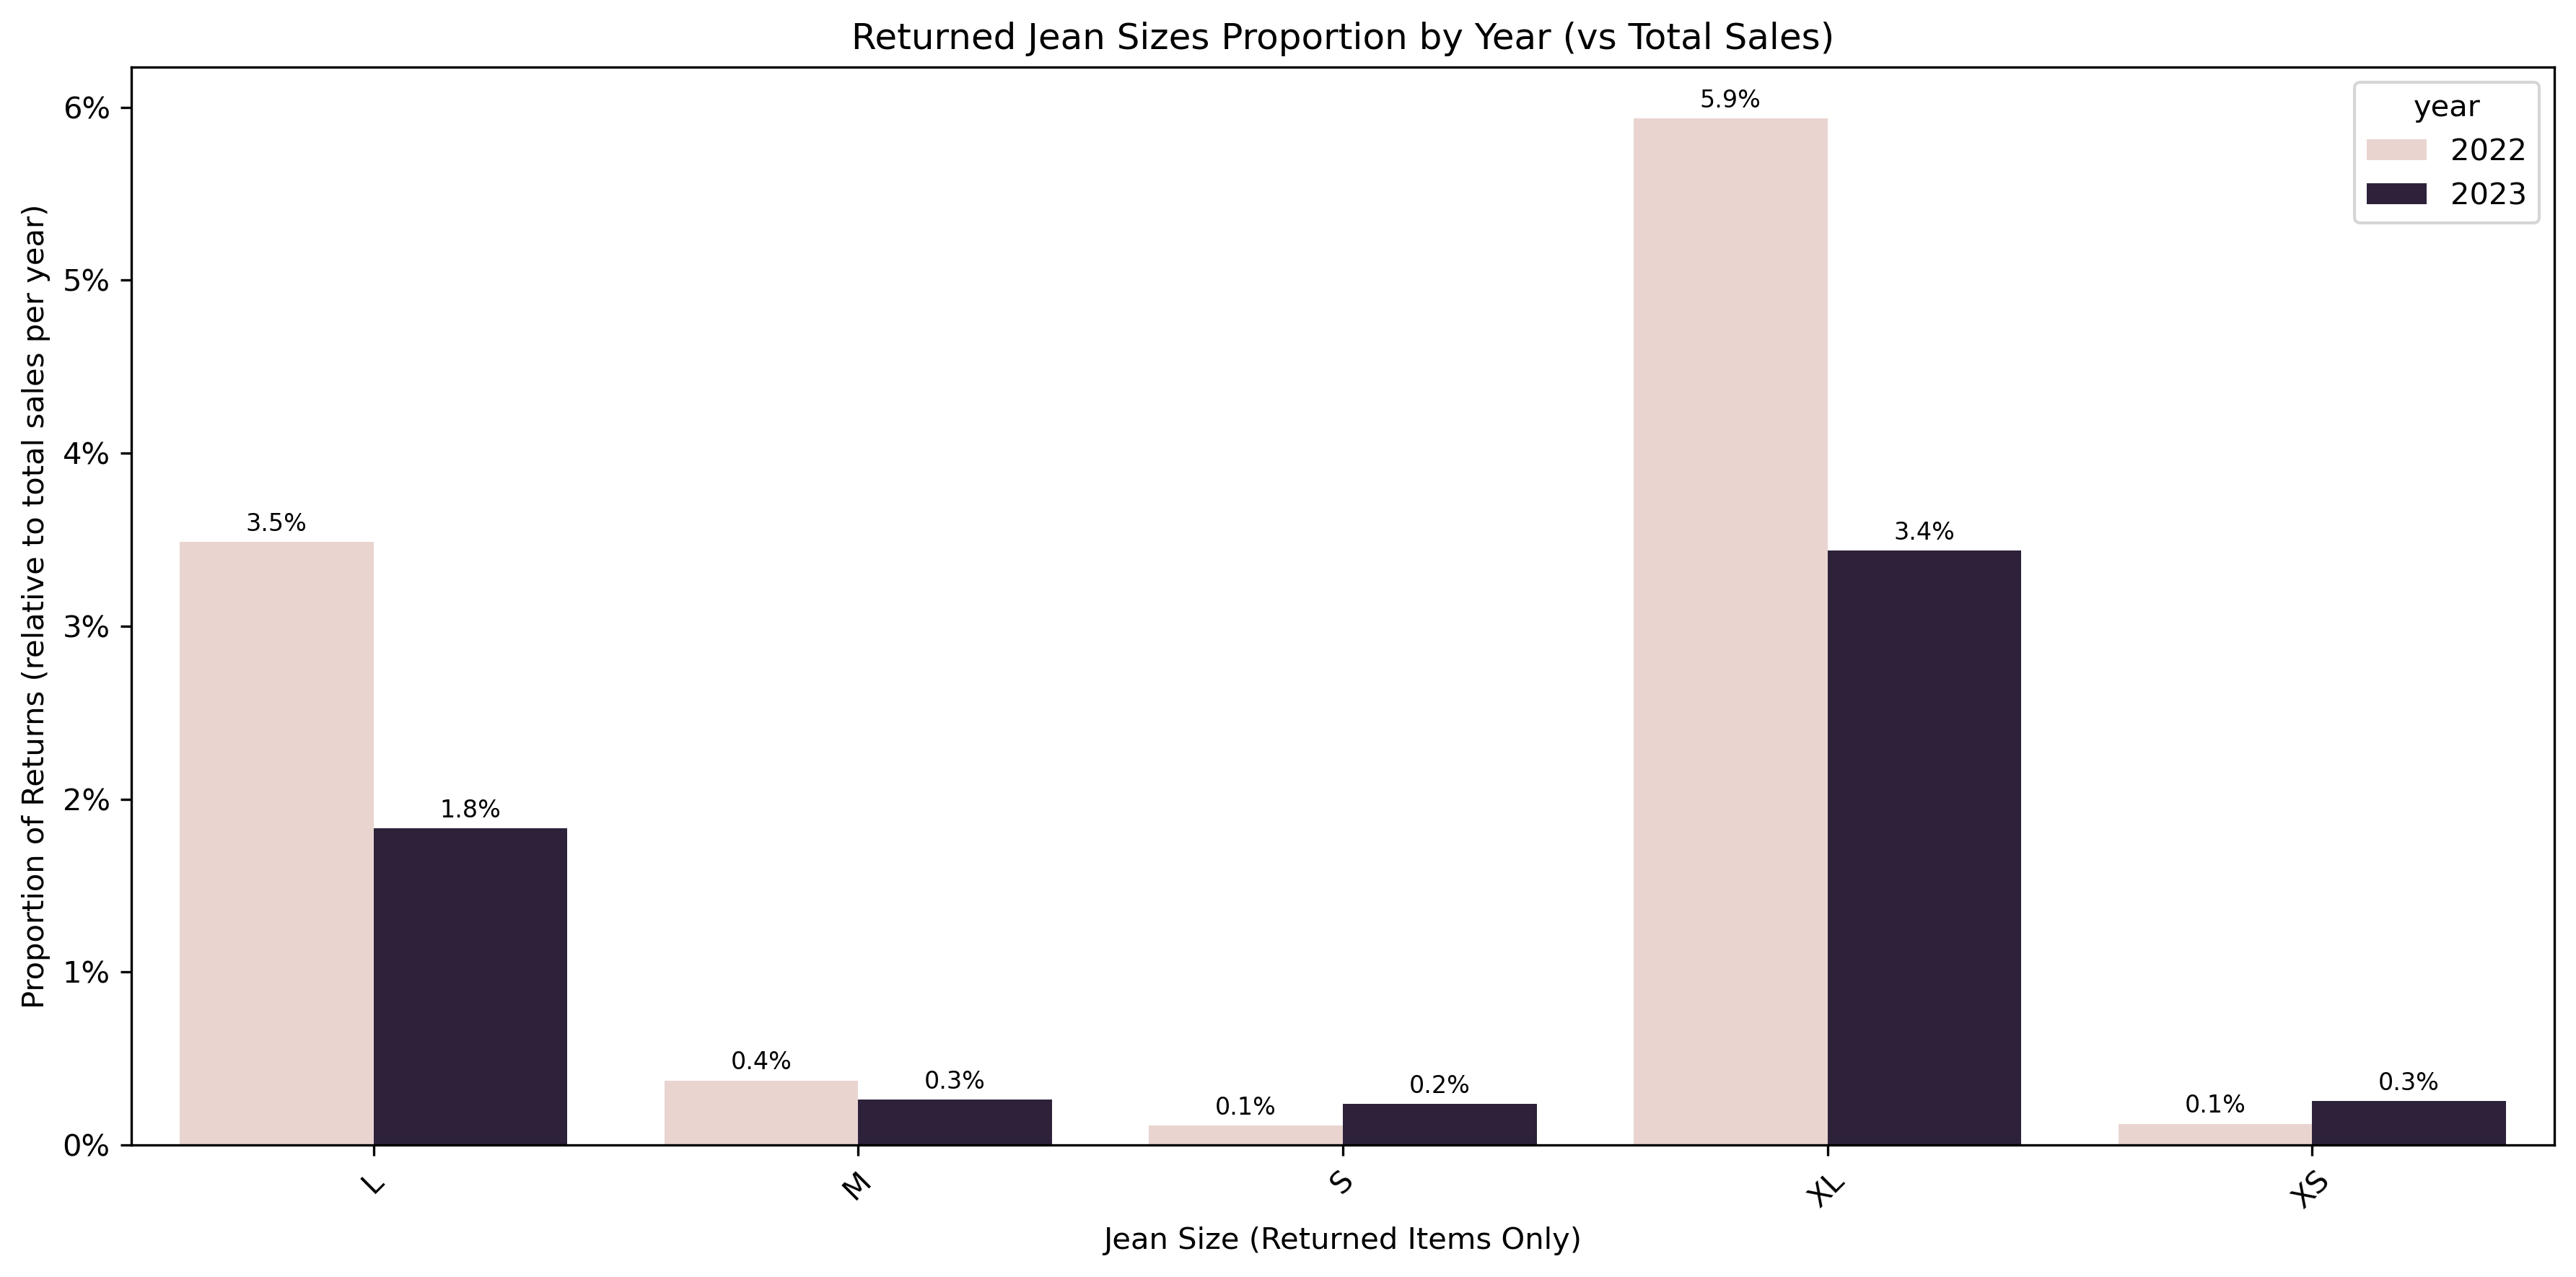

In [ ]:

total_sales = df.drop_duplicates('order_number').groupby('year').size().reset_index(name='total_sales')


returns_by_jean_size = df[
    (df['product_category'] == 'Jeans') & 
    (df['jean_sizes'].notna())
].groupby(['year', 'jean_sizes']).size().reset_index(name='return_count')


merged = returns_by_jean_size.merge(total_sales, on='year')
merged['return_proportion'] = merged['return_count'] / merged['total_sales']


plt.figure(figsize=(12, 6), dpi=300)
ax = sns.barplot(data=merged, x='jean_sizes', y='return_proportion', hue='year')


ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))


for container in ax.containers:
    ax.bar_label(container, labels=[f"{v:.1%}" for v in container.datavalues], fontsize=8, padding=2)

plt.xlabel('Jean Size (Returned Items Only)')
plt.ylabel('Proportion of Returns (relative to total sales per year)')
plt.title('Returned Jean Sizes Proportion by Year (vs Total Sales)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


([0, 1, 2], [Text(0, 0, 'Women'), Text(1, 0, 'Men'), Text(2, 0, 'Unknown')])

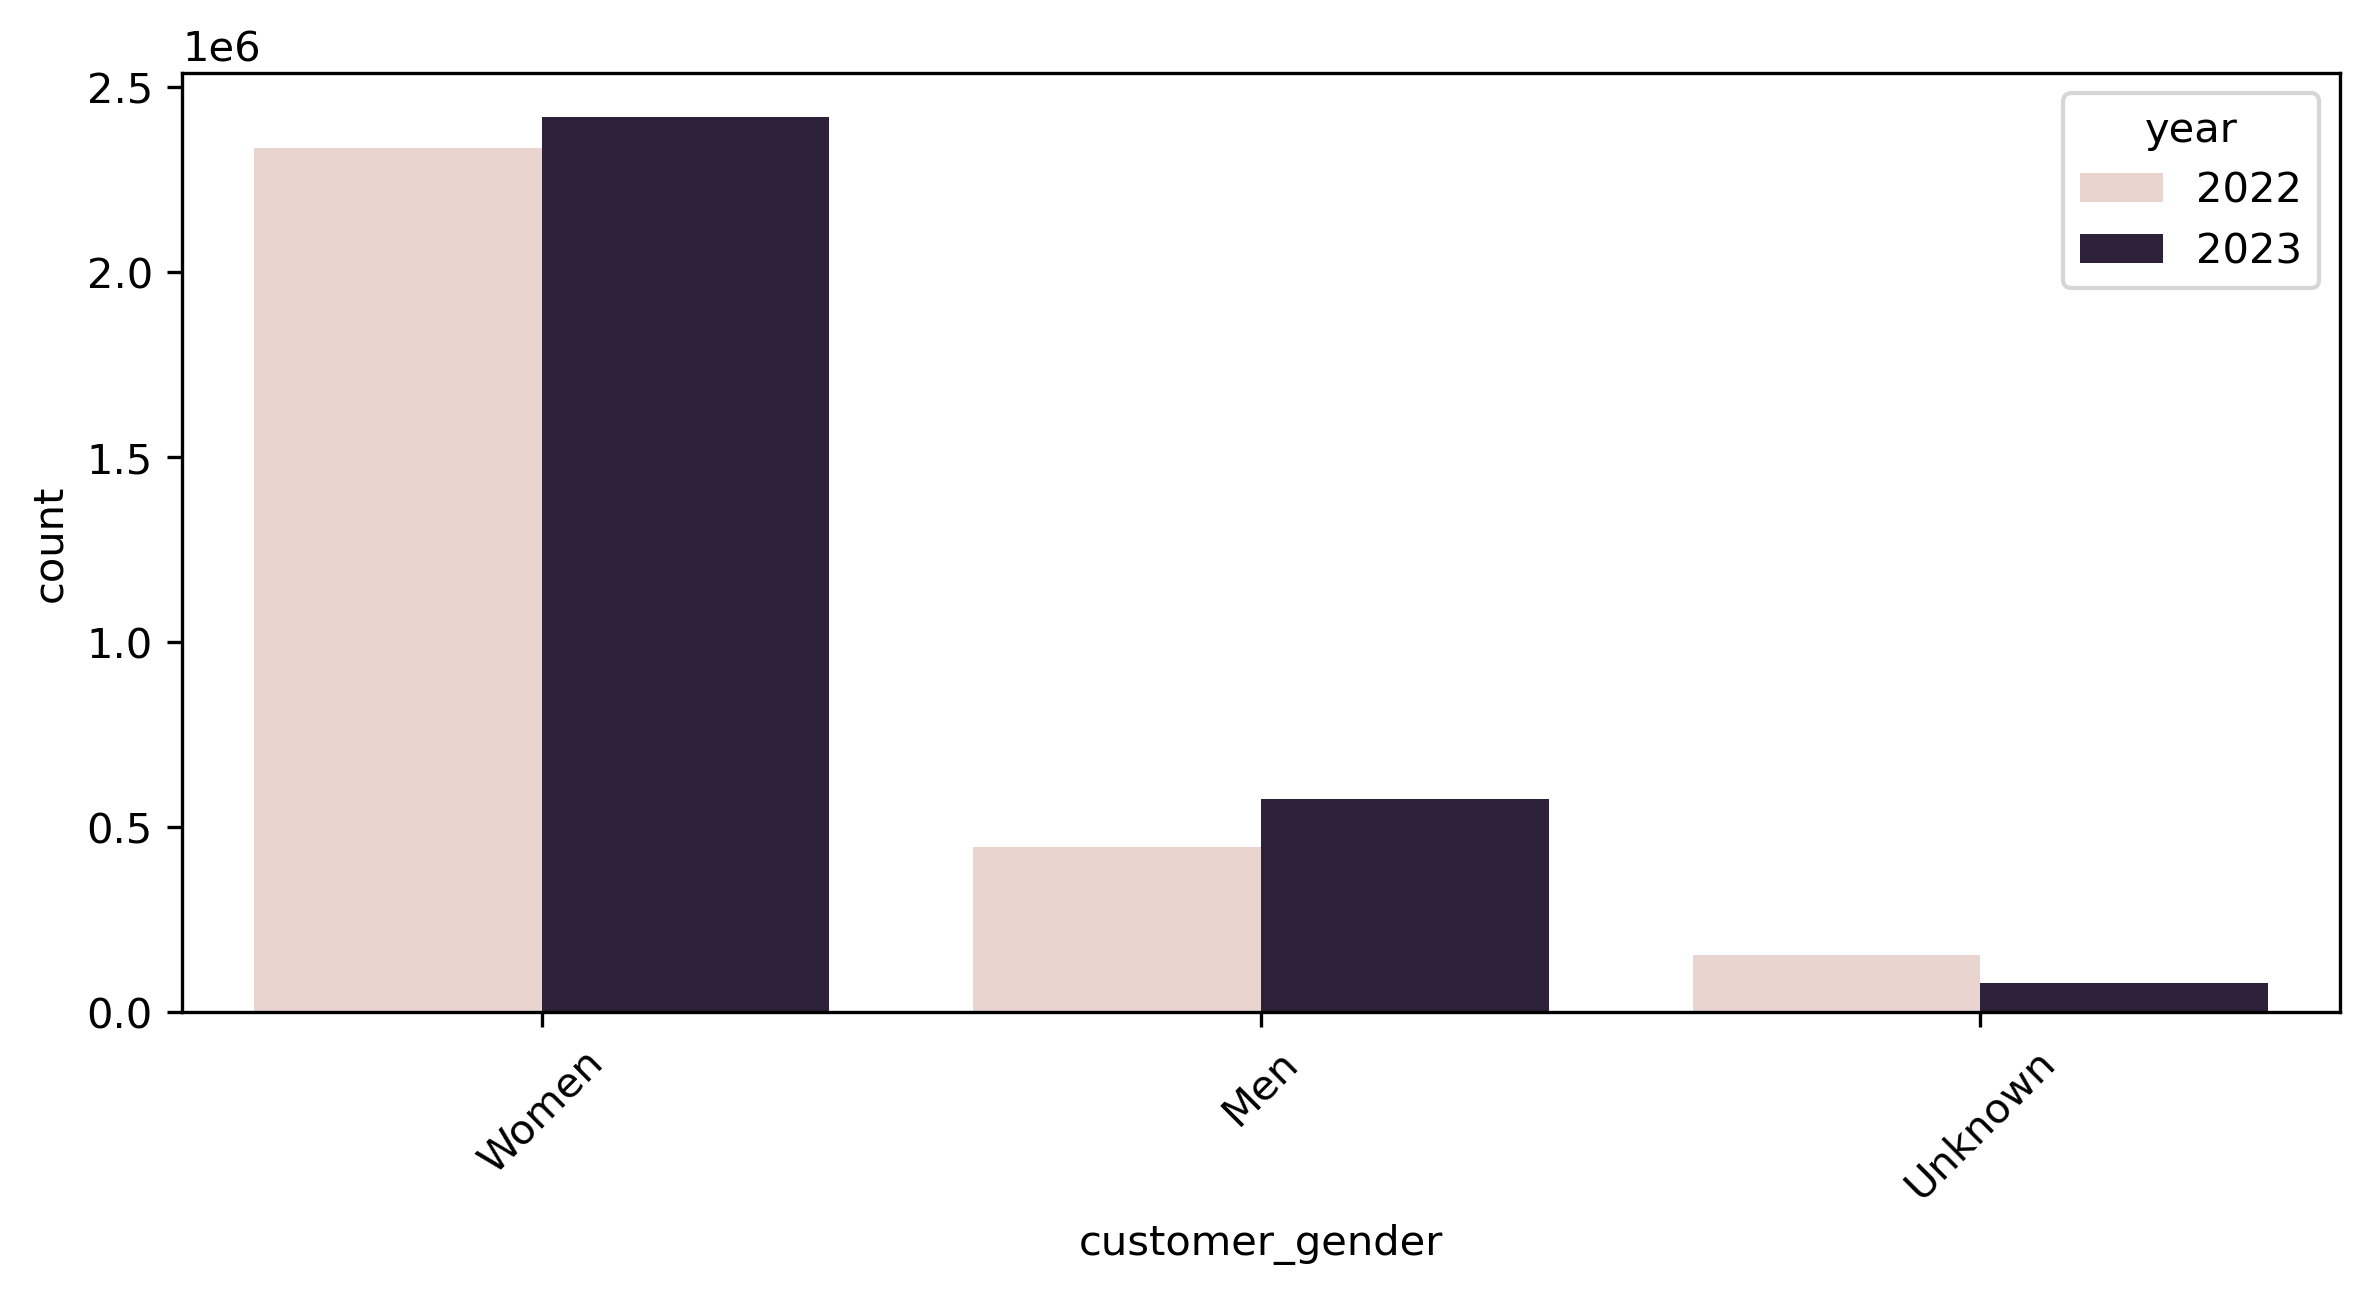

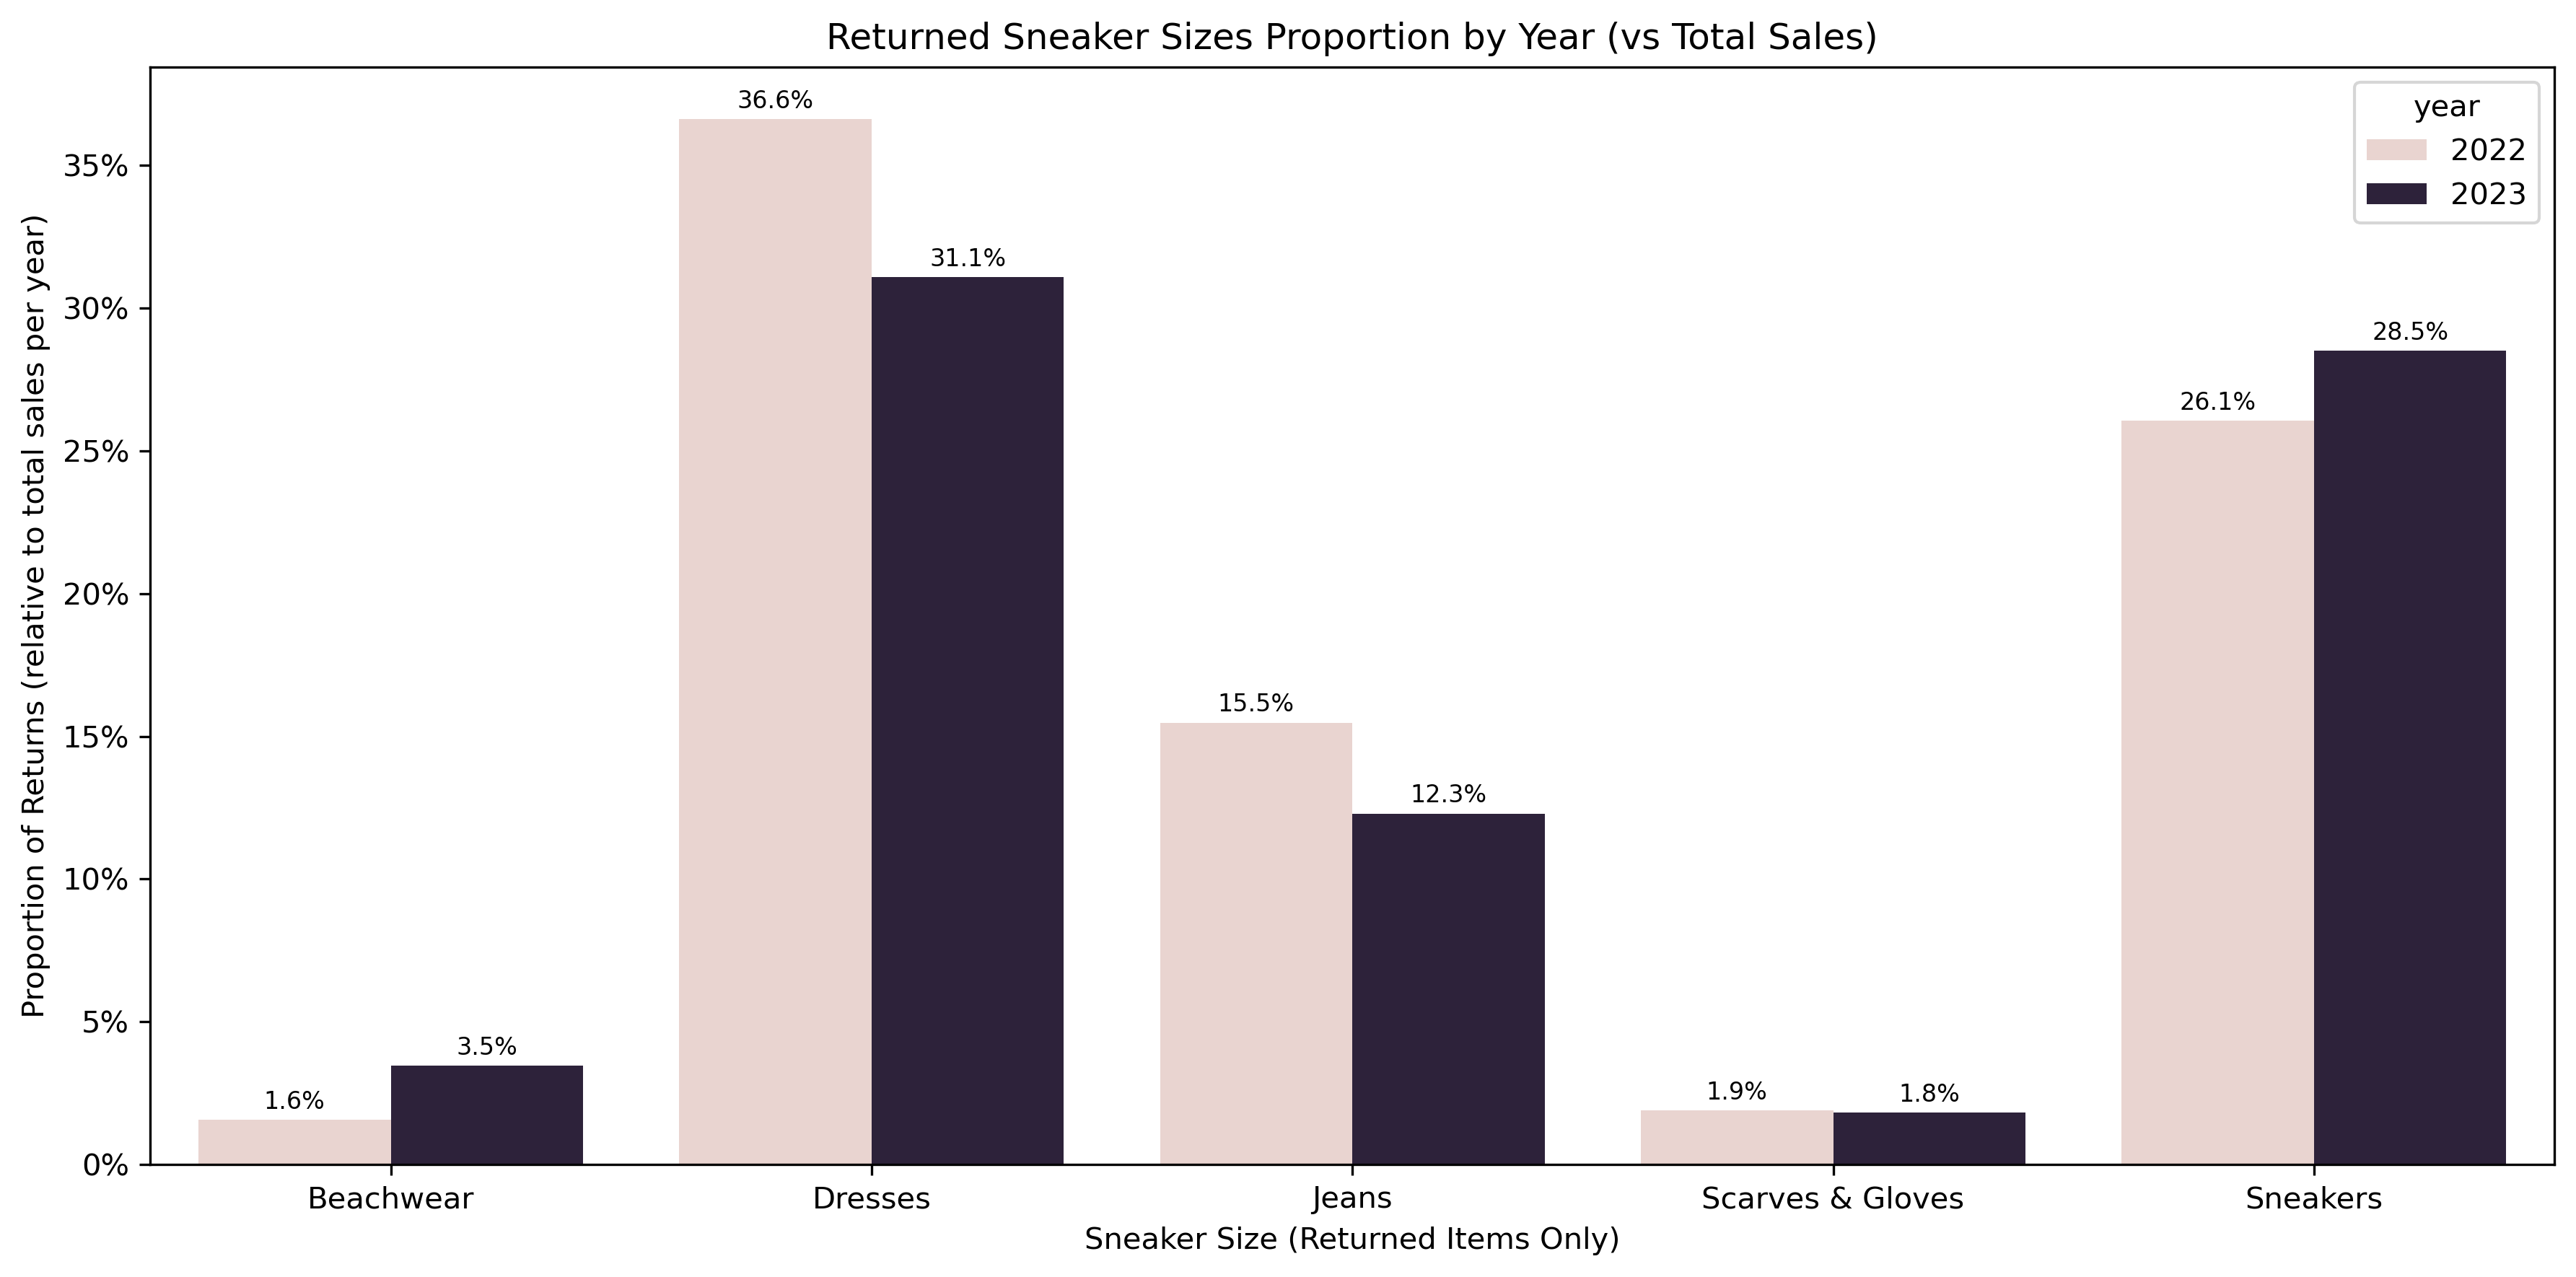

In [ ]:
total_sales = df.drop_duplicates('order_number').groupby('year').size().reset_index(name='total_sales')


returns_by_size = df[
    df['product_category'].notna()
].groupby(['year', 'product_category']).size().reset_index(name='return_count')

merged = returns_by_size.merge(total_sales, on='year')
merged['return_proportion'] = merged['return_count'] / merged['total_sales']


plt.figure(figsize=(12,6), dpi=300)
ax = sns.barplot(data=merged, x='product_category', y='return_proportion', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v:.1%}" for v in container.datavalues], fontsize=8, padding=2)

plt.xlabel('Sneaker Size (Returned Items Only)')
plt.ylabel('Proportion of Returns (relative to total sales per year)')
plt.title('Returned Sneaker Sizes Proportion by Year (vs Total Sales)')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'XL'),
  Text(1, 0, 'S'),
  Text(2, 0, 'M'),
  Text(3, 0, 'L'),
  Text(4, 0, 'XS')])

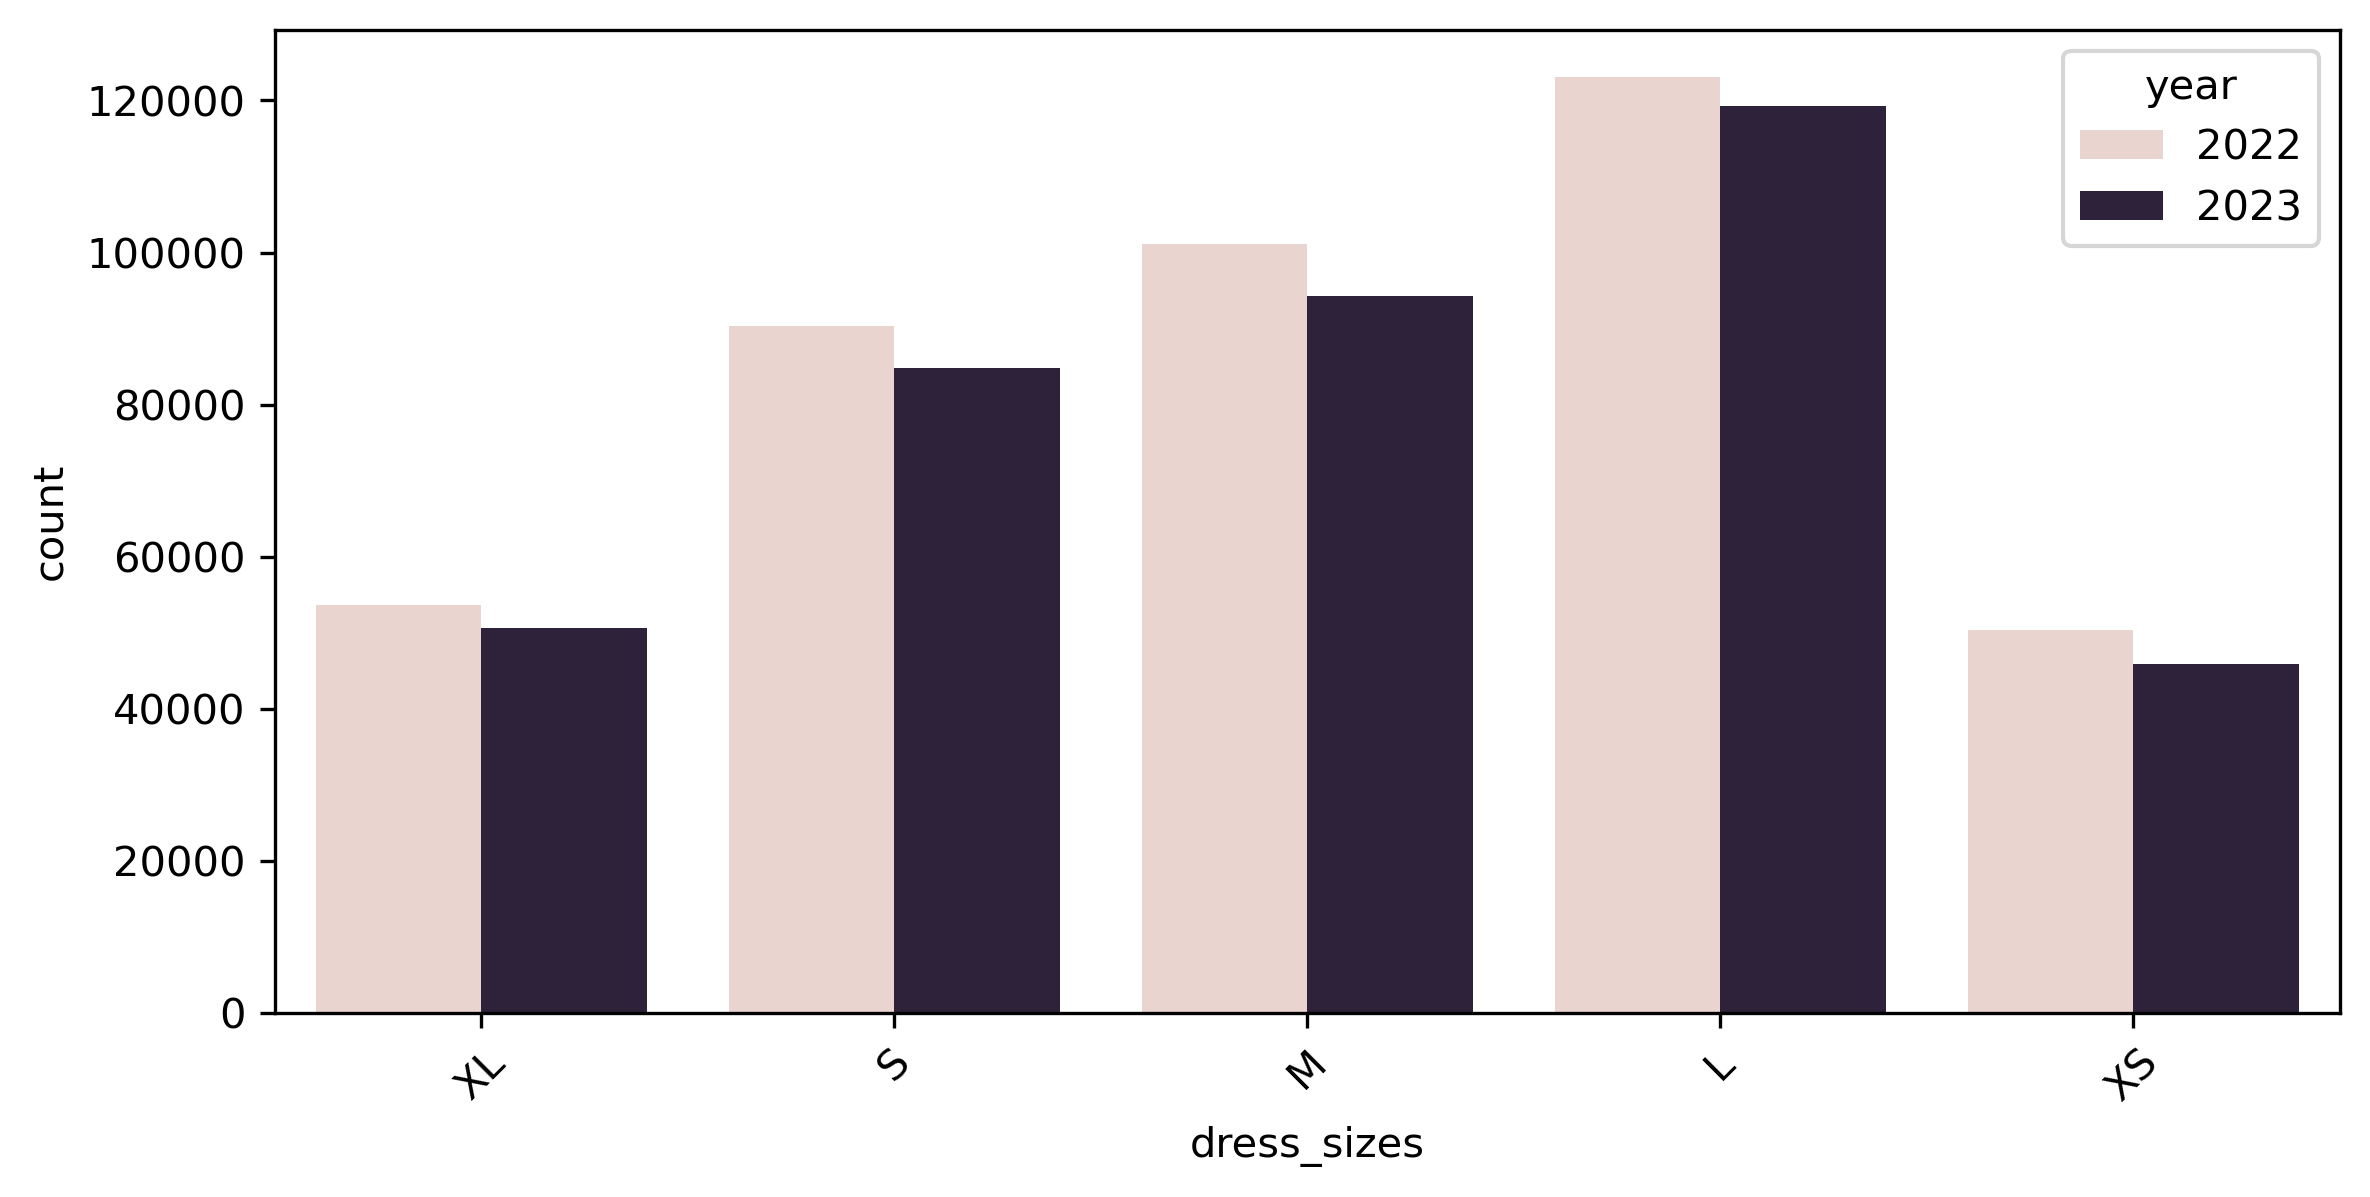

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='dress_sizes', hue='year')
plt.tight_layout()
plt.xticks(rotation=45)

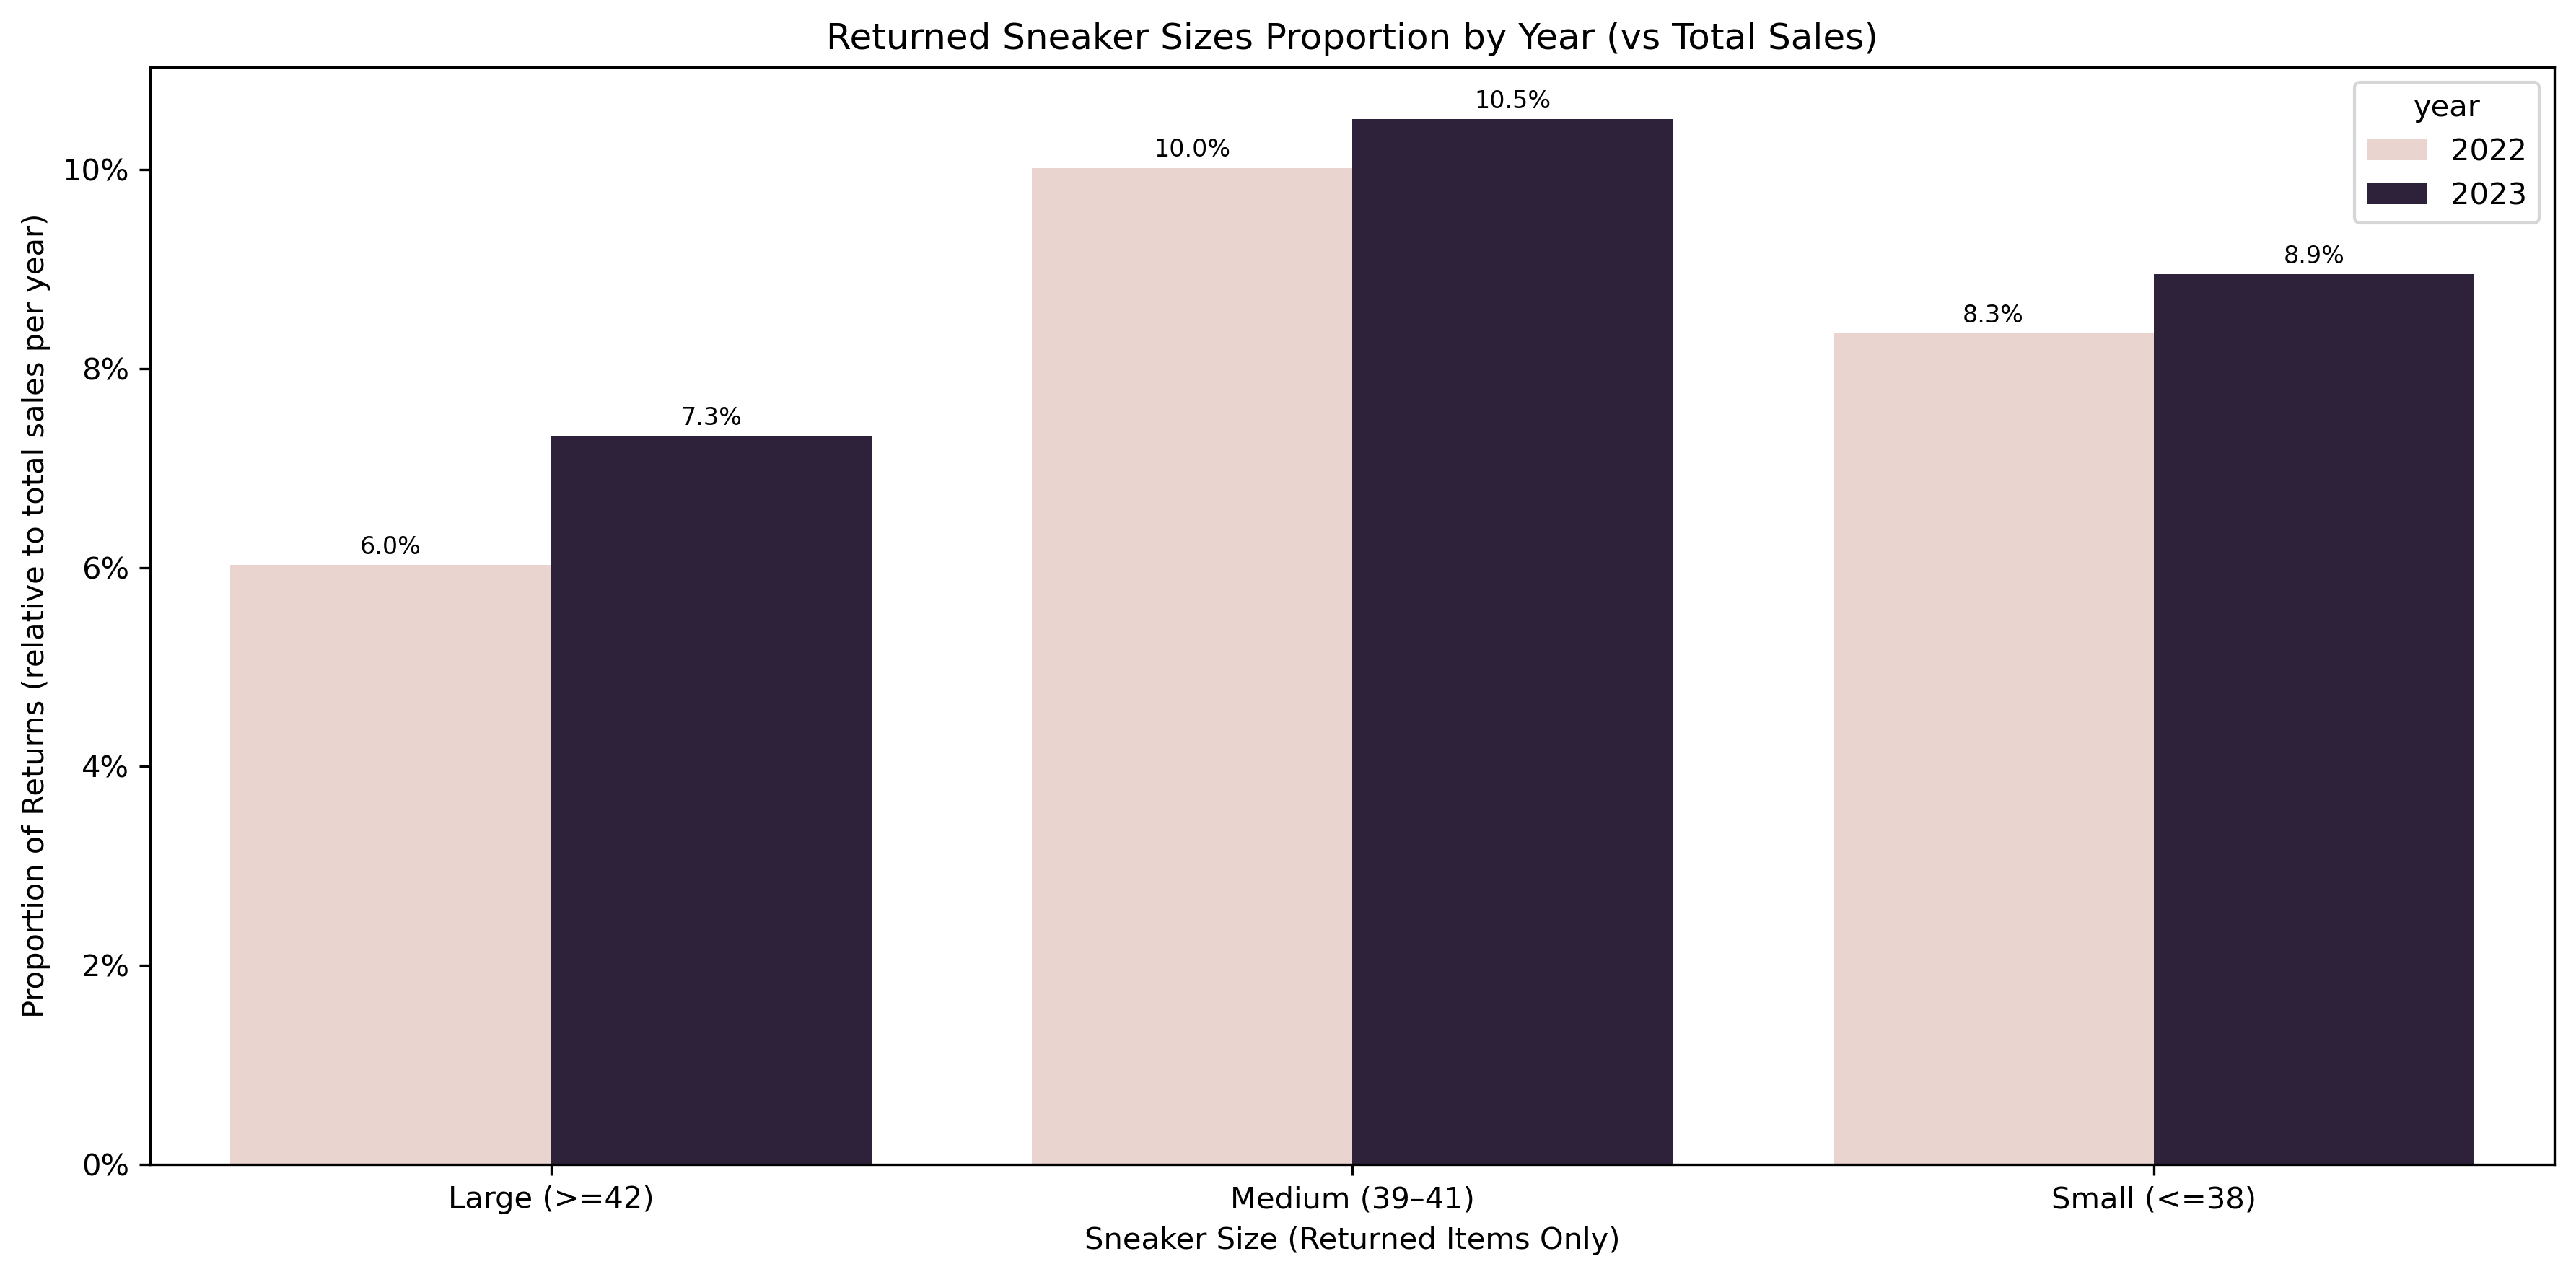

In [ ]:
total_sales = df.drop_duplicates('order_number').groupby('year').size().reset_index(name='total_sales')


returns_by_size = df[
    (df['product_category'] == 'Sneakers') &
    (df['sneaker_sizes'].notna())
].groupby(['year', 'sneaker_sizes']).size().reset_index(name='return_count')


merged = returns_by_size.merge(total_sales, on='year')
merged['return_proportion'] = merged['return_count'] / merged['total_sales']


plt.figure(figsize=(12,6), dpi=300)
ax = sns.barplot(data=merged, x='sneaker_sizes', y='return_proportion', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v:.1%}" for v in container.datavalues], fontsize=8, padding=2)

plt.xlabel('Sneaker Size (Returned Items Only)')
plt.ylabel('Proportion of Returns (relative to total sales per year)')
plt.title('Returned Sneaker Sizes Proportion by Year (vs Total Sales)')
plt.tight_layout()
plt.show()

In [ ]:
merged.head(6)

year   sneaker_sizes  return_count  total_sales  return_proportion
0  2022    Large (>=42)        126249      2094865           0.060266
1  2022  Medium (39–41)        209834      2094865           0.100166
2  2022    Small (<=38)        174916      2094865           0.083498
3  2023    Large (>=42)        166255      2271838           0.073181
4  2023  Medium (39–41)        238616      2271838           0.105032
5  2023    Small (<=38)        203266      2271838           0.089472

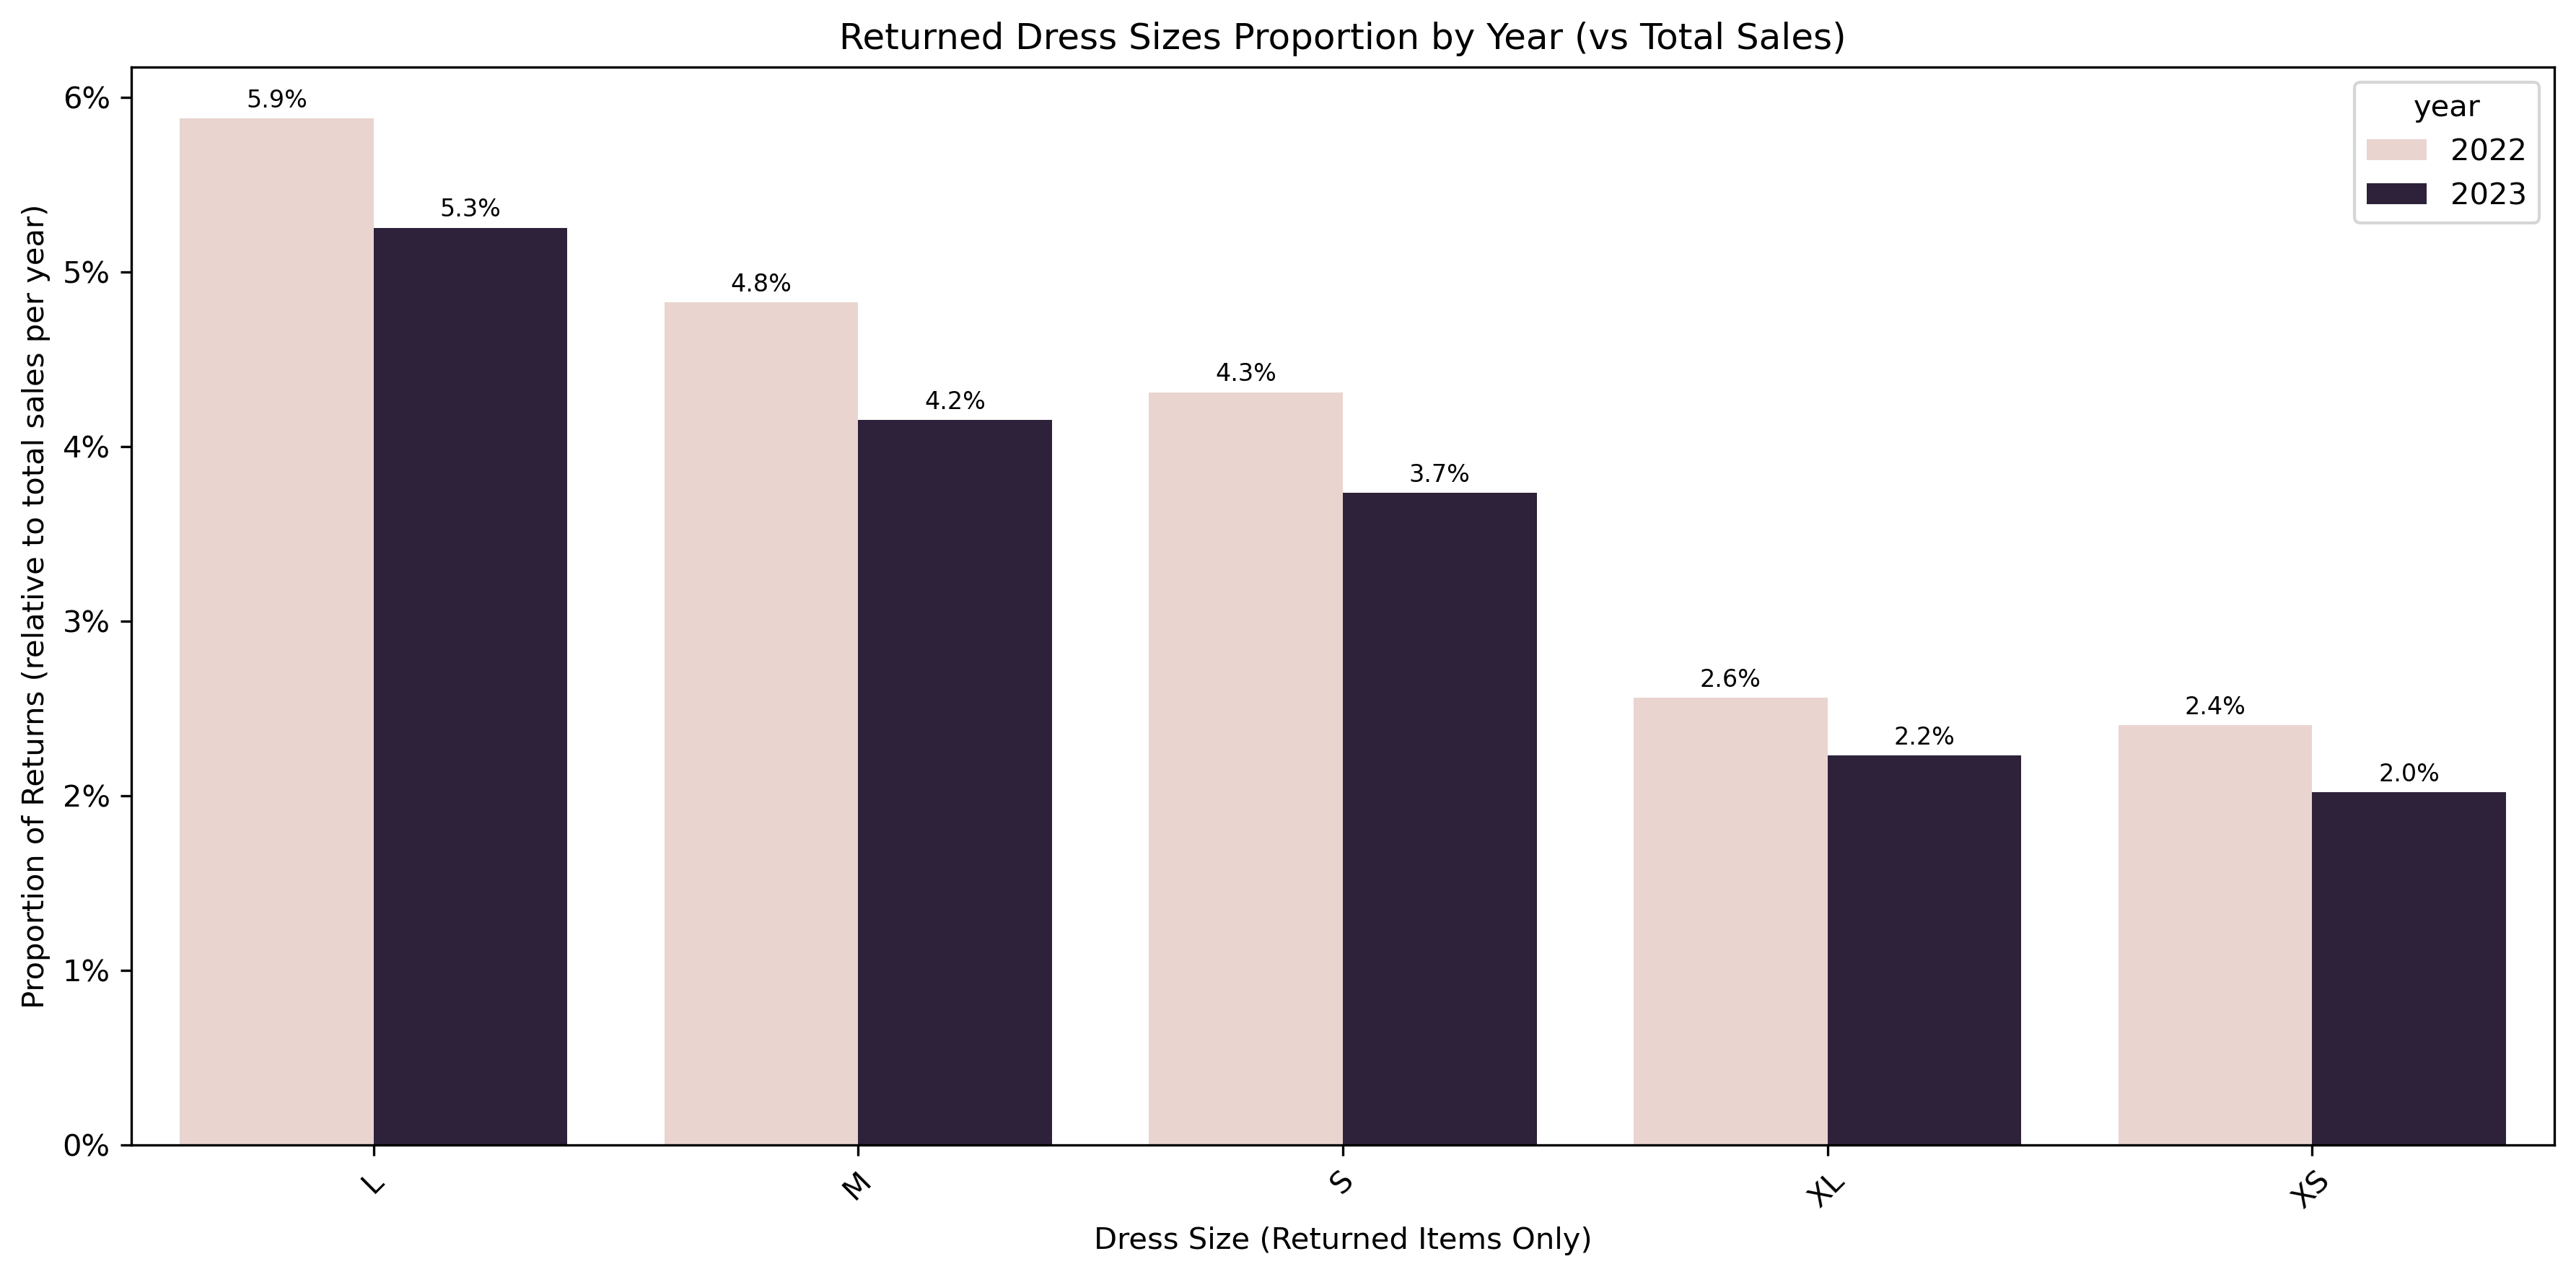

In [ ]:
total_sales = df.drop_duplicates('order_number').groupby('year').size().reset_index(name='total_sales')


returns_by_size = df[
    (df['product_category'] == 'Dresses') &
    (df['dress_sizes'].notna())
].groupby(['year', 'dress_sizes']).size().reset_index(name='return_count')

merged = returns_by_size.merge(total_sales, on='year')
merged['return_proportion'] = merged['return_count'] / merged['total_sales']


plt.figure(figsize=(12,6), dpi=300)
ax = sns.barplot(data=merged, x='dress_sizes', y='return_proportion', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v:.1%}" for v in container.datavalues], fontsize=8, padding=2)

plt.xlabel('Dress Size (Returned Items Only)')
plt.ylabel('Proportion of Returns (relative to total sales per year)')
plt.title('Returned Dress Sizes Proportion by Year (vs Total Sales)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


year jean_sizes  return_count  total_sales  return_proportion
0  2022          L         73018      2094865           0.034856
1  2022          M          7798      2094865           0.003722
2  2022          S          2361      2094865           0.001127
3  2022         XL        124346      2094865           0.059358
4  2022         XS          2573      2094865           0.001228
5  2023          L         41582      2271838           0.018303
6  2023          M          5971      2271838           0.002628
7  2023          S          5398      2271838           0.002376
8  2023         XL         78064      2271838           0.034362
9  2023         XS          5753      2271838           0.002532

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Tier 3: 50–100'),
  Text(1, 0, 'Tier 2: 25–50'),
  Text(2, 0, 'Tier 1: 0–25'),
  Text(3, 0, 'Tier 4: 100–150'),
  Text(4, 0, 'Tier 5: 150+')])

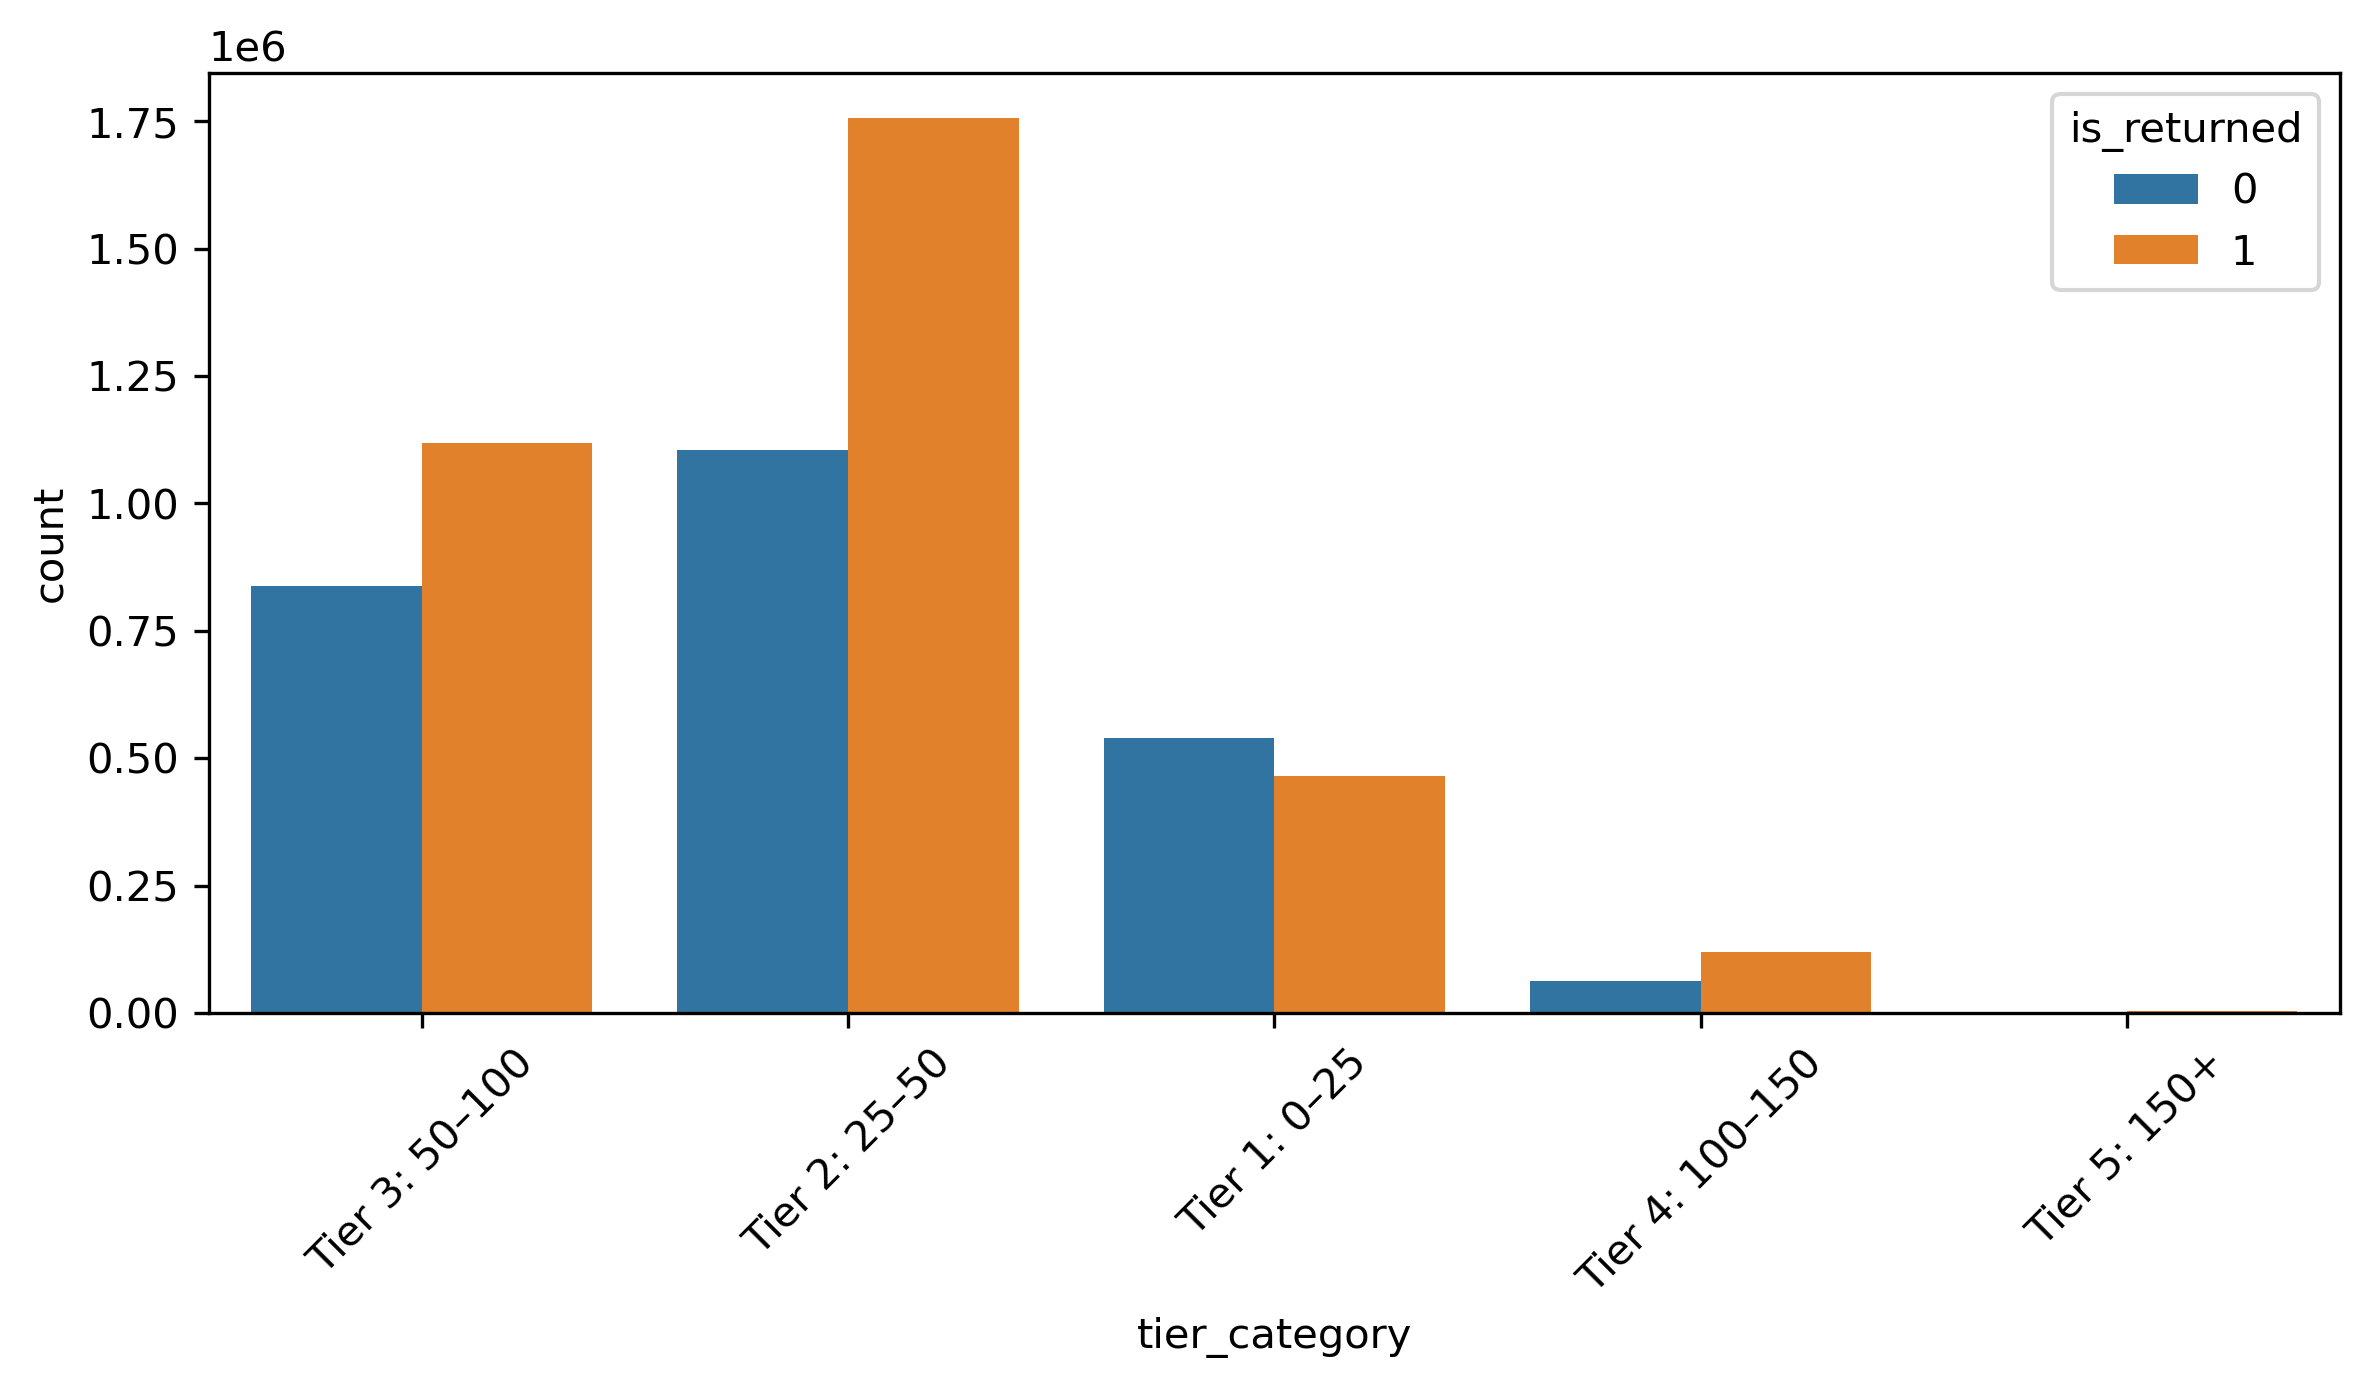

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='tier_category', hue='is_returned')
plt.tight_layout()
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Tier 3: 50–100'),
  Text(1, 0, 'Tier 2: 25–50'),
  Text(2, 0, 'Tier 1: 0–25'),
  Text(3, 0, 'Tier 4: 100–150'),
  Text(4, 0, 'Tier 5: 150+')])

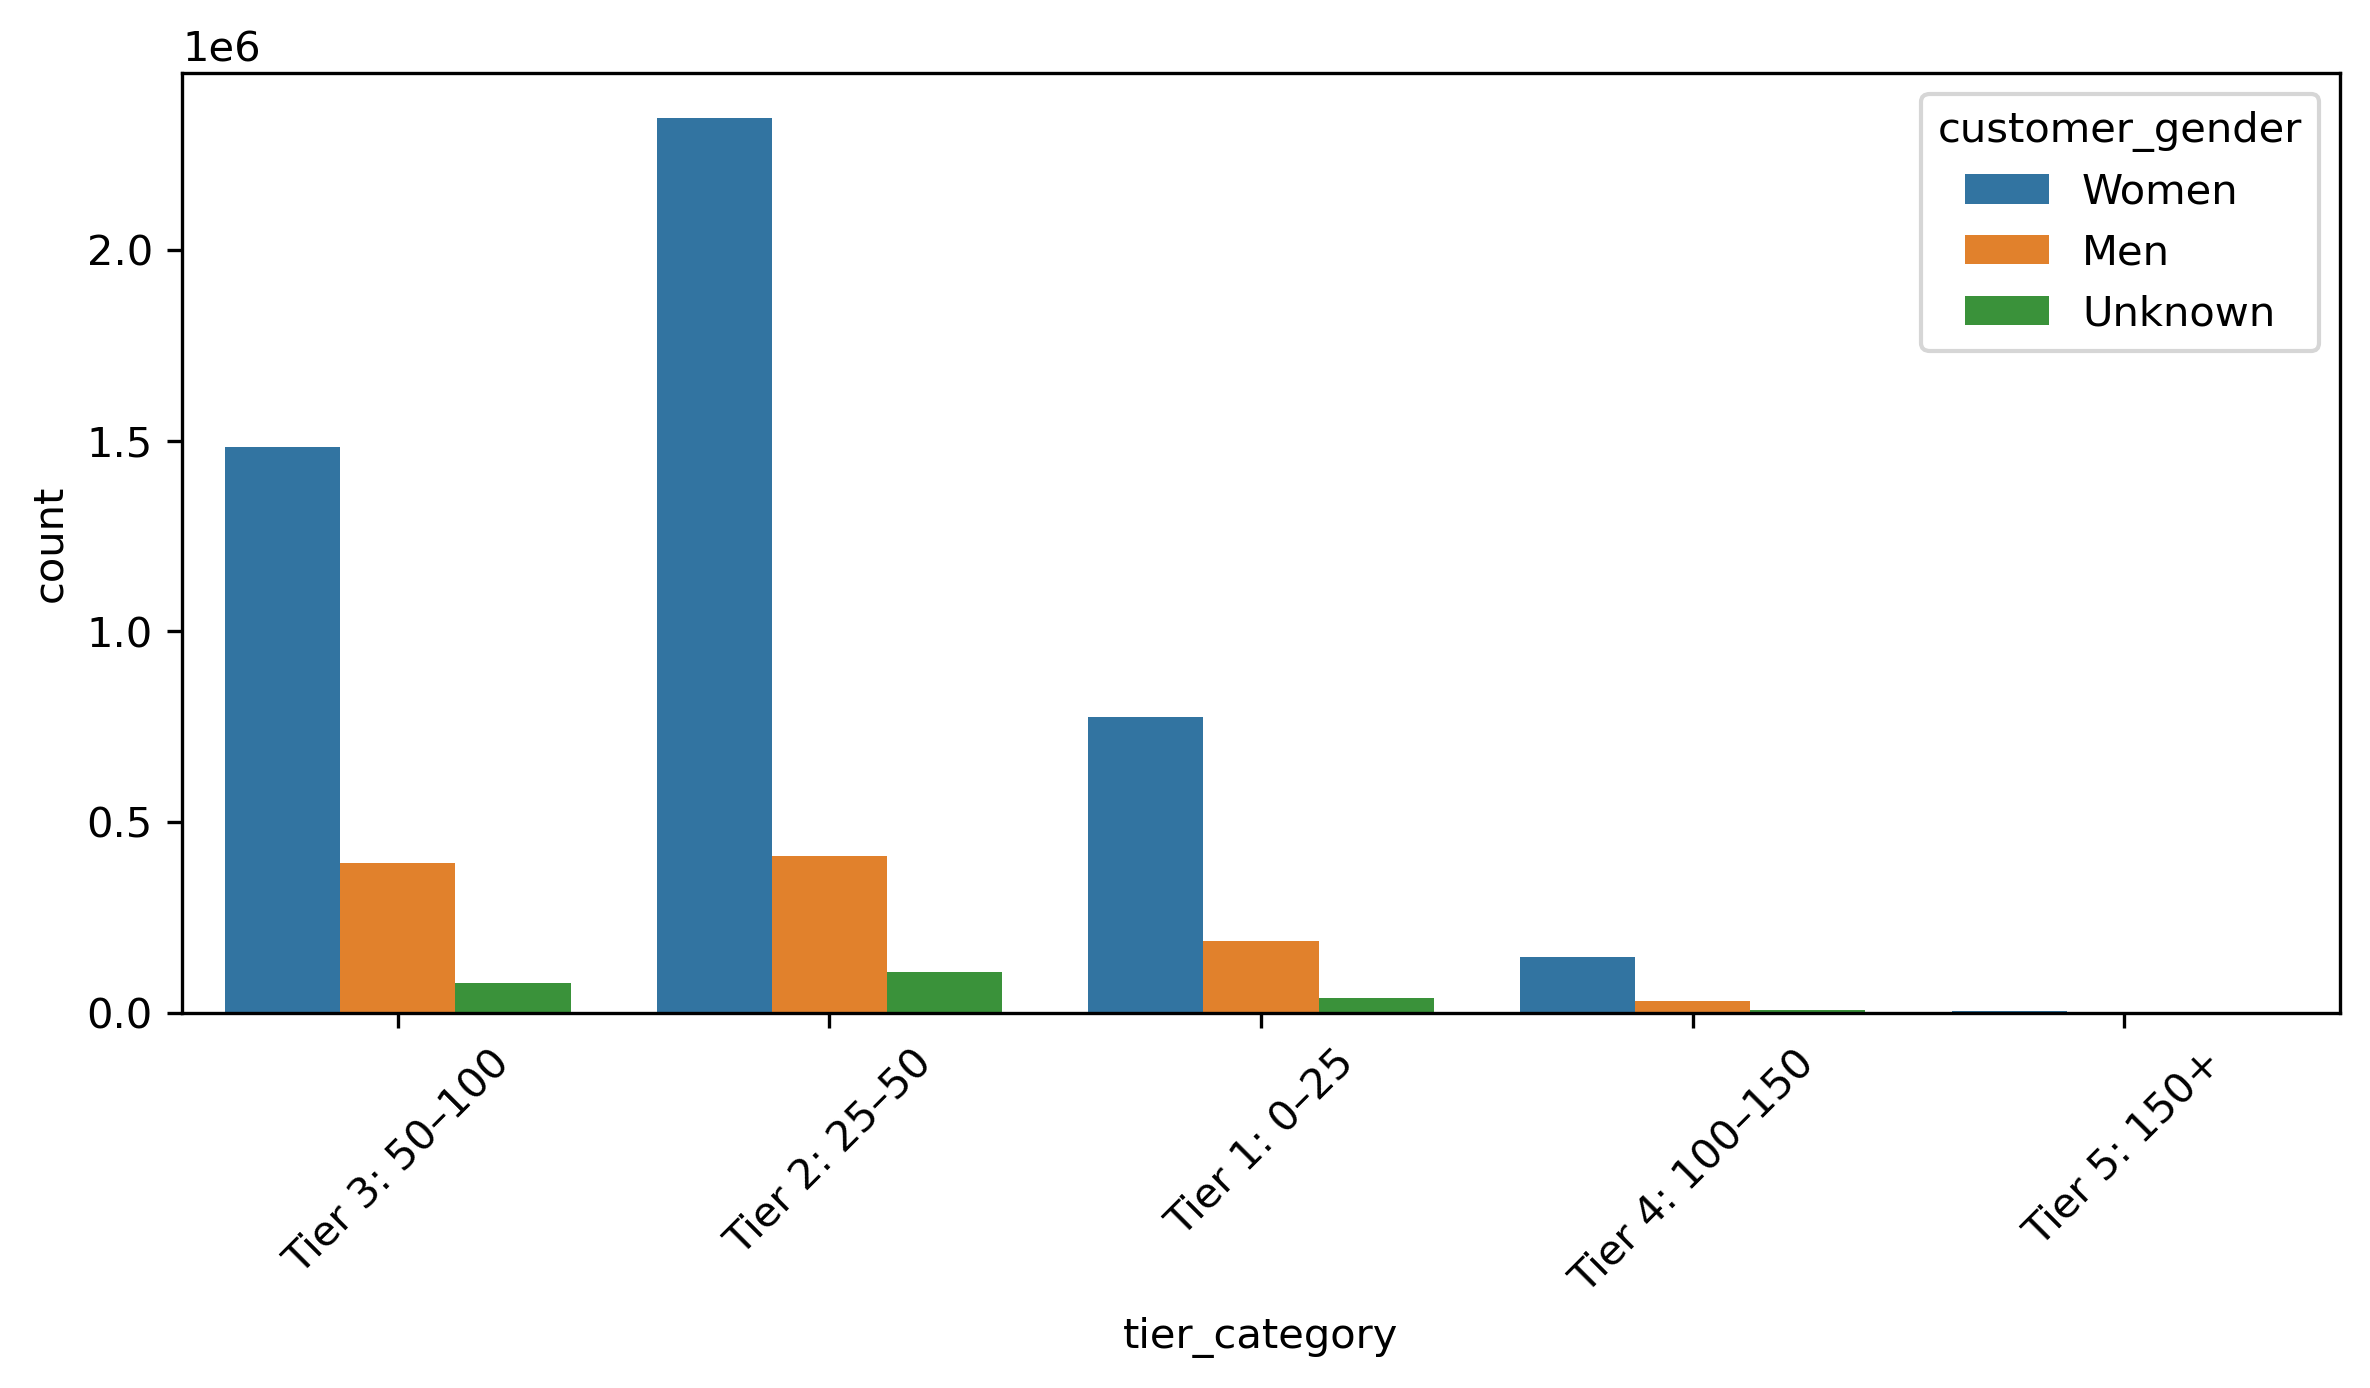

In [ ]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(data=df, x='tier_category', hue='customer_gender')
plt.tight_layout()
plt.xticks(rotation=45)

In [ ]:
returned_df = df[df['is_returned'] == 1]

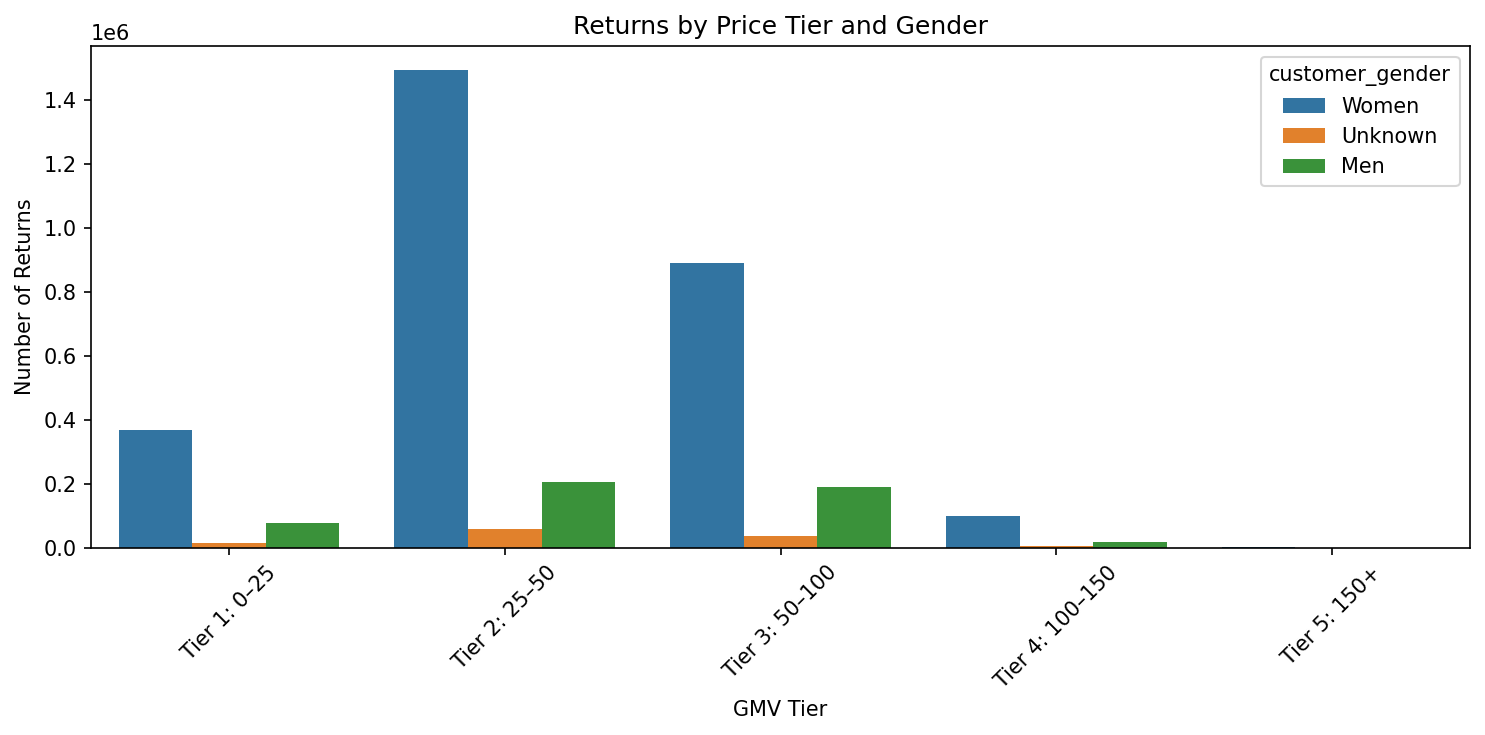

In [ ]:
plt.figure(figsize=(10, 5), dpi=150)
sns.countplot(data=returned_df, x='tier_category', hue='customer_gender', order=[
    'Tier 1: 0–25',
    'Tier 2: 25–50',
    'Tier 3: 50–100',
    'Tier 4: 100–150',
    'Tier 5: 150+'
])
plt.title('Returns by Price Tier and Gender')
plt.xlabel('GMV Tier')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

returns = df[df['is_returned'] == 1]['gmv_before_return']
no_returns = df[df['is_returned'] == 0]['gmv_before_return']

t_stat, p_val = ttest_ind(returns.dropna(), no_returns.dropna(), equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 154.83328357167585, p-value: 0.0


In [42]:
returns_by_size = df[
    df['product_category'].notna()
].groupby(['year', 'tier_category']).size().reset_index(name='return_count')

merged = returns_by_size.merge(total_sales, on='year')
merged['return_proportion'] = merged['return_count'] / merged['total_sales']


plt.figure(figsize=(12,6), dpi=300)
ax = sns.barplot(data=merged, x='tier_category', y='return_proportion', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container, labels=[f"{v:.1%}" for v in container.datavalues], fontsize=8, padding=2)

plt.figure(figsize=(8,5), dpi=300)
sns.barplot(data=merged, x='tier_category', y='return_rate', hue='year')
plt.title('Return Rate by Price Tier')
plt.ylabel('Return Rate')
plt.xlabel('Price Tier')
plt.tight_layout()
plt.show()

NameError: name 'total_sales' is not defined

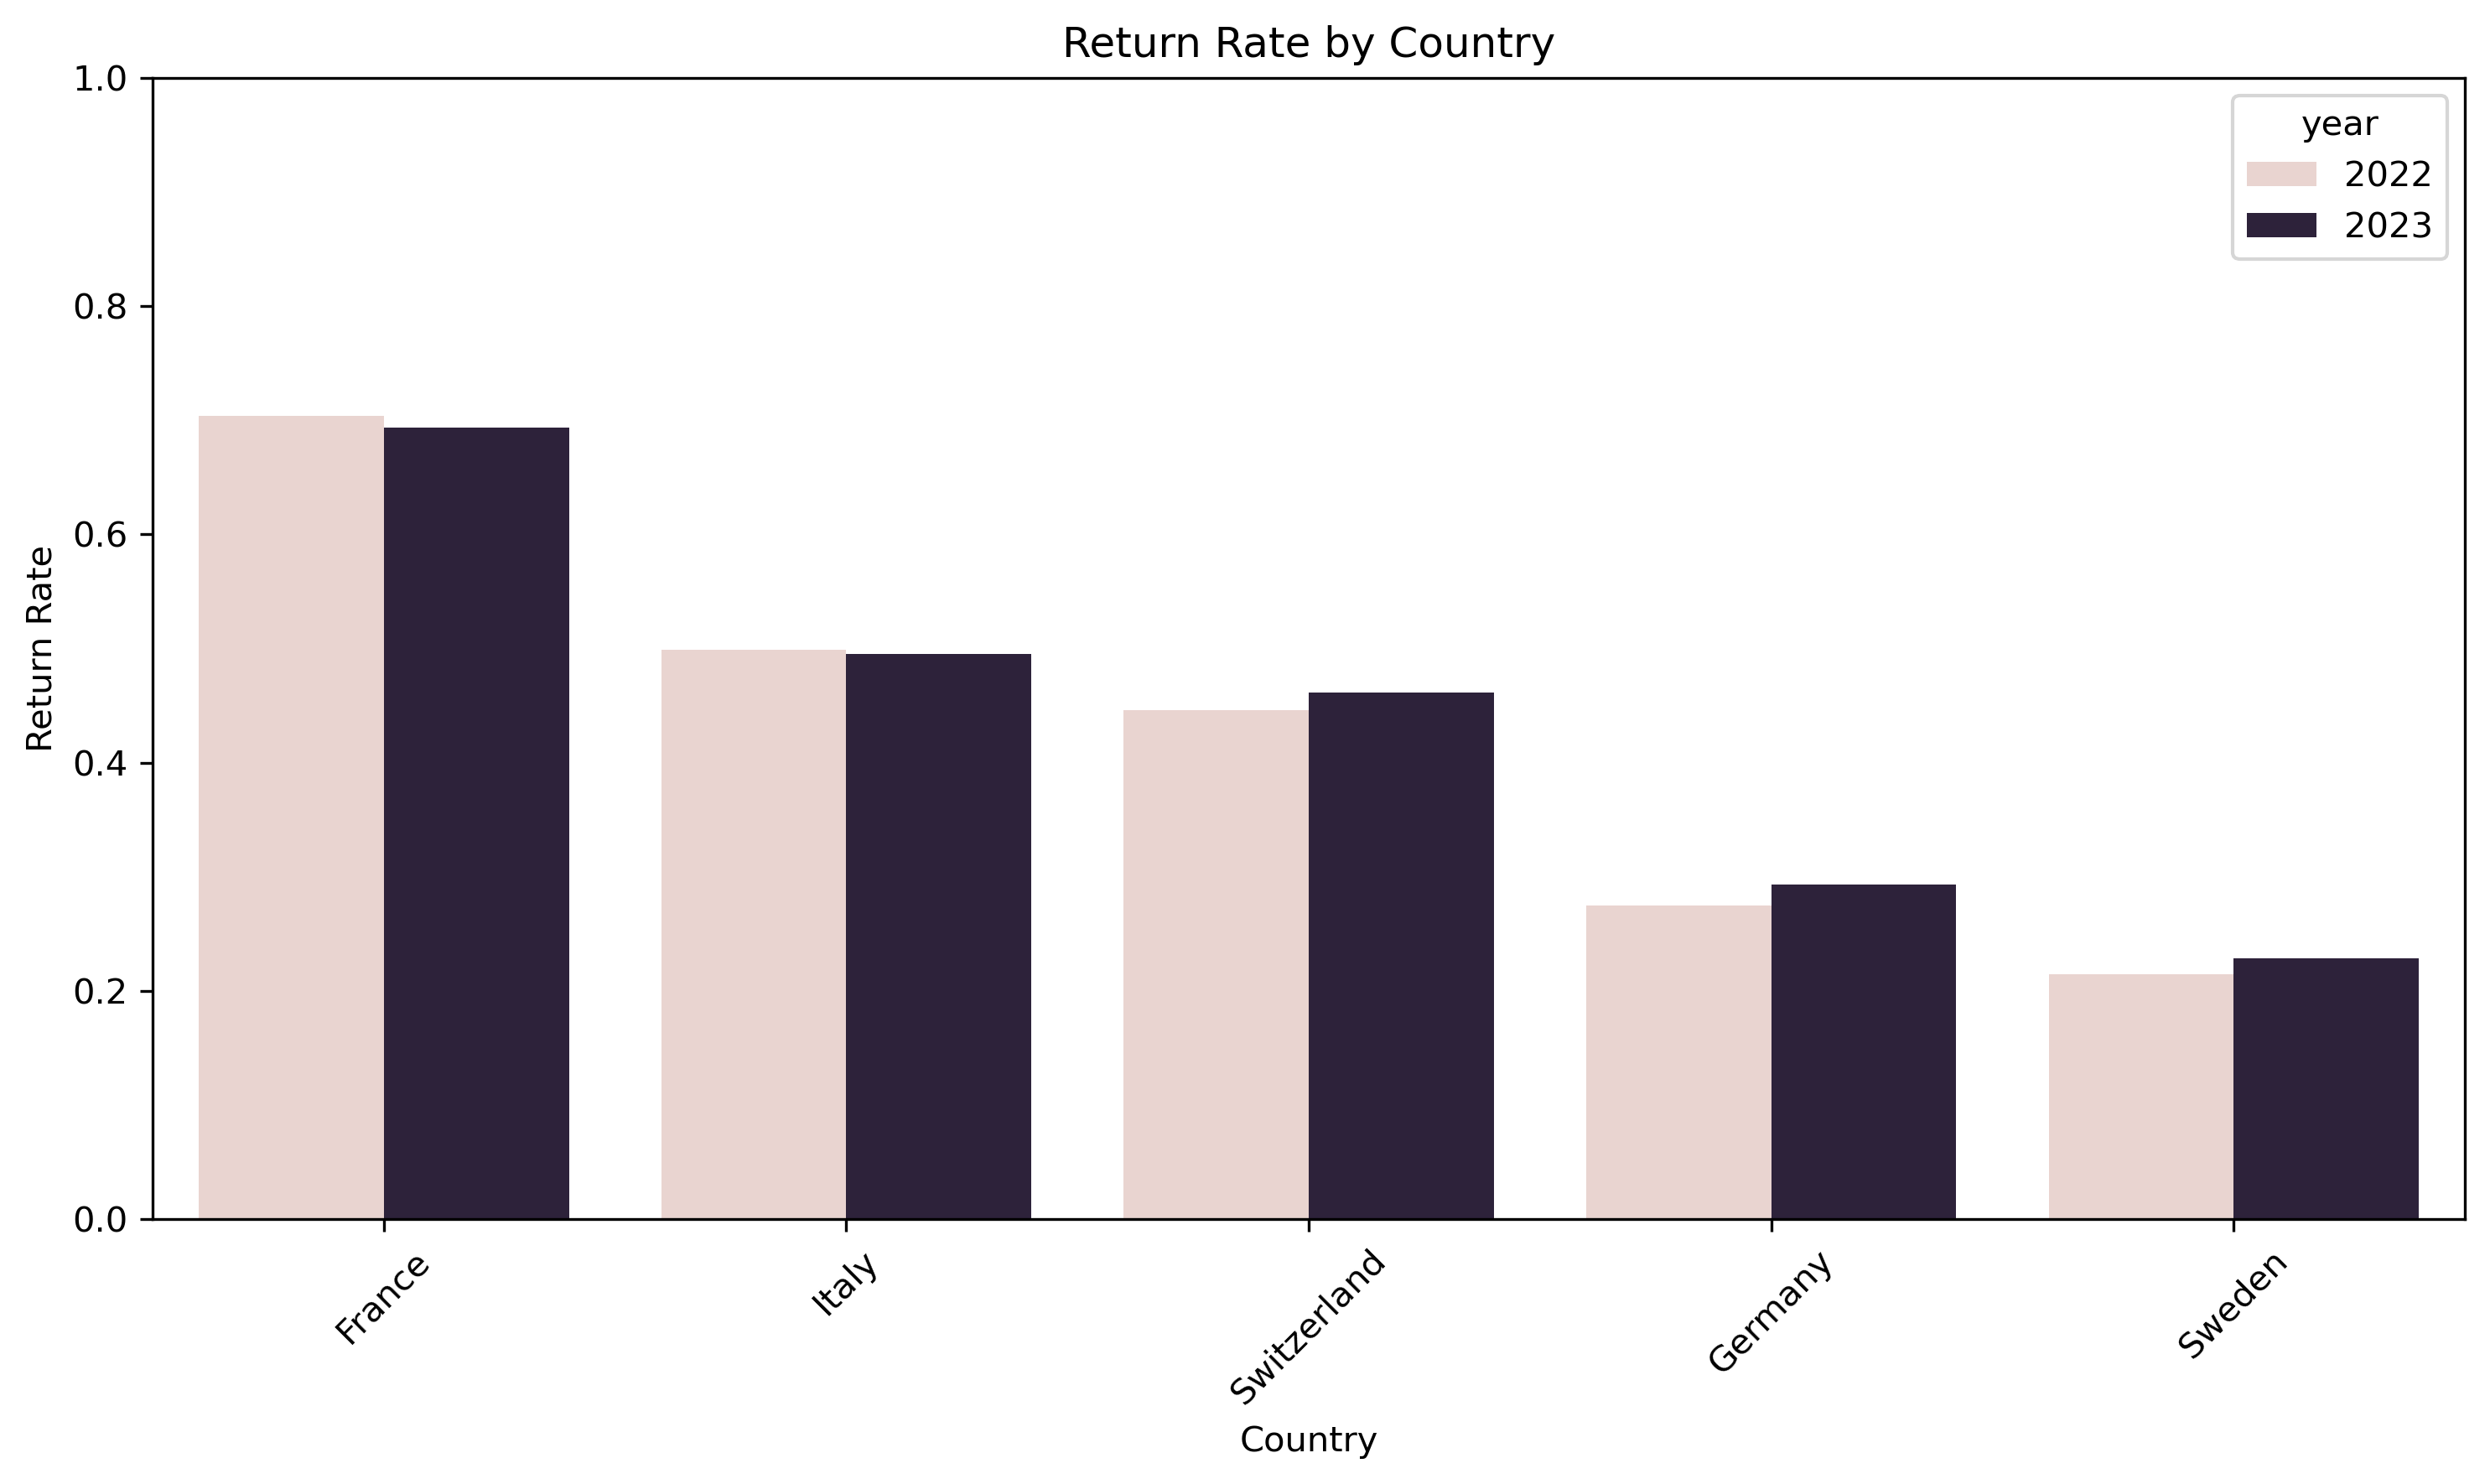

In [ ]:
country_returns = df.groupby(['year', 'country'])['is_returned'].agg(['mean', 'count']).reset_index()
country_returns.rename(columns={'mean': 'return_rate'}, inplace=True)

plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(data=country_returns.sort_values('return_rate', ascending=False), x='country', y='return_rate', hue='year')
plt.title('Return Rate by Country')
plt.ylabel('Return Rate')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
print(country_returns)

   year      country  return_rate    count
0  2022       France     0.704101  2021103
1  2022      Germany     0.275008   297915
2  2022        Italy     0.499171   139856
3  2022       Sweden     0.214751   335589
4  2022  Switzerland     0.445843   140664
5  2023       France     0.693327  2012451
6  2023      Germany     0.293419   345840
7  2023        Italy     0.495404   171109
8  2023       Sweden     0.228718   343511
9  2023  Switzerland     0.461375   202098


/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_26415/3695738554.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


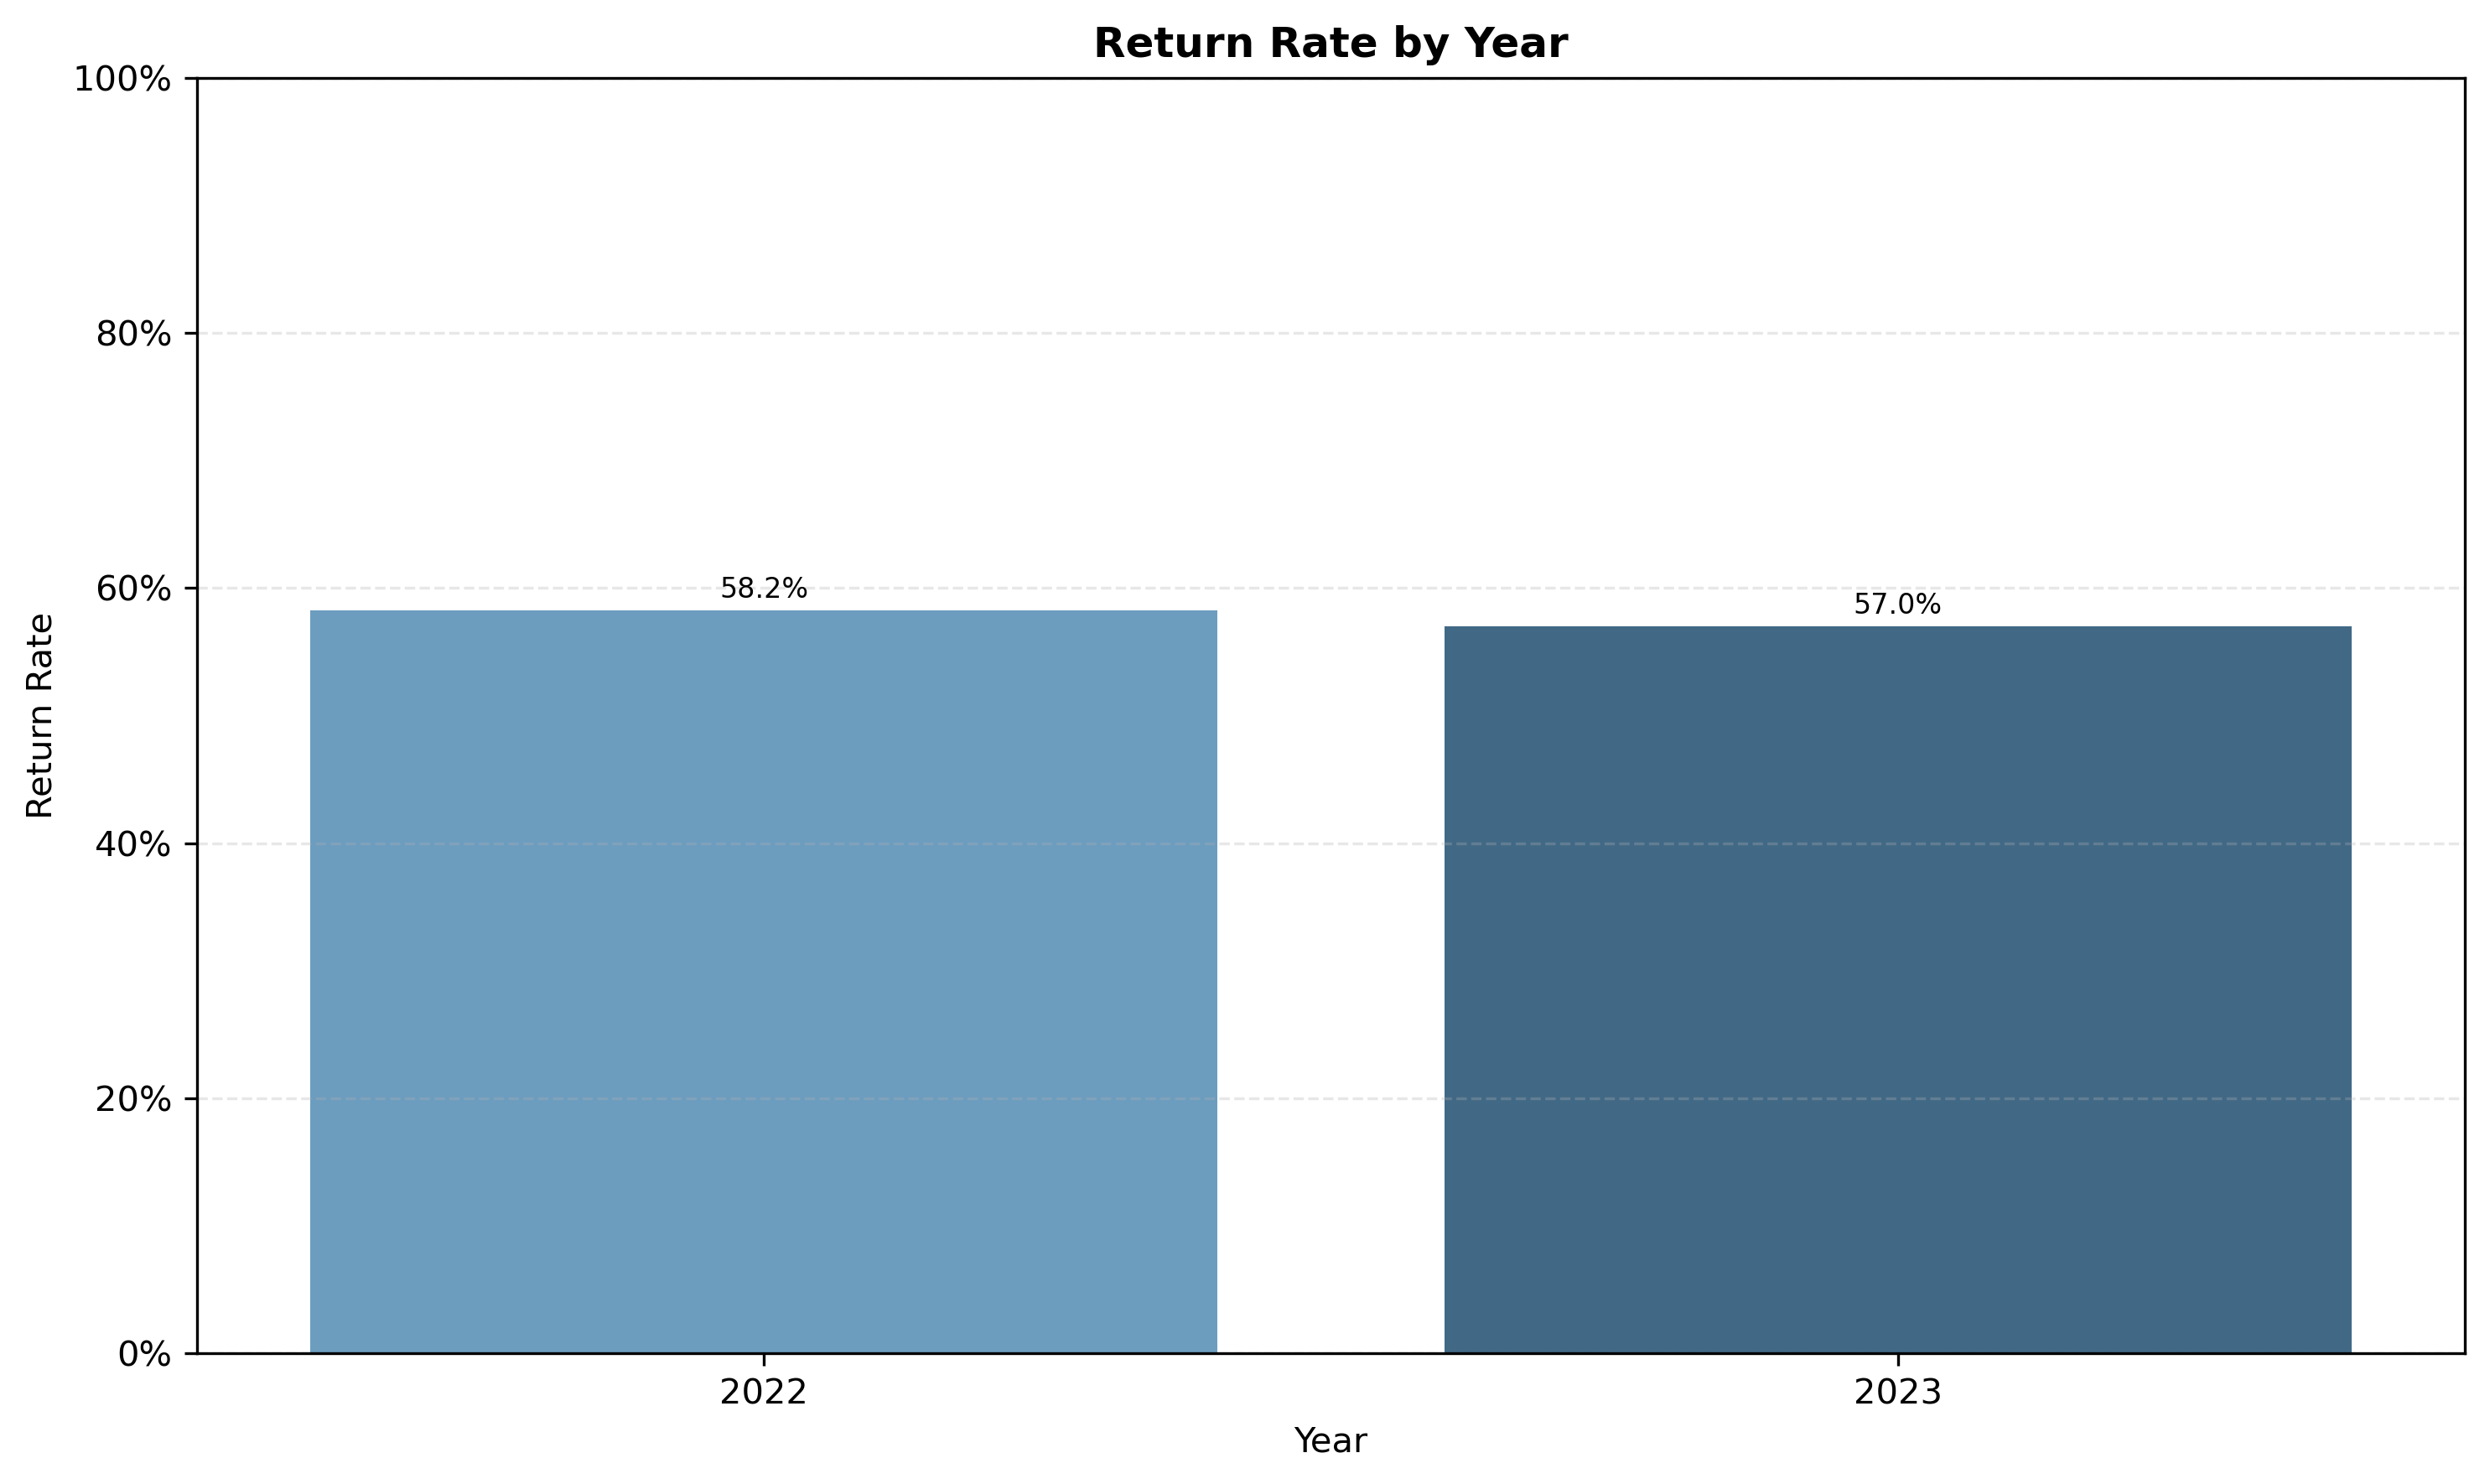

In [ ]:

plt.figure(figsize=(10, 6), dpi=300)

sns.barplot(
    data=year_returns,
    x='year',
    y='return_rate',
    palette='Blues_d' 
)


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for index, row in year_returns.iterrows():
    plt.text(
        x=index,
        y=row['return_rate'] + 0.01,
        s=f"{row['return_rate']:.1%}",
        ha='center',
        fontsize=8
    )

plt.title('Return Rate by Year', fontsize=12, weight='bold')
plt.ylabel('Return Rate')
plt.xlabel('Year')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
year_returns.head()

year  return_rate    count
0  2022     0.582456  2935127
1  2023     0.570190  3075009

In [ ]:
year_grouped_return = (
    df.groupby('year')['is_returned']
    .mean()
    .sort_values(ascending=False)
)

print(year_grouped_return)


year
2022    0.582456
2023    0.570190
Name: is_returned, dtype: float64


In [ ]:
print(month_returns['month'].unique())
print(month_returns[['month', 'year', 'return_rate']])

['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
        month  year  return_rate
0       April  2022     0.630844
1      August  2022     0.589573
2    December  2022     0.517737
3    February  2022     0.552881
4     January  2022     0.521284
5        July  2022     0.563799
6        June  2022     0.629624
7       March  2022     0.622309
8         May  2022     0.648057
9    November  2022     0.541020
10    October  2022     0.559122
11  September  2022     0.594349
12      April  2023     0.586372
13     August  2023     0.590810
14   December  2023     0.542404
15   February  2023     0.559033
16    January  2023     0.508678
17       July  2023     0.531010
18       June  2023     0.581829
19      March  2023     0.603233
20        May  2023     0.598262
21   November  2023     0.536317
22    October  2023     0.580178
23  September  2023     0.613337


In [ ]:
print(df['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


(0.0, 1.0)

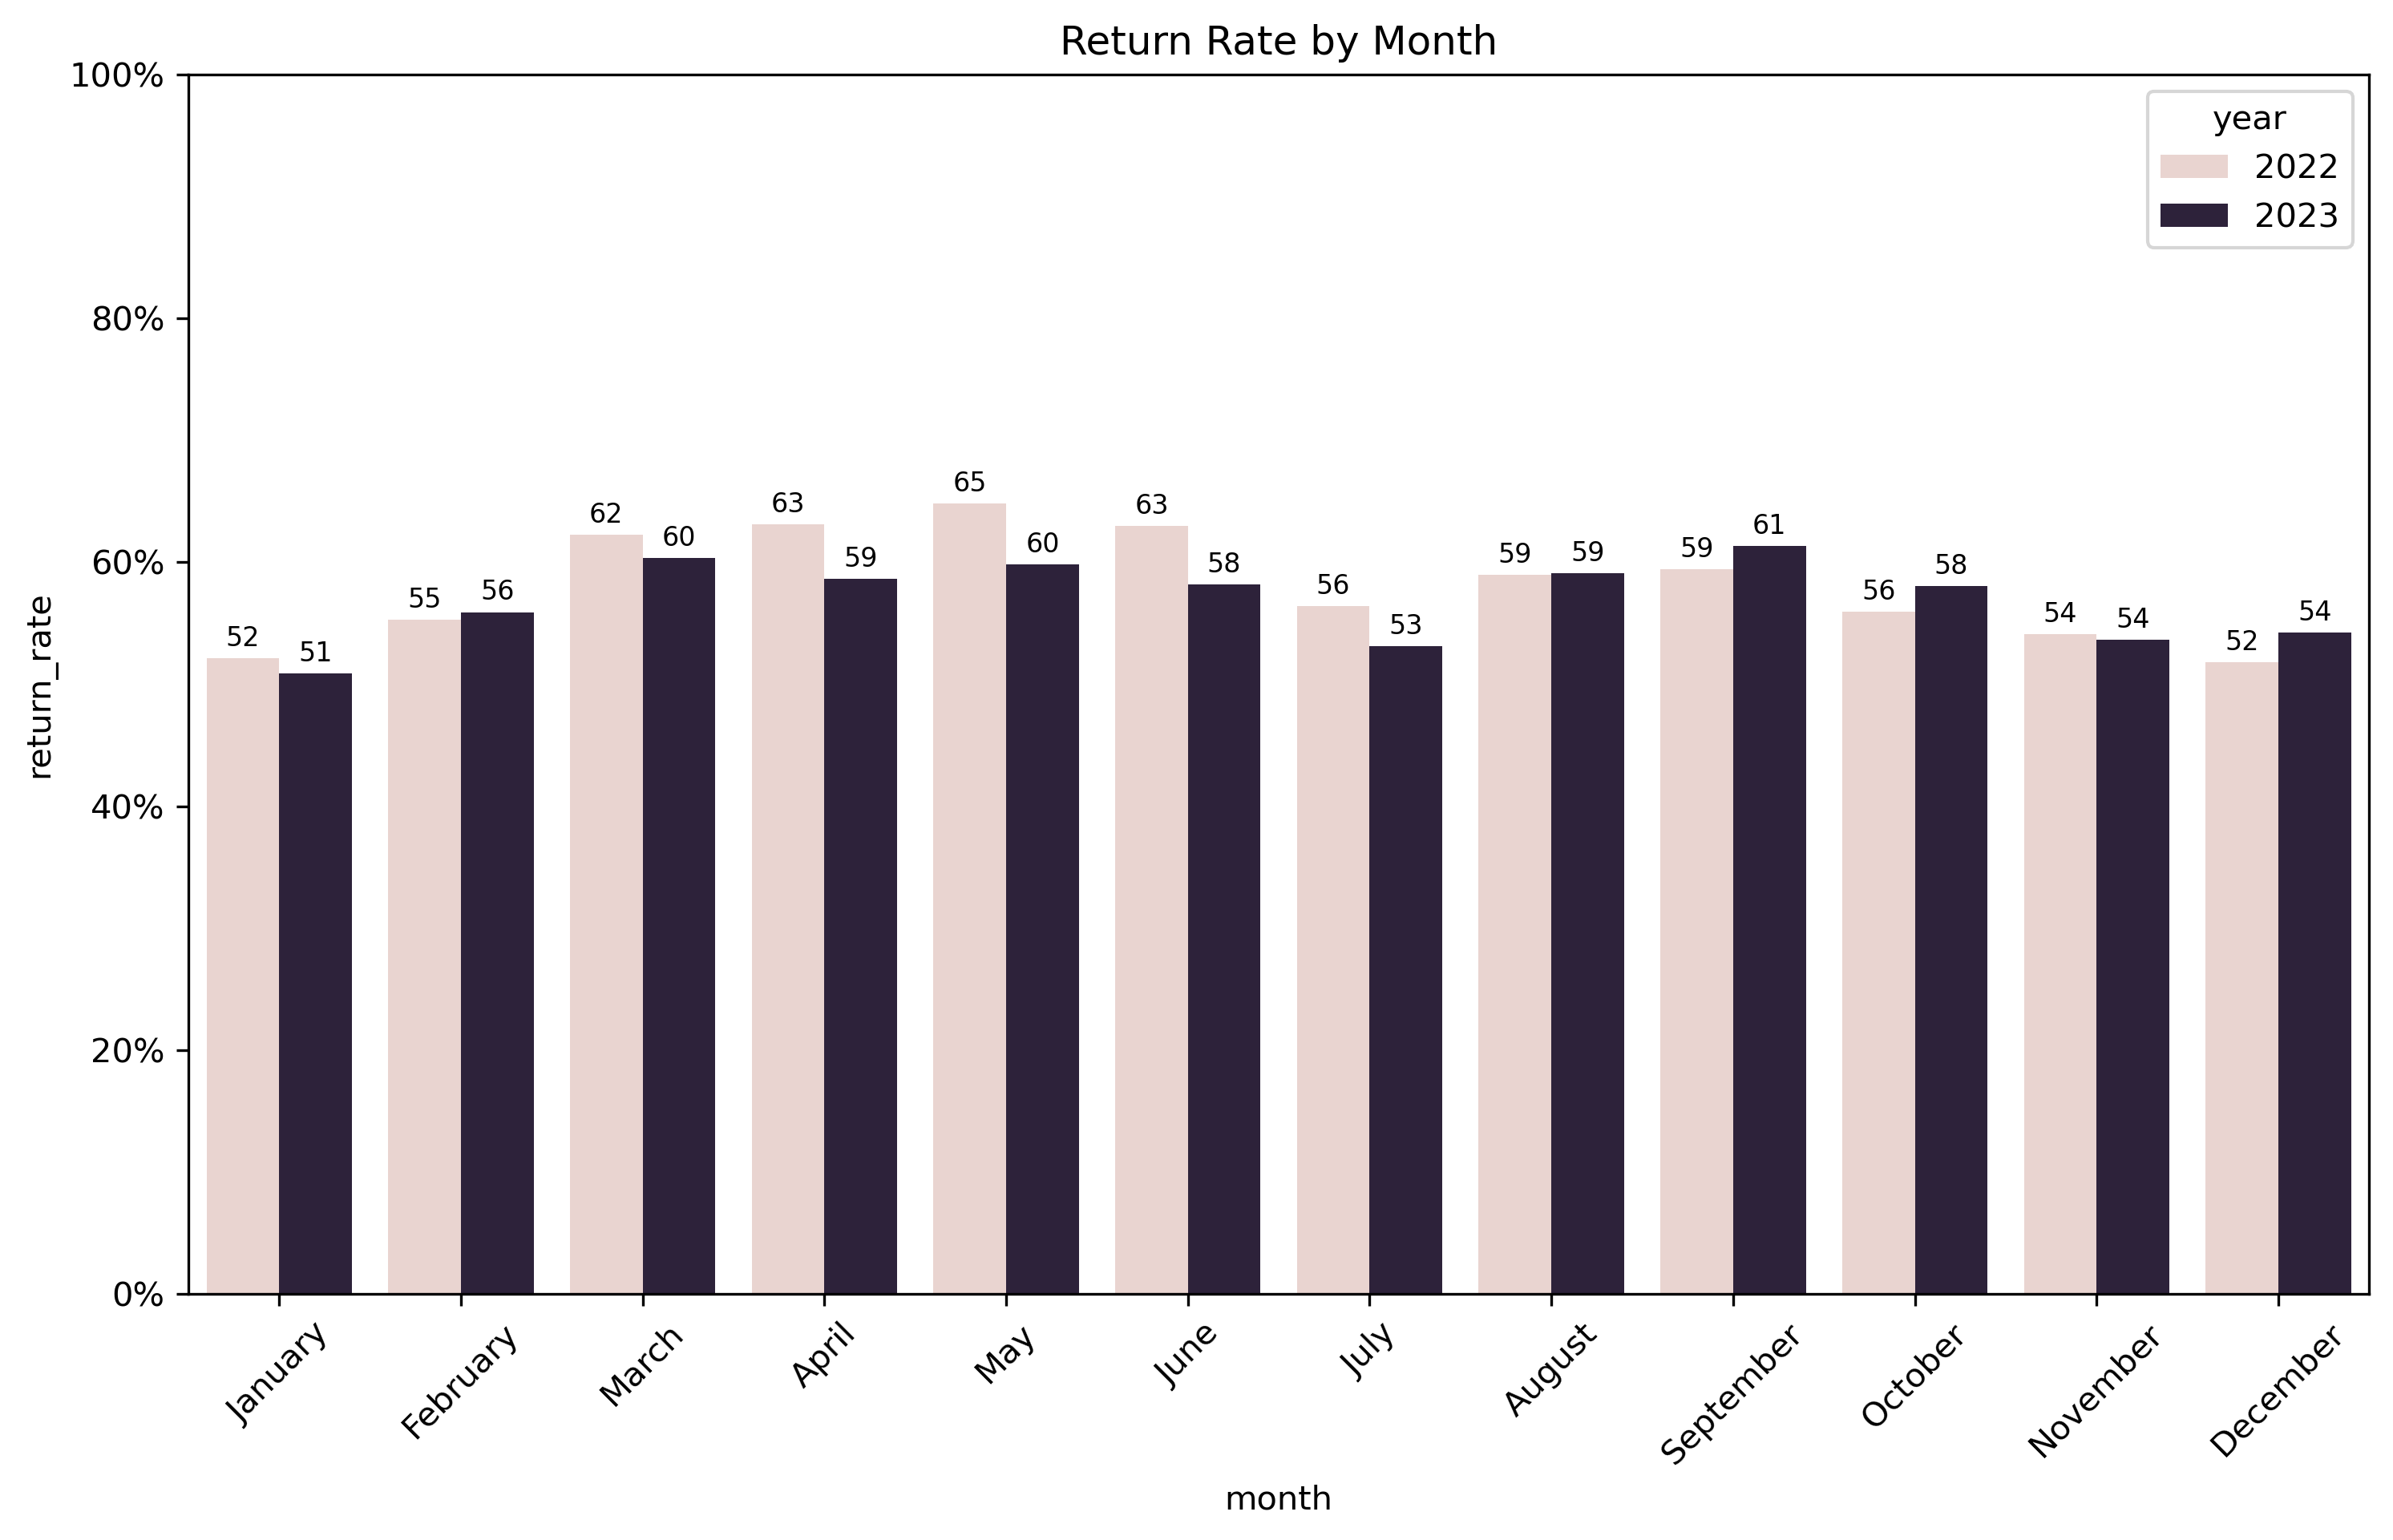

In [ ]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_returns['month'] = pd.Categorical(month_returns['month'], categories=month_order, ordered=True)

month_returns = month_returns.sort_values(['month', 'year'])

plt.figure(figsize=(10,6), dpi=300)

ax = sns.barplot(data=month_returns, x='month', y='return_rate', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container,
    labels=[f"{val:.2f}".lstrip("0.") for val in container.datavalues],
    label_type='edge',
    fontsize=8,
    padding=2)

plt.title('Return Rate by Month')
plt.tight_layout()
plt.xticks(rotation=45)
plt.ylim(0, 1)

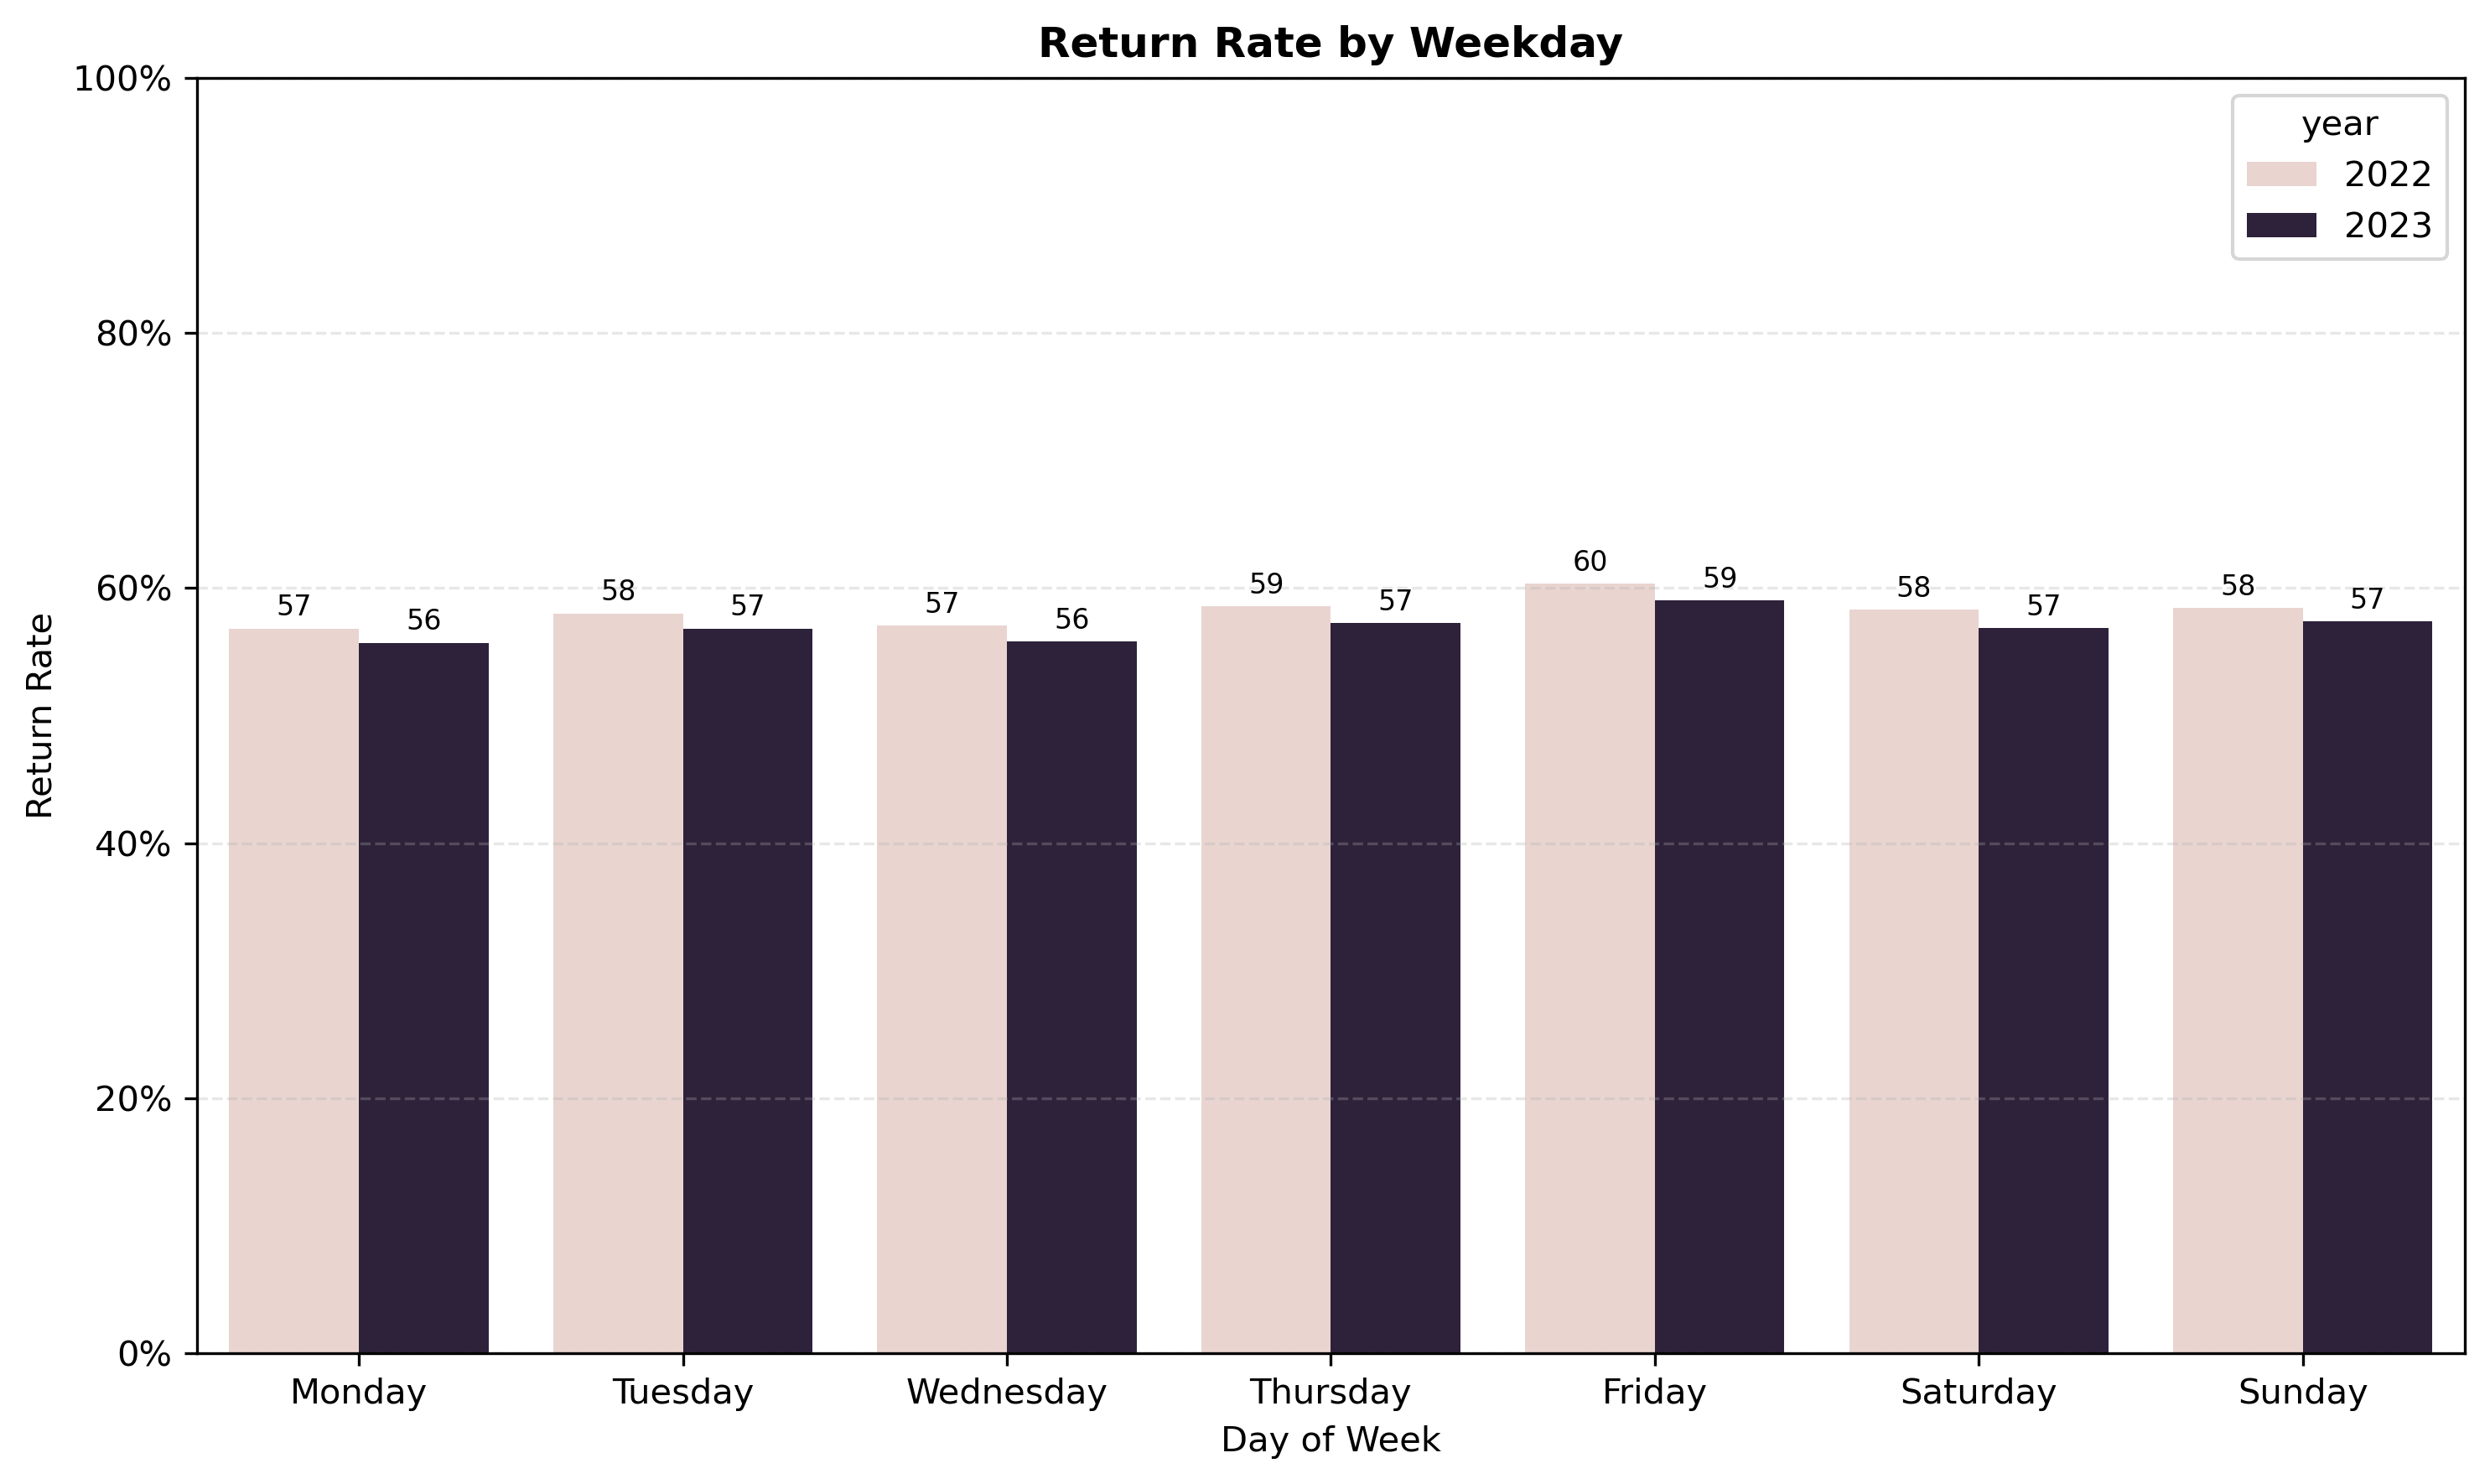

In [ ]:
plt.figure(figsize=(10, 6), dpi=300)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_returns['day_of_week'] = pd.Categorical(weekday_returns['day_of_week'], categories=order, ordered=True)
weekday_returns = weekday_returns.sort_values('day_of_week').reset_index(drop=True)


ax = sns.barplot(data=weekday_returns, x='day_of_week', y='return_rate', hue='year')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

for container in ax.containers:
    ax.bar_label(container,
    labels=[f"{val:.2f}".lstrip("0.") for val in container.datavalues],
    label_type='edge',
    fontsize=8,
    padding=2)

plt.title('Return Rate by Weekday', fontsize=12, weight='bold')
plt.ylabel('Return Rate')
plt.xlabel('Day of Week')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print(weekday_returns.head())

   year day_of_week  return_rate   count
0  2022      Monday     0.568264  431472
1  2023      Monday     0.557095  451386
2  2022     Tuesday     0.580039  413453
3  2023     Tuesday     0.568241  418067
4  2022   Wednesday     0.570689  414564


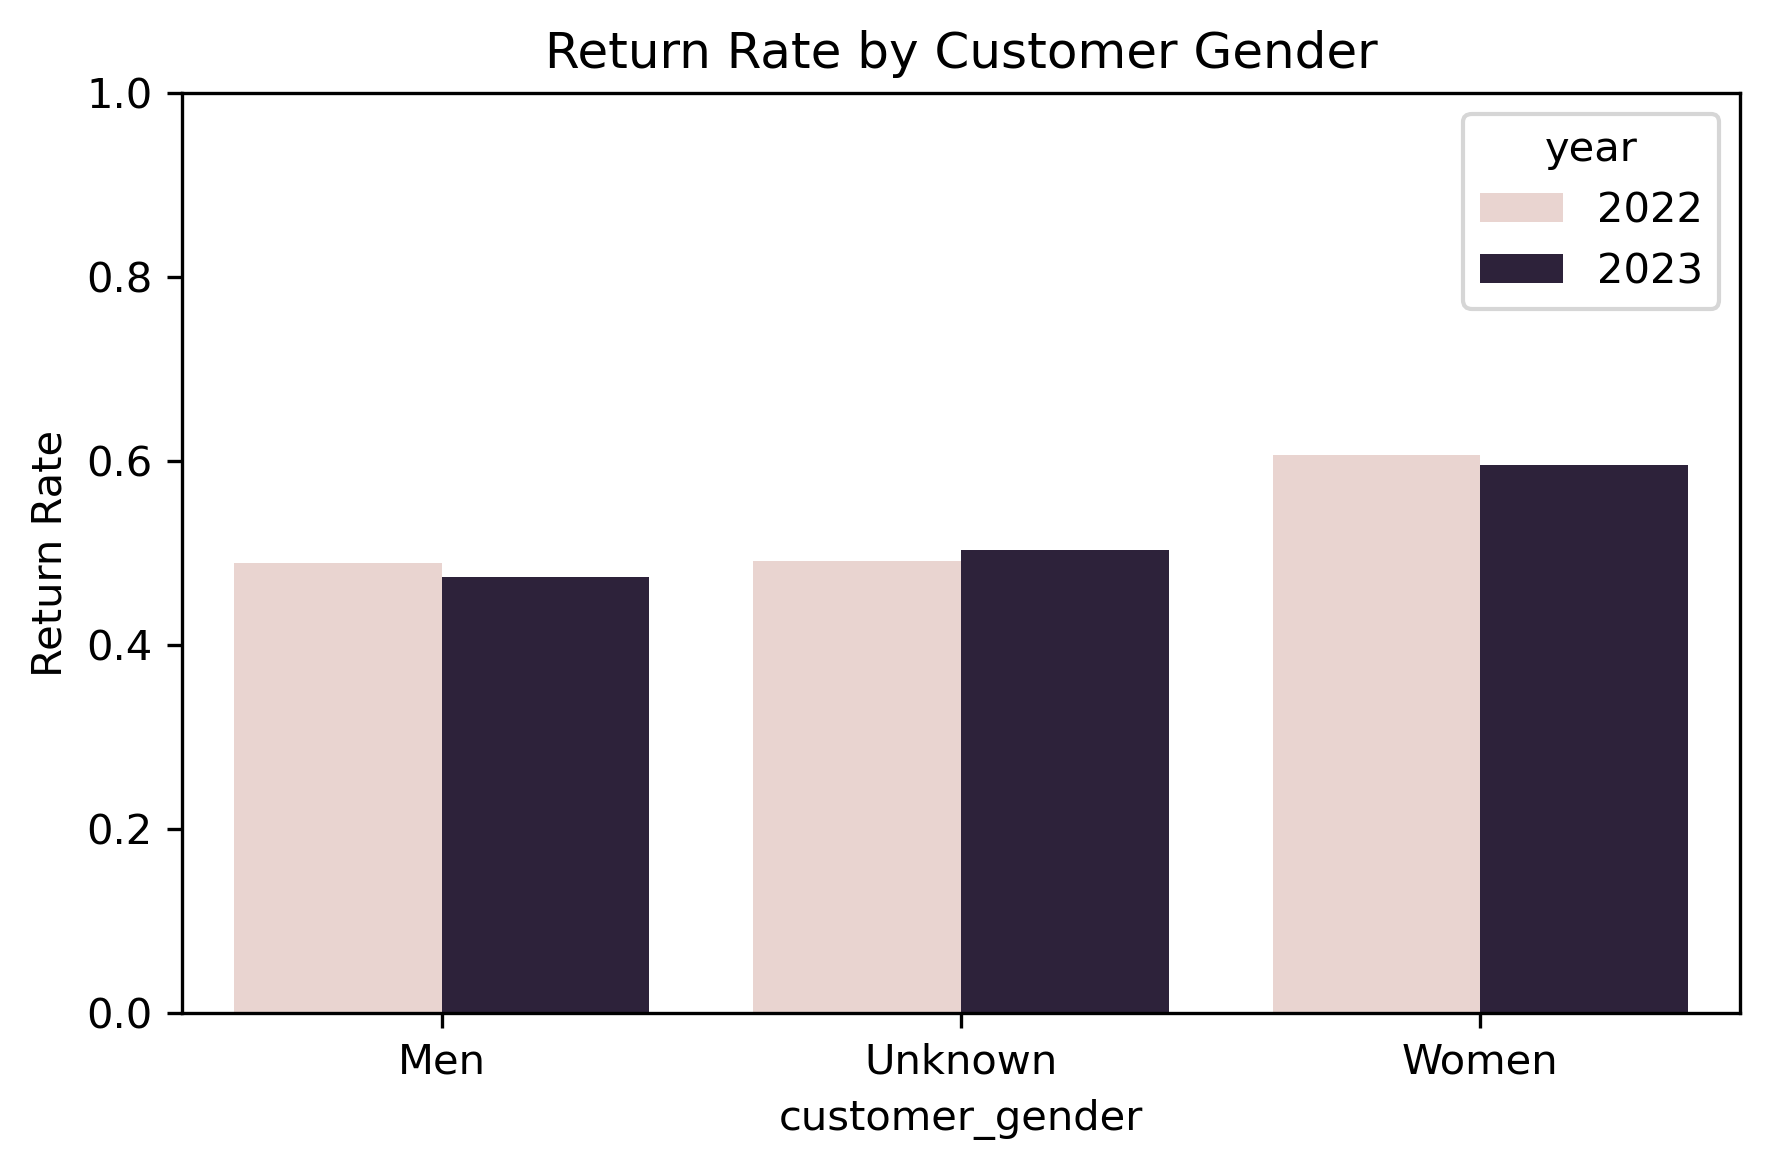

In [ ]:
gender_returns = df.groupby(['year','customer_gender'])['is_returned'].agg(['mean', 'count']).reset_index()
gender_returns.rename(columns={'mean': 'return_rate'}, inplace=True)


plt.figure(figsize=(6,4), dpi=300)
sns.barplot(data=gender_returns, x='customer_gender', y='return_rate', hue='year')
plt.title('Return Rate by Customer Gender')
plt.ylabel('Return Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

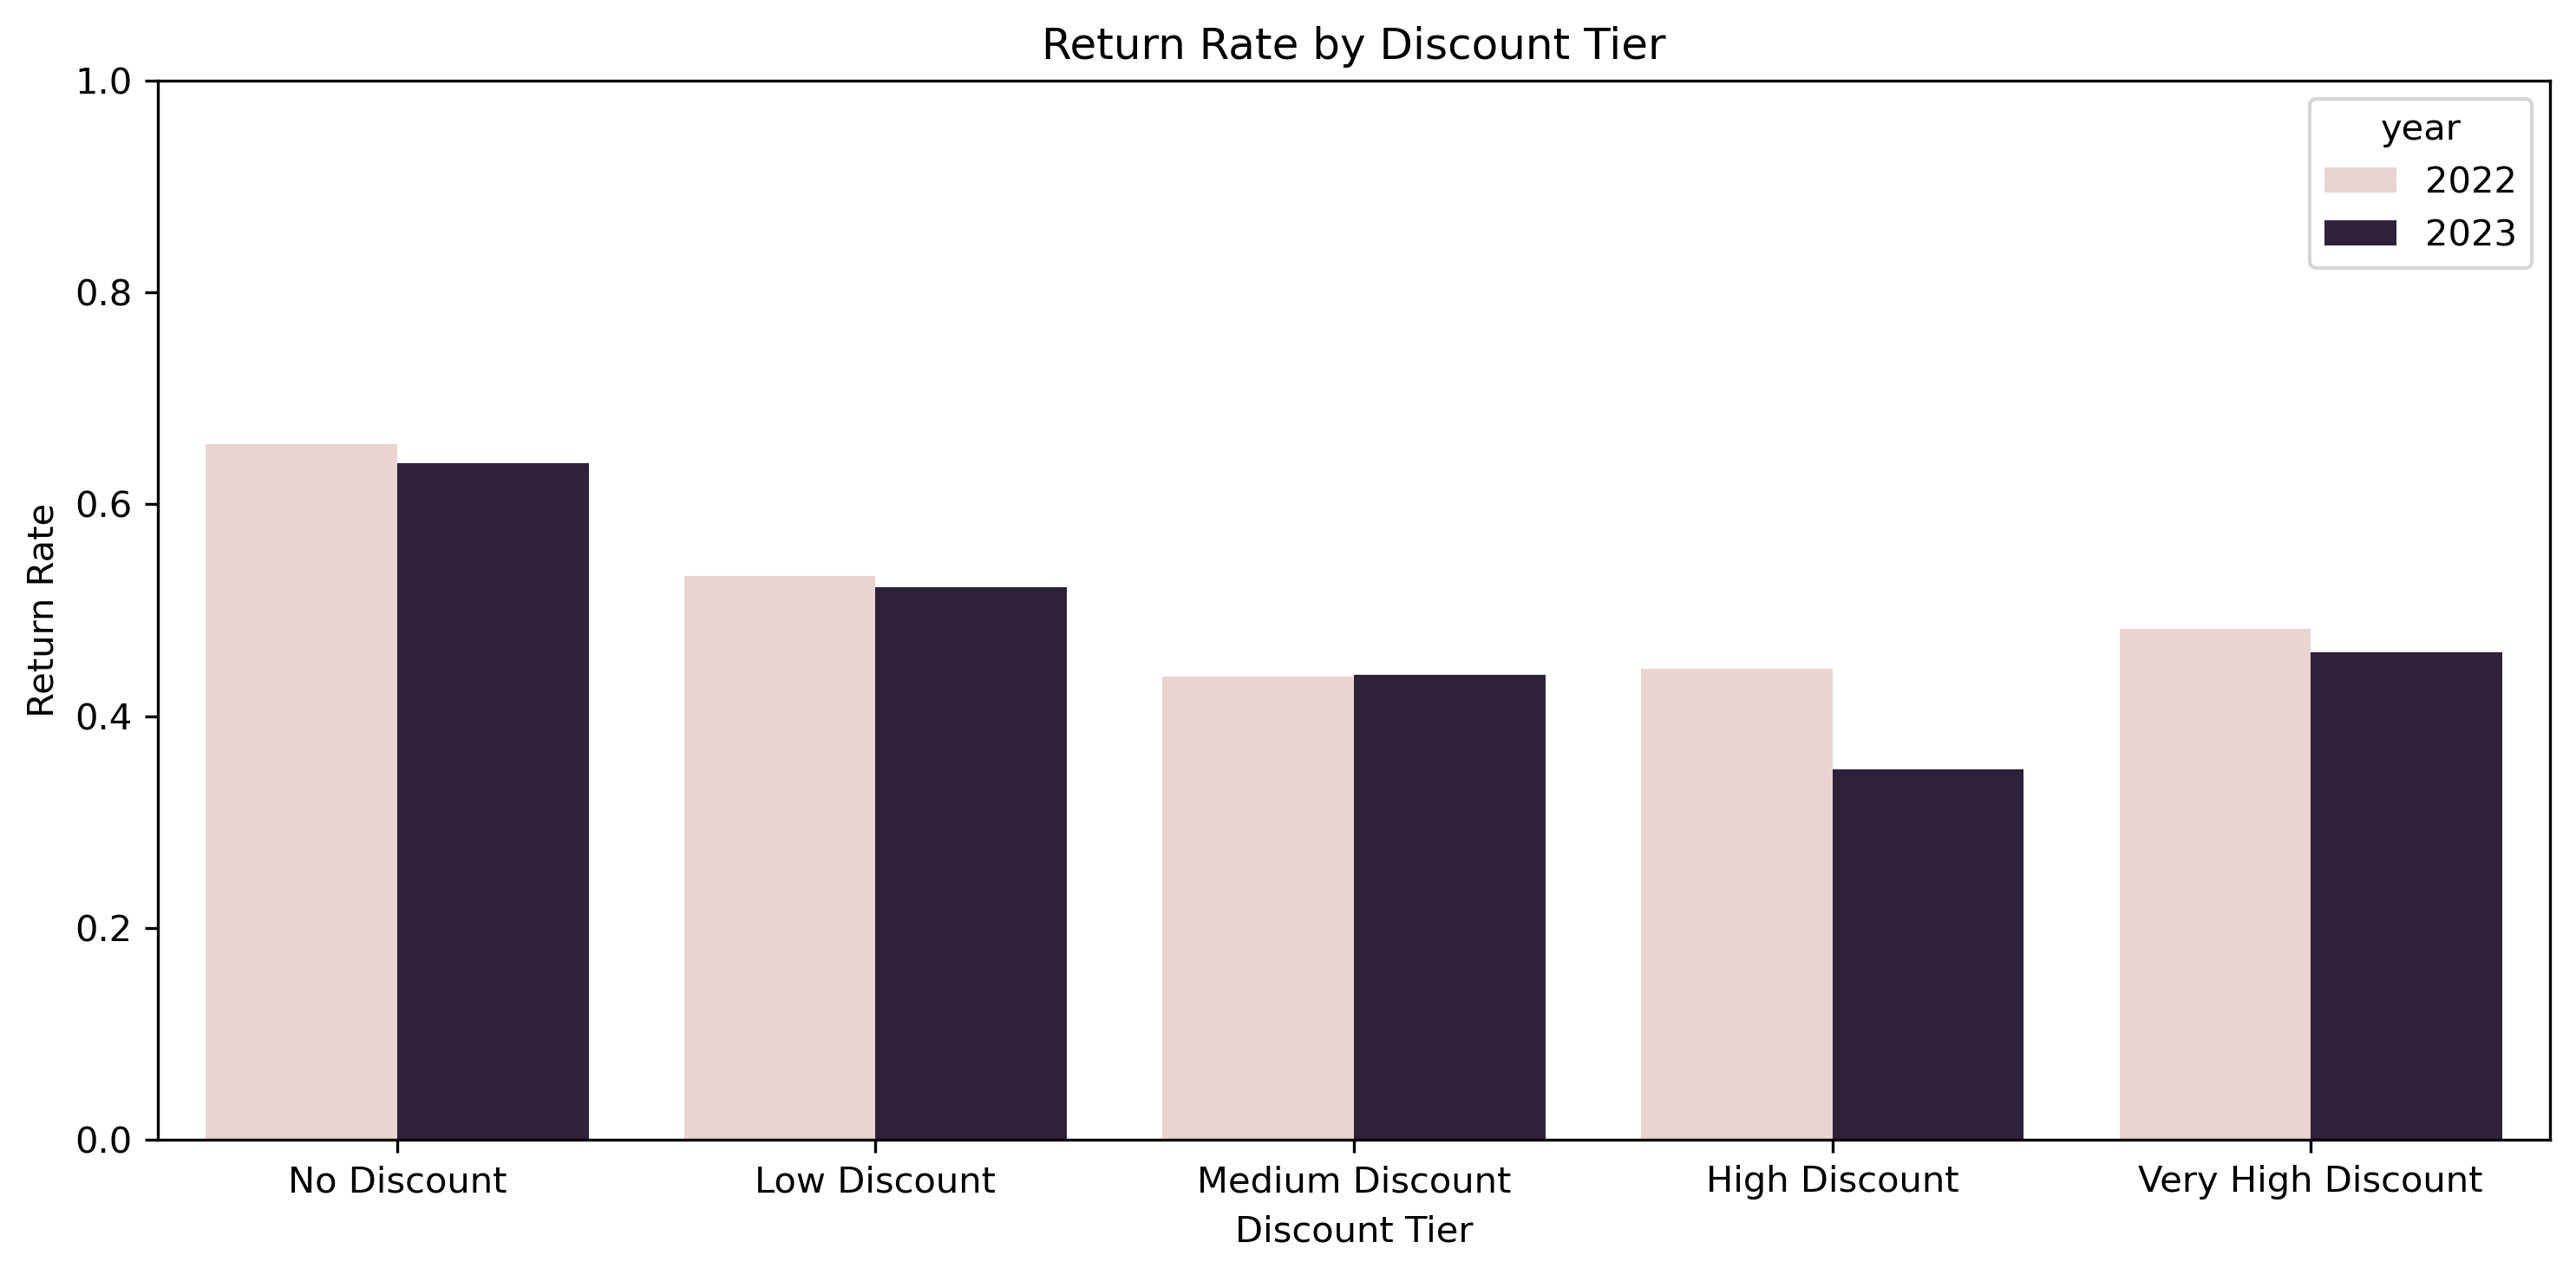

In [ ]:
discount_returns = df.groupby(['year', 'discount_tier'])['is_returned'].agg(['mean', 'count']).reset_index()
discount_returns.rename(columns={'mean': 'return_rate'}, inplace=True)

plt.figure(figsize=(10,5), dpi=300)
sns.barplot(data=discount_returns, x='discount_tier', y='return_rate', hue='year', order=['No Discount', 'Low Discount', 'Medium Discount', 'High Discount', 'Very High Discount'])
plt.title('Return Rate by Discount Tier')
plt.ylabel('Return Rate')
plt.xlabel('Discount Tier')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

In [ ]:
df['customer_quality'].value_counts(dropna=False)

customer_quality
1.0    1693515
4.0    1559423
2.0    1484532
3.0    1269862
NaN       2804
Name: count, dtype: int64

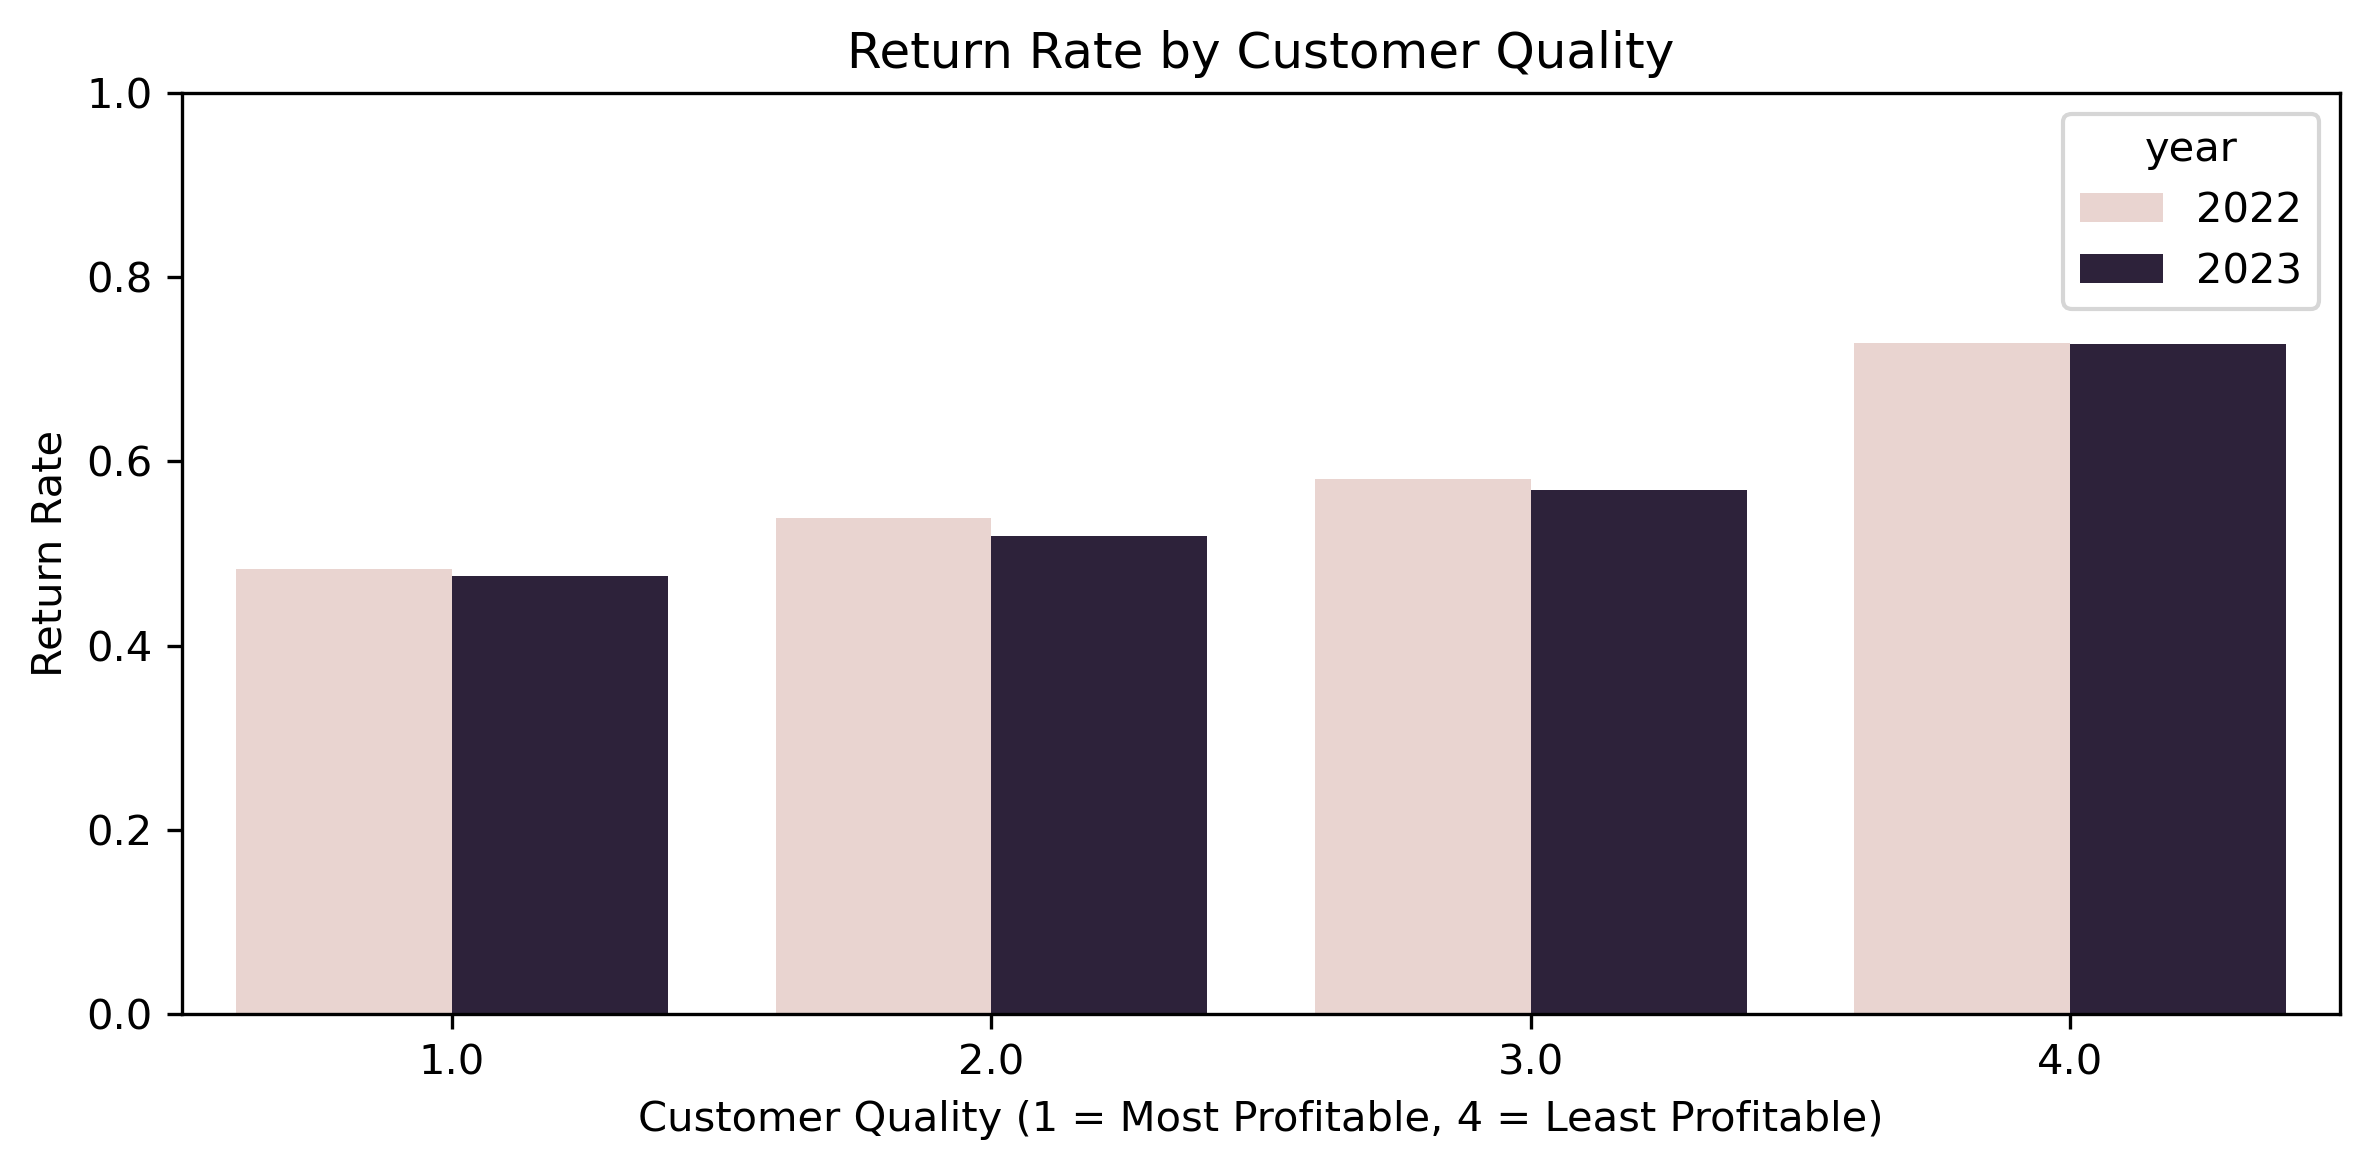

In [ ]:
customer_returns = df.groupby(['year', 'customer_quality'])['is_returned'].agg(['mean','count']).reset_index()
customer_returns.rename(columns={'mean': 'return_rate'}, inplace=True)

plt.figure(figsize=(8, 4), dpi=300)
sns.barplot(data=customer_returns, x='customer_quality', y='return_rate',hue='year')
plt.title('Return Rate by Customer Quality')
plt.xlabel('Customer Quality (1 = Most Profitable, 4 = Least Profitable)')
plt.ylabel('Return Rate')
plt.ylim(0, 1)
plt.tight_layout()

In [ ]:
return_rate_by_week = (
    df.groupby('day_of_week')['is_returned']
      .mean()
      .sort_values(ascending=False)
)

print(return_rate_by_week)

day_of_week
Friday       0.596580
Thursday     0.578951
Sunday       0.578914
Saturday     0.575451
Tuesday      0.574108
Wednesday    0.564390
Monday       0.562554
Name: is_returned, dtype: float64


In [ ]:
return_rate_by_month = (
    df.groupby('month')['is_returned']
      .mean()
      .sort_values(ascending=False)
)

print(return_rate_by_month)

month
May          0.620850
March        0.611623
April        0.608102
June         0.604514
September    0.603421
August       0.590169
October      0.568523
February     0.556407
July         0.546708
November     0.538656
December     0.528943
January      0.514328
Name: is_returned, dtype: float64


In [ ]:
friday_data = df[df['day_of_week'] == 'Friday']
return_rate_friday = friday_data['is_returned'].mean()

print(return_rate_friday)

0.5965803789661591


In [ ]:
total_orders = df['order_number'].nunique()
print("Total unique orders:", total_orders)

Total unique orders: 4366703


In [ ]:
orders_by_day = df.groupby('day_of_week').agg(order_count=('is_returned', 'nunique'))
orders_by_day = orders_by_day.sort_values(by='order_count', ascending=False)

print(orders_by_day)

             order_count
day_of_week             
Friday                 2
Monday                 2
Saturday               2
Sunday                 2
Thursday               2
Tuesday                2
Wednesday              2
